## Fetch repos

In [1]:
import re

def extract_markdown_urls(text):
    """
    Extract URLs from Markdown links [text](url), ignoring image links ![alt](url).
    Returns a list of URLs.
    """
    # (?<!\!)      : assert the '[' is not preceded by a '!' (i.e. not an image)
    # \[ [^\]]+ \] : match '[label]' (one or more chars that are not ])
    # \( (https?://[^\s)]+) \) : match '(' + capture http(s) URL + ')'
    md_link_pattern = re.compile(r'(?<!\!)\[[^\]]+\]\((https?://[^\s\)]+)\)')
    return md_link_pattern.findall(text)


def filter_mcp(urls):
    """
    Given a list of URLs, return only those that contain 'mcp'.
    """

In [45]:
import requests
text = requests.get("https://raw.githubusercontent.com/punkpeye/awesome-mcp-servers/refs/heads/main/README.md").text

print(text[:10000])

# Awesome MCP Servers [![Awesome](https://awesome.re/badge.svg)](https://awesome.re)

[![ไทย](https://img.shields.io/badge/Thai-Click-blue)](README-th.md)
[![English](https://img.shields.io/badge/English-Click-yellow)](README.md)
[![繁體中文](https://img.shields.io/badge/繁體中文-點擊查看-orange)](README-zh_TW.md)
[![简体中文](https://img.shields.io/badge/简体中文-点击查看-orange)](README-zh.md)
[![日本語](https://img.shields.io/badge/日本語-クリック-青)](README-ja.md)
[![한국어](https://img.shields.io/badge/한국어-클릭-yellow)](README-ko.md)
[![Português Brasileiro](https://img.shields.io/badge/Português_Brasileiro-Clique-green)](README-pt_BR.md)
[![Discord](https://img.shields.io/discord/1312302100125843476?logo=discord&label=discord)](https://glama.ai/mcp/discord)
[![Subreddit subscribers](https://img.shields.io/reddit/subreddit-subscribers/mcp?style=flat&logo=reddit&label=subreddit)](https://www.reddit.com/r/mcp/)

A curated list of awesome Model Context Protocol (MCP) servers.

* [What is MCP?](#what-is-mcp)
* [Clients](#c

In [3]:
# Step 1: extract all URLs
all_urls = extract_markdown_urls(text)
print(len(all_urls))

# Step 2: filter for 'mcp'
mcp_urls = [url for url in all_urls if 'mcp' in url]
print(len(mcp_urls))

# Filter out "img.shields"
mcp_urls = [url for url in mcp_urls if "img.shields" not in url]
print(len(mcp_urls))

# Only include github.com URLs and strip out .git suffix
mcp_urls = [re.sub(r'\.git$', '', url) for url in mcp_urls if "github.com" in url]
print(len(mcp_urls))

# Filter out specific URLs
exclude_urls = ["https://github.com/punkpeye/awesome-mcp-clients/"]
mcp_urls = [url for url in mcp_urls if url not in exclude_urls]

for url in mcp_urls[:50]:
    print(url)


742
579
578
568
https://github.com/glenngillen/mcpmcp-server
https://github.com/wegotdocs/open-mcp
https://github.com/VeriTeknik/pluggedin-mcp-proxy
https://github.com/waystation-ai/mcp
https://github.com/sxhxliang/mcp-access-point
https://github.com/hamflx/imagen3-mcp
https://github.com/SureScaleAI/openai-gpt-image-mcp
https://github.com/abhiemj/manim-mcp-server
https://github.com/burningion/video-editing-mcp
https://github.com/cswkim/discogs-mcp-server
https://github.com/djalal/quran-mcp-server
https://github.com/mikechao/metmuseum-mcp
https://github.com/r-huijts/rijksmuseum-mcp
https://github.com/r-huijts/oorlogsbronnen-mcp
https://github.com/samuelgursky/davinci-resolve-mcp
https://github.com/yuna0x0/anilist-mcp
https://github.com/diivi/aseprite-mcp
https://github.com/omni-mcp/isaac-sim-mcp
https://github.com/8enSmith/mcp-open-library
https://github.com/cantian-ai/bazi-mcp
https://github.com/xspadex/bilibili-mcp
https://github.com/34892002/bilibili-mcp-js
https://github.com/blackwh

In [4]:
for url in mcp_urls:
    print(url)

https://github.com/glenngillen/mcpmcp-server
https://github.com/wegotdocs/open-mcp
https://github.com/VeriTeknik/pluggedin-mcp-proxy
https://github.com/waystation-ai/mcp
https://github.com/sxhxliang/mcp-access-point
https://github.com/hamflx/imagen3-mcp
https://github.com/SureScaleAI/openai-gpt-image-mcp
https://github.com/abhiemj/manim-mcp-server
https://github.com/burningion/video-editing-mcp
https://github.com/cswkim/discogs-mcp-server
https://github.com/djalal/quran-mcp-server
https://github.com/mikechao/metmuseum-mcp
https://github.com/r-huijts/rijksmuseum-mcp
https://github.com/r-huijts/oorlogsbronnen-mcp
https://github.com/samuelgursky/davinci-resolve-mcp
https://github.com/yuna0x0/anilist-mcp
https://github.com/diivi/aseprite-mcp
https://github.com/omni-mcp/isaac-sim-mcp
https://github.com/8enSmith/mcp-open-library
https://github.com/cantian-ai/bazi-mcp
https://github.com/xspadex/bilibili-mcp
https://github.com/34892002/bilibili-mcp-js
https://github.com/blackwhite084/playwrigh

In [5]:
def extract_repos(urls):
    """
    Given a list of GitHub URLs, return a list of dicts for those
    exactly matching https://github.com/user/repo, each containing:
      - 'url': the original URL
      - 'name': the repo name
    """
    pattern = re.compile(r'^https?://github\.com/[^/]+/([^/]+)$', re.IGNORECASE)
    repos = []
    for url in urls:
        m = pattern.match(url)
        if m:
            repos.append({
                'url': url,
                'name': m.group(1)
            })
    return repos


In [6]:
mcp_repo_data = extract_repos(mcp_urls)
mcp_repo_data[:10]

[{'url': 'https://github.com/glenngillen/mcpmcp-server',
  'name': 'mcpmcp-server'},
 {'url': 'https://github.com/wegotdocs/open-mcp', 'name': 'open-mcp'},
 {'url': 'https://github.com/VeriTeknik/pluggedin-mcp-proxy',
  'name': 'pluggedin-mcp-proxy'},
 {'url': 'https://github.com/waystation-ai/mcp', 'name': 'mcp'},
 {'url': 'https://github.com/sxhxliang/mcp-access-point',
  'name': 'mcp-access-point'},
 {'url': 'https://github.com/hamflx/imagen3-mcp', 'name': 'imagen3-mcp'},
 {'url': 'https://github.com/SureScaleAI/openai-gpt-image-mcp',
  'name': 'openai-gpt-image-mcp'},
 {'url': 'https://github.com/abhiemj/manim-mcp-server',
  'name': 'manim-mcp-server'},
 {'url': 'https://github.com/burningion/video-editing-mcp',
  'name': 'video-editing-mcp'},
 {'url': 'https://github.com/cswkim/discogs-mcp-server',
  'name': 'discogs-mcp-server'}]

## Add awesome mcp metadata 

```
🎖️ – official implementation
programming language
🐍 – Python codebase
📇 – TypeScript (or JavaScript) codebase
🏎️ – Go codebase
🦀 – Rust codebase
#️⃣ - C# Codebase
☕ - Java codebase
🌊 – C/C++ codebase
scope
☁️ - Cloud Service
🏠 - Local Service
📟 - Embedded Systems
operating system
🍎 – For macOS
🪟 – For Windows
🐧 - For Linux
```

In [46]:
official_emoji = '🎖️'
lang_emojis = {
    '🐍': 'Python',
    '📇': 'TypeScript/JavaScript',
    '🏎️': 'Go',
    '🦀': 'Rust',
    '#️⃣': 'C#',
    '☕': 'Java',
    '🌊': 'C/C++',
}
scope_emojis = {
    '☁️': 'Cloud Service',
    '🏠': 'Local Service',
    '📟': 'Embedded Systems',
}
os_emojis = {
    '🍎': 'macOS',
    '🪟': 'Windows',
    '🐧': 'Linux',
}

for entry in mcp_repo_data:
    url = entry['url']
    # find everything after the closing ")" up to the first " -"
    m = re.search(re.escape(url) + r'\)\s*([^\-]+)', text)
    snippet = m.group(1) if m else ''

    entry['official_implementation'] = official_emoji in snippet
    entry['programming_language'] = [
        name for emoji, name in lang_emojis.items() if emoji in snippet
    ]
    entry['scope'] = [
        name for emoji, name in scope_emojis.items() if emoji in snippet
    ]
    entry['operating_system'] = [
        name for emoji, name in os_emojis.items() if emoji in snippet
    ]


In [51]:
mcp_repo_data[:10]

[{'url': 'https://github.com/glenngillen/mcpmcp-server',
  'name': 'mcpmcp-server',
  'status_code': 200,
  'description': 'Discover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.',
  'stars': 4,
  'created_at': '2025-04-24T04:49:10Z',
  'updated_at': '2025-06-03T04:29:47Z',
  'license': 'Apache License 2.0',
  'language': None,
  'readme_status': 200,
  'readme_text': '# mcpmcp-server\n\nDiscover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.\n\n## Installation/usage:\n\nUpdate the configuration of your MCP client to the following: \n\n```json\n{\n  "mcpServers": {\n    "mcpmcp": {\n      "command": "npx",\n      "args": ["-y", "mcp-remote@latest", "https://mcpmcp.io/mcp"]\n    }\n  }\n}\n```\n\n(**note:** this config definitely works for Claude Desktop on macOS. If you need variations for other apps or platforms check the [homepage](https://mcp

## Fetch data for repos

In [9]:
import os
GITHUB_TOKEN = os.getenv("GITHUB_API_TOKEN")
if not GITHUB_TOKEN:
    raise ValueError("GITHUB_API_TOKEN is not set")


In [10]:
import requests
import time
from urllib.parse import urlparse
from tqdm import tqdm

def fetch_single_repo_info(url, token=None, rate_limit=1.0):
    """
    Fetch metadata and raw README for a single GitHub repo URL.
    Prints fun status updates and returns a dict with:
      - status_code
      - stars
      - created_at
      - updated_at
      - license
      - language
      - readme_status
      - readme_text
    """
    print(f"🔍 Fetching {url} ...")
    # Prepare headers
    headers = {"Accept": "application/vnd.github.v3+json"}
    raw_headers = {"Accept": "application/vnd.github.v3.raw"}
    if token:
        headers["Authorization"] = f"token {token}"
        raw_headers["Authorization"] = f"token {token}"

    # Parse owner/repo
    parsed = urlparse(url)
    parts = parsed.path.strip("/").split("/")
    if len(parts) < 2:
        print(f"⚠️  Invalid GitHub URL, skipping: {url}\n")
        return {}

    owner, repo = parts[0], parts[1]
    api_base = f"https://api.github.com/repos/{owner}/{repo}"

    # 1) Repo metadata
    resp = requests.get(api_base, headers=headers)
    status = resp.status_code

    if resp.ok:
        data = resp.json()
        description = data.get("description")
        stars  = data.get("stargazers_count")
        created_at = data.get("created_at")
        updated_at  = data.get("updated_at")
        license = (data.get("license") or {}).get("name")
        language = data.get("language")
        print(f"✅ Metadata ({status}): ⭐ {stars}, created {created_at}, last push {updated_at}, license {license}, language {language}, description {description}")
    else:
        print(f"❌ Metadata failed ({status}) for {owner}/{repo}")
        description = None
        stars  = None
        created_at = None
        updated_at = None
        license = None
        language = None

    time.sleep(rate_limit)

    # 2) README (raw)
    readme_url = api_base + "/readme"
    readme_resp = requests.get(readme_url, headers=raw_headers)
    readme_status = readme_resp.status_code
    readme_text = None

    if readme_resp.ok:
        readme_text = readme_resp.text
        print(f"✅ README fetched ({readme_status}), {len(readme_text)} chars")
    else:
        print(f"❌️  README not found or failed ({readme_status})")

    time.sleep(rate_limit)

    print(f"🔄 Done with {owner}/{repo}.\n")
    return {
        "status_code": status,
        "description": description,
        "stars": stars,
        "created_at": created_at,
        "updated_at": updated_at,
        "license": license,
        "language": language,
        "readme_status": readme_status,
        "readme_text": readme_text
    }


for repo in tqdm(mcp_repo_data):
    info = fetch_single_repo_info(repo["url"], token=GITHUB_TOKEN, rate_limit=1.0)
    repo.update(info)
    print(f"Updated {repo['name']}: ⭐ {repo.get('stars')}, README status {repo.get('readme_status')} ({len(repo.get('readme_text') or "")} chars), {repo.get('description')}\n")

print("🚀 All repos processed!")


  0%|          | 0/545 [00:00<?, ?it/s]

🔍 Fetching https://github.com/glenngillen/mcpmcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-04-24T04:49:10Z, last push 2025-06-03T04:29:47Z, license Apache License 2.0, language None, description Discover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.
✅ README fetched (200), 554 chars


  0%|          | 1/545 [00:02<22:26,  2.48s/it]

🔄 Done with glenngillen/mcpmcp-server.

Updated mcpmcp-server: ⭐ 4, README status 200 (554 chars), Discover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.

🔍 Fetching https://github.com/wegotdocs/open-mcp ...
✅ Metadata (200): ⭐ 179, created 2025-03-27T14:40:31Z, last push 2025-06-22T13:24:24Z, license None, language TypeScript, description None
✅ README fetched (200), 2414 chars


  0%|          | 2/545 [00:04<22:22,  2.47s/it]

🔄 Done with wegotdocs/open-mcp.

Updated open-mcp: ⭐ 179, README status 200 (2414 chars), None

🔍 Fetching https://github.com/VeriTeknik/pluggedin-mcp-proxy ...
✅ Metadata (200): ⭐ 45, created 2025-04-07T12:26:50Z, last push 2025-06-21T12:47:53Z, license Apache License 2.0, language TypeScript, description Plugged.in MCP Server manages all your other MCPs in one MCP.
✅ README fetched (200), 12247 chars


  1%|          | 3/545 [00:07<22:55,  2.54s/it]

🔄 Done with VeriTeknik/pluggedin-mcp-proxy.

Updated pluggedin-mcp-proxy: ⭐ 45, README status 200 (12247 chars), Plugged.in MCP Server manages all your other MCPs in one MCP.

🔍 Fetching https://github.com/waystation-ai/mcp ...
✅ Metadata (200): ⭐ 17, created 2025-02-27T17:51:56Z, last push 2025-06-21T03:52:16Z, license None, language JavaScript, description The only MCP Server you need. Connect any MCP host with the tools you use daily through our no-code, secure integration hub.
✅ README fetched (200), 4859 chars


  1%|          | 4/545 [00:10<22:45,  2.52s/it]

🔄 Done with waystation-ai/mcp.

Updated mcp: ⭐ 17, README status 200 (4859 chars), The only MCP Server you need. Connect any MCP host with the tools you use daily through our no-code, secure integration hub.

🔍 Fetching https://github.com/sxhxliang/mcp-access-point ...
✅ Metadata (200): ⭐ 49, created 2025-04-06T15:35:00Z, last push 2025-06-22T01:06:47Z, license MIT License, language Rust, description Turn a web server into an MCP server in one click without making any code changes.
✅ README fetched (200), 8919 chars


  1%|          | 5/545 [00:12<22:27,  2.50s/it]

🔄 Done with sxhxliang/mcp-access-point.

Updated mcp-access-point: ⭐ 49, README status 200 (8919 chars), Turn a web server into an MCP server in one click without making any code changes.

🔍 Fetching https://github.com/hamflx/imagen3-mcp ...
✅ Metadata (200): ⭐ 28, created 2025-04-26T06:41:39Z, last push 2025-06-19T13:30:58Z, license None, language Rust, description None
✅ README fetched (200), 3633 chars


  1%|          | 6/545 [00:14<22:17,  2.48s/it]

🔄 Done with hamflx/imagen3-mcp.

Updated imagen3-mcp: ⭐ 28, README status 200 (3633 chars), None

🔍 Fetching https://github.com/SureScaleAI/openai-gpt-image-mcp ...
✅ Metadata (200): ⭐ 37, created 2025-04-27T07:54:28Z, last push 2025-06-19T01:54:20Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) tool server for OpenAI's GPT-4o/gpt-image-1 image generation and editing APIs.
✅ README fetched (200), 5206 chars


  1%|▏         | 7/545 [00:17<22:19,  2.49s/it]

🔄 Done with SureScaleAI/openai-gpt-image-mcp.

Updated openai-gpt-image-mcp: ⭐ 37, README status 200 (5206 chars), A Model Context Protocol (MCP) tool server for OpenAI's GPT-4o/gpt-image-1 image generation and editing APIs.

🔍 Fetching https://github.com/abhiemj/manim-mcp-server ...
✅ Metadata (200): ⭐ 404, created 2025-03-31T05:17:21Z, last push 2025-06-22T14:54:04Z, license MIT License, language Python, description None
✅ README fetched (200), 3035 chars


  1%|▏         | 8/545 [00:19<22:12,  2.48s/it]

🔄 Done with abhiemj/manim-mcp-server.

Updated manim-mcp-server: ⭐ 404, README status 200 (3035 chars), None

🔍 Fetching https://github.com/burningion/video-editing-mcp ...
✅ Metadata (200): ⭐ 164, created 2024-12-03T17:02:20Z, last push 2025-06-22T14:53:55Z, license None, language Python, description MCP Interface for Video Jungle
✅ README fetched (200), 7111 chars


  2%|▏         | 9/545 [00:22<22:05,  2.47s/it]

🔄 Done with burningion/video-editing-mcp.

Updated video-editing-mcp: ⭐ 164, README status 200 (7111 chars), MCP Interface for Video Jungle

🔍 Fetching https://github.com/cswkim/discogs-mcp-server ...
✅ Metadata (200): ⭐ 22, created 2025-04-04T18:17:51Z, last push 2025-06-16T18:51:31Z, license MIT License, language TypeScript, description MCP Server for Discogs
✅ README fetched (200), 7678 chars


  2%|▏         | 10/545 [00:24<22:00,  2.47s/it]

🔄 Done with cswkim/discogs-mcp-server.

Updated discogs-mcp-server: ⭐ 22, README status 200 (7678 chars), MCP Server for Discogs

🔍 Fetching https://github.com/djalal/quran-mcp-server ...
✅ Metadata (200): ⭐ 40, created 2025-03-31T15:59:42Z, last push 2025-06-22T07:00:01Z, license MIT License, language TypeScript, description Quran.com API integration for verse search, translation and tafsir
✅ README fetched (200), 4856 chars


  2%|▏         | 11/545 [00:27<21:48,  2.45s/it]

🔄 Done with djalal/quran-mcp-server.

Updated quran-mcp-server: ⭐ 40, README status 200 (4856 chars), Quran.com API integration for verse search, translation and tafsir

🔍 Fetching https://github.com/mikechao/metmuseum-mcp ...
✅ Metadata (200): ⭐ 5, created 2025-04-10T18:19:22Z, last push 2025-06-19T02:15:35Z, license MIT License, language TypeScript, description Met Museum MCP integration to discover the art collection at The Metropolitan Museum of Art in New York
✅ README fetched (200), 4124 chars


  2%|▏         | 12/545 [00:29<21:44,  2.45s/it]

🔄 Done with mikechao/metmuseum-mcp.

Updated metmuseum-mcp: ⭐ 5, README status 200 (4124 chars), Met Museum MCP integration to discover the art collection at The Metropolitan Museum of Art in New York

🔍 Fetching https://github.com/r-huijts/rijksmuseum-mcp ...
✅ Metadata (200): ⭐ 49, created 2024-12-23T18:02:44Z, last push 2025-06-22T14:21:08Z, license MIT License, language JavaScript, description Rijksmuseum MCP integration for artwork exploration and analysis
✅ README fetched (200), 5645 chars


  2%|▏         | 13/545 [00:32<21:43,  2.45s/it]

🔄 Done with r-huijts/rijksmuseum-mcp.

Updated rijksmuseum-mcp: ⭐ 49, README status 200 (5645 chars), Rijksmuseum MCP integration for artwork exploration and analysis

🔍 Fetching https://github.com/r-huijts/oorlogsbronnen-mcp ...
✅ Metadata (200): ⭐ 7, created 2025-04-01T07:48:58Z, last push 2025-06-05T13:59:50Z, license MIT License, language TypeScript, description MCP server for accessing Dutch World War II archives through the Oorlogsbronnen API. Provides structured access to historical records, photographs, and documents from 1940-1945 Netherlands.
✅ README fetched (200), 8277 chars


  3%|▎         | 14/545 [00:34<21:46,  2.46s/it]

🔄 Done with r-huijts/oorlogsbronnen-mcp.

Updated oorlogsbronnen-mcp: ⭐ 7, README status 200 (8277 chars), MCP server for accessing Dutch World War II archives through the Oorlogsbronnen API. Provides structured access to historical records, photographs, and documents from 1940-1945 Netherlands.

🔍 Fetching https://github.com/samuelgursky/davinci-resolve-mcp ...
✅ Metadata (200): ⭐ 222, created 2025-03-18T03:11:04Z, last push 2025-06-22T14:57:21Z, license MIT License, language Python, description MCP server integration for DaVinci Resolve
✅ README fetched (200), 15640 chars


  3%|▎         | 15/545 [00:37<21:47,  2.47s/it]

🔄 Done with samuelgursky/davinci-resolve-mcp.

Updated davinci-resolve-mcp: ⭐ 222, README status 200 (15640 chars), MCP server integration for DaVinci Resolve

🔍 Fetching https://github.com/yuna0x0/anilist-mcp ...
✅ Metadata (200): ⭐ 36, created 2025-03-20T16:00:06Z, last push 2025-06-19T15:44:48Z, license MIT License, language TypeScript, description AniList MCP server for accessing anime and manga data
✅ README fetched (200), 7829 chars


  3%|▎         | 16/545 [00:39<21:42,  2.46s/it]

🔄 Done with yuna0x0/anilist-mcp.

Updated anilist-mcp: ⭐ 36, README status 200 (7829 chars), AniList MCP server for accessing anime and manga data

🔍 Fetching https://github.com/diivi/aseprite-mcp ...
✅ Metadata (200): ⭐ 55, created 2025-04-05T21:55:18Z, last push 2025-06-22T06:48:16Z, license MIT License, language Python, description MCP server for interacting with the Aseprite API
✅ README fetched (200), 538 chars


  3%|▎         | 17/545 [00:42<21:36,  2.45s/it]

🔄 Done with diivi/aseprite-mcp.

Updated aseprite-mcp: ⭐ 55, README status 200 (538 chars), MCP server for interacting with the Aseprite API

🔍 Fetching https://github.com/omni-mcp/isaac-sim-mcp ...
✅ Metadata (200): ⭐ 60, created 2025-03-31T04:43:01Z, last push 2025-06-21T11:16:59Z, license MIT License, language Python, description Isaac Simulation MCP Extension and Server
✅ README fetched (200), 6971 chars


  3%|▎         | 18/545 [00:44<21:39,  2.47s/it]

🔄 Done with omni-mcp/isaac-sim-mcp.

Updated isaac-sim-mcp: ⭐ 60, README status 200 (6971 chars), Isaac Simulation MCP Extension and Server

🔍 Fetching https://github.com/8enSmith/mcp-open-library ...
✅ Metadata (200): ⭐ 7, created 2025-04-17T23:31:17Z, last push 2025-06-22T06:47:50Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server for the Internet Archive's Open Library API that enables AI assistants to search for book and author information.
✅ README fetched (200), 7582 chars


  3%|▎         | 19/545 [00:46<21:29,  2.45s/it]

🔄 Done with 8enSmith/mcp-open-library.

Updated mcp-open-library: ⭐ 7, README status 200 (7582 chars), A Model Context Protocol (MCP) server for the Internet Archive's Open Library API that enables AI assistants to search for book and author information.

🔍 Fetching https://github.com/cantian-ai/bazi-mcp ...
✅ Metadata (200): ⭐ 82, created 2025-04-27T06:48:50Z, last push 2025-06-22T14:24:27Z, license ISC License, language TypeScript, description MCP server for Bazi (八字) information
✅ README fetched (200), 10643 chars


  4%|▎         | 20/545 [00:49<21:39,  2.48s/it]

🔄 Done with cantian-ai/bazi-mcp.

Updated bazi-mcp: ⭐ 82, README status 200 (10643 chars), MCP server for Bazi (八字) information

🔍 Fetching https://github.com/xspadex/bilibili-mcp ...
✅ Metadata (200): ⭐ 7, created 2025-04-23T03:13:48Z, last push 2025-06-19T01:32:53Z, license None, language Python, description None
✅ README fetched (200), 1163 chars


  4%|▍         | 21/545 [00:51<21:31,  2.46s/it]

🔄 Done with xspadex/bilibili-mcp.

Updated bilibili-mcp: ⭐ 7, README status 200 (1163 chars), None

🔍 Fetching https://github.com/34892002/bilibili-mcp-js ...
✅ Metadata (200): ⭐ 101, created 2025-03-24T10:27:50Z, last push 2025-06-19T03:27:39Z, license None, language TypeScript, description None
✅ README fetched (200), 1392 chars


  4%|▍         | 22/545 [00:54<21:43,  2.49s/it]

🔄 Done with 34892002/bilibili-mcp-js.

Updated bilibili-mcp-js: ⭐ 101, README status 200 (1392 chars), None

🔍 Fetching https://github.com/blackwhite084/playwright-plus-python-mcp ...
✅ Metadata (200): ⭐ 118, created 2025-01-04T08:23:58Z, last push 2025-06-18T10:48:38Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 4198 chars


  4%|▍         | 23/545 [00:56<21:40,  2.49s/it]

🔄 Done with blackwhite084/playwright-plus-python-mcp.

Updated playwright-plus-python-mcp: ⭐ 118, README status 200 (4198 chars), None

🔍 Fetching https://github.com/browserbase/mcp-server-browserbase ...
✅ Metadata (200): ⭐ 1974, created 2024-12-05T19:20:40Z, last push 2025-06-22T14:57:43Z, license Apache License 2.0, language TypeScript, description Allow LLMs to control a browser with Browserbase and Stagehand
✅ README fetched (200), 3110 chars


  4%|▍         | 24/545 [00:59<21:52,  2.52s/it]

🔄 Done with browserbase/mcp-server-browserbase.

Updated mcp-server-browserbase: ⭐ 1974, README status 200 (3110 chars), Allow LLMs to control a browser with Browserbase and Stagehand

🔍 Fetching https://github.com/browsermcp/mcp ...
✅ Metadata (200): ⭐ 2439, created 2025-03-28T02:01:22Z, last push 2025-06-22T13:23:32Z, license Apache License 2.0, language TypeScript, description Browser MCP is a Model Context Provider (MCP) server that allows AI applications to control your browser
✅ README fetched (200), 1502 chars


  5%|▍         | 25/545 [01:02<21:49,  2.52s/it]

🔄 Done with browsermcp/mcp.

Updated mcp: ⭐ 2439, README status 200 (1502 chars), Browser MCP is a Model Context Provider (MCP) server that allows AI applications to control your browser

🔍 Fetching https://github.com/co-browser/browser-use-mcp-server ...
✅ Metadata (200): ⭐ 578, created 2025-03-06T09:47:03Z, last push 2025-06-22T09:25:02Z, license MIT License, language Python, description Browse the web, directly from Cursor etc.
✅ README fetched (200), 6147 chars


  5%|▍         | 26/545 [01:04<22:13,  2.57s/it]

🔄 Done with co-browser/browser-use-mcp-server.

Updated browser-use-mcp-server: ⭐ 578, README status 200 (6147 chars), Browse the web, directly from Cursor etc.

🔍 Fetching https://github.com/executeautomation/mcp-playwright ...
✅ Metadata (200): ⭐ 3977, created 2024-12-03T18:43:20Z, last push 2025-06-22T12:59:15Z, license MIT License, language TypeScript, description Playwright Model Context Protocol Server - Tool to automate Browsers and APIs in Claude Desktop, Cline, Cursor IDE and More 🔌
✅ README fetched (200), 5936 chars


  5%|▍         | 27/545 [01:07<21:52,  2.53s/it]

🔄 Done with executeautomation/mcp-playwright.

Updated mcp-playwright: ⭐ 3977, README status 200 (5936 chars), Playwright Model Context Protocol Server - Tool to automate Browsers and APIs in Claude Desktop, Cline, Cursor IDE and More 🔌

🔍 Fetching https://github.com/eyalzh/browser-control-mcp ...
✅ Metadata (200): ⭐ 58, created 2025-03-27T16:16:33Z, last push 2025-06-22T09:09:24Z, license MIT License, language TypeScript, description MCP server paired with a browser extension that enables AI agents to control the user's browser.
✅ README fetched (200), 3816 chars


  5%|▌         | 28/545 [01:09<21:41,  2.52s/it]

🔄 Done with eyalzh/browser-control-mcp.

Updated browser-control-mcp: ⭐ 58, README status 200 (3816 chars), MCP server paired with a browser extension that enables AI agents to control the user's browser.

🔍 Fetching https://github.com/FradSer/mcp-server-apple-reminders ...
✅ Metadata (200): ⭐ 72, created 2025-02-14T18:03:02Z, last push 2025-06-19T09:26:14Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 6110 chars


  5%|▌         | 29/545 [01:12<21:24,  2.49s/it]

🔄 Done with FradSer/mcp-server-apple-reminders.

Updated mcp-server-apple-reminders: ⭐ 72, README status 200 (6110 chars), None

🔍 Fetching https://github.com/getrupt/ashra-mcp ...
✅ Metadata (200): ⭐ 26, created 2025-03-20T17:47:50Z, last push 2025-06-18T05:29:07Z, license None, language TypeScript, description A Model Context Protocol server for Ashra
✅ README fetched (200), 831 chars


  6%|▌         | 30/545 [01:14<21:37,  2.52s/it]

🔄 Done with getrupt/ashra-mcp.

Updated ashra-mcp: ⭐ 26, README status 200 (831 chars), A Model Context Protocol server for Ashra

🔍 Fetching https://github.com/kimtaeyoon83/mcp-server-youtube-transcript ...
✅ Metadata (200): ⭐ 237, created 2024-11-29T04:53:05Z, last push 2025-06-22T12:33:32Z, license MIT License, language JavaScript, description This is an MCP server that allows you to directly download transcripts of YouTube videos.
✅ README fetched (200), 3848 chars


  6%|▌         | 31/545 [01:17<21:24,  2.50s/it]

🔄 Done with kimtaeyoon83/mcp-server-youtube-transcript.

Updated mcp-server-youtube-transcript: ⭐ 237, README status 200 (3848 chars), This is an MCP server that allows you to directly download transcripts of YouTube videos.

🔍 Fetching https://github.com/kimtth/mcp-aoai-web-browsing ...
✅ Metadata (200): ⭐ 23, created 2024-12-13T12:12:08Z, last push 2025-06-20T06:44:29Z, license MIT License, language Python, description A minimal Model Context Protocol 🖥️ server/client🧑‍💻with Azure OpenAI and 🌐 web browser control via Playwright.
✅ README fetched (200), 4360 chars


  6%|▌         | 32/545 [01:19<21:16,  2.49s/it]

🔄 Done with kimtth/mcp-aoai-web-browsing.

Updated mcp-aoai-web-browsing: ⭐ 23, README status 200 (4360 chars), A minimal Model Context Protocol 🖥️ server/client🧑‍💻with Azure OpenAI and 🌐 web browser control via Playwright.

🔍 Fetching https://github.com/microsoft/playwright-mcp ...
✅ Metadata (200): ⭐ 12528, created 2025-03-21T17:48:36Z, last push 2025-06-22T14:44:36Z, license Apache License 2.0, language TypeScript, description Playwright MCP server
✅ README fetched (200), 25977 chars


  6%|▌         | 33/545 [01:22<22:06,  2.59s/it]

🔄 Done with microsoft/playwright-mcp.

Updated playwright-mcp: ⭐ 12528, README status 200 (25977 chars), Playwright MCP server

🔍 Fetching https://github.com/ndthanhdev/mcp-browser-kit ...
✅ Metadata (200): ⭐ 22, created 2025-04-01T21:37:58Z, last push 2025-06-20T15:41:17Z, license None, language TypeScript, description An MCP Server that enables AI assistants to interact with your local browsers.
✅ README fetched (200), 2687 chars


  6%|▌         | 34/545 [01:24<21:47,  2.56s/it]

🔄 Done with ndthanhdev/mcp-browser-kit.

Updated mcp-browser-kit: ⭐ 22, README status 200 (2687 chars), An MCP Server that enables AI assistants to interact with your local browsers.

🔍 Fetching https://github.com/recursechat/mcp-server-apple-shortcuts ...
✅ Metadata (200): ⭐ 188, created 2024-12-11T20:32:57Z, last push 2025-06-22T14:11:55Z, license Apache License 2.0, language JavaScript, description None
✅ README fetched (200), 2343 chars


  6%|▋         | 35/545 [01:27<21:32,  2.53s/it]

🔄 Done with recursechat/mcp-server-apple-shortcuts.

Updated mcp-server-apple-shortcuts: ⭐ 188, README status 200 (2343 chars), None

🔍 Fetching https://github.com/awslabs/mcp ...
✅ Metadata (200): ⭐ 4101, created 2025-03-21T00:39:00Z, last push 2025-06-22T14:57:25Z, license Apache License 2.0, language Python, description AWS MCP Servers — helping you get the most out of AWS, wherever you use MCP.
✅ README fetched (200), 43725 chars


  7%|▋         | 36/545 [01:30<21:47,  2.57s/it]

🔄 Done with awslabs/mcp.

Updated mcp: ⭐ 4101, README status 200 (43725 chars), AWS MCP Servers — helping you get the most out of AWS, wherever you use MCP.

🔍 Fetching https://github.com/qiniu/qiniu-mcp-server ...
✅ Metadata (200): ⭐ 17, created 2025-03-31T07:15:30Z, last push 2025-06-17T12:59:15Z, license MIT License, language Python, description None
✅ README fetched (200), 3666 chars


  7%|▋         | 37/545 [01:32<21:39,  2.56s/it]

🔄 Done with qiniu/qiniu-mcp-server.

Updated qiniu-mcp-server: ⭐ 17, README status 200 (3666 chars), None

🔍 Fetching https://github.com/alexbakers/mcp-ipfs ...
✅ Metadata (200): ⭐ 9, created 2025-04-03T00:22:31Z, last push 2025-06-09T12:18:49Z, license MIT License, language TypeScript, description 🪐 MCP IPFS Server 
✅ README fetched (200), 5282 chars


  7%|▋         | 38/545 [01:35<21:20,  2.53s/it]

🔄 Done with alexbakers/mcp-ipfs.

Updated mcp-ipfs: ⭐ 9, README status 200 (5282 chars), 🪐 MCP IPFS Server 

🔍 Fetching https://github.com/reza-gholizade/k8s-mcp-server ...
✅ Metadata (200): ⭐ 28, created 2025-04-13T21:22:39Z, last push 2025-06-20T20:54:36Z, license MIT License, language Go, description Manage Your Kubernetes Cluster with k8s mcp-server
✅ README fetched (200), 17075 chars


  7%|▋         | 39/545 [01:37<21:11,  2.51s/it]

🔄 Done with reza-gholizade/k8s-mcp-server.

Updated k8s-mcp-server: ⭐ 28, README status 200 (17075 chars), Manage Your Kubernetes Cluster with k8s mcp-server

🔍 Fetching https://github.com/VmLia/books-mcp-server ...
✅ Metadata (200): ⭐ 3, created 2025-04-09T16:39:32Z, last push 2025-06-09T11:30:26Z, license None, language Python, description This is an MCP server used for querying books, and it can be applied in common MCP clients, such as Cherry Studio.
✅ README fetched (200), 1192 chars


  7%|▋         | 40/545 [01:39<21:03,  2.50s/it]

🔄 Done with VmLia/books-mcp-server.

Updated books-mcp-server: ⭐ 3, README status 200 (1192 chars), This is an MCP server used for querying books, and it can be applied in common MCP clients, such as Cherry Studio.

🔍 Fetching https://github.com/alexei-led/aws-mcp-server ...
✅ Metadata (200): ⭐ 135, created 2025-03-19T13:42:40Z, last push 2025-06-19T22:10:07Z, license MIT License, language Python, description A lightweight service that enables AI assistants to execute AWS CLI commands (in safe containerized environment) through the Model Context Protocol (MCP). Bridges Claude, Cursor, and other MCP-aware AI tools with AWS CLI for enhanced cloud infrastructure management.
✅ README fetched (200), 32178 chars


  8%|▊         | 41/545 [01:42<20:59,  2.50s/it]

🔄 Done with alexei-led/aws-mcp-server.

Updated aws-mcp-server: ⭐ 135, README status 200 (32178 chars), A lightweight service that enables AI assistants to execute AWS CLI commands (in safe containerized environment) through the Model Context Protocol (MCP). Bridges Claude, Cursor, and other MCP-aware AI tools with AWS CLI for enhanced cloud infrastructure management.

🔍 Fetching https://github.com/alexei-led/k8s-mcp-server ...
✅ Metadata (200): ⭐ 149, created 2025-03-27T16:14:32Z, last push 2025-06-17T14:51:16Z, license MIT License, language Python, description K8s-mcp-server is a Model Context Protocol (MCP) server that enables AI assistants like Claude to securely execute Kubernetes commands. It provides a bridge between language models and essential Kubernetes CLI tools including kubectl, helm, istioctl, and argocd, allowing AI systems to assist with cluster management, troubleshooting, and deployments
✅ README fetched (200), 9578 chars


  8%|▊         | 42/545 [01:44<20:50,  2.49s/it]

🔄 Done with alexei-led/k8s-mcp-server.

Updated k8s-mcp-server: ⭐ 149, README status 200 (9578 chars), K8s-mcp-server is a Model Context Protocol (MCP) server that enables AI assistants like Claude to securely execute Kubernetes commands. It provides a bridge between language models and essential Kubernetes CLI tools including kubectl, helm, istioctl, and argocd, allowing AI systems to assist with cluster management, troubleshooting, and deployments

🔍 Fetching https://github.com/aliyun/alibaba-cloud-ops-mcp-server ...
✅ Metadata (200): ⭐ 49, created 2025-04-17T06:17:10Z, last push 2025-06-19T08:41:41Z, license Apache License 2.0, language Python, description AlibabaCloud CloudOps MCP Server
✅ README fetched (200), 5416 chars


  8%|▊         | 43/545 [01:47<21:01,  2.51s/it]

🔄 Done with aliyun/alibaba-cloud-ops-mcp-server.

Updated alibaba-cloud-ops-mcp-server: ⭐ 49, README status 200 (5416 chars), AlibabaCloud CloudOps MCP Server

🔍 Fetching https://github.com/bright8192/esxi-mcp-server ...
✅ Metadata (200): ⭐ 24, created 2025-03-13T09:10:33Z, last push 2025-06-18T04:13:17Z, license MIT License, language Python, description A VMware ESXi/vCenter management server based on MCP (Model Control Protocol), providing simple REST API interfaces for virtual machine management.
✅ README fetched (200), 3905 chars


  8%|▊         | 44/545 [01:49<20:45,  2.49s/it]

🔄 Done with bright8192/esxi-mcp-server.

Updated esxi-mcp-server: ⭐ 24, README status 200 (3905 chars), A VMware ESXi/vCenter management server based on MCP (Model Control Protocol), providing simple REST API interfaces for virtual machine management.

🔍 Fetching https://github.com/cloudflare/mcp-server-cloudflare ...
✅ Metadata (200): ⭐ 2528, created 2024-11-27T22:07:30Z, last push 2025-06-22T12:27:12Z, license Apache License 2.0, language TypeScript, description None
✅ README fetched (200), 7165 chars


  8%|▊         | 45/545 [01:52<20:53,  2.51s/it]

🔄 Done with cloudflare/mcp-server-cloudflare.

Updated mcp-server-cloudflare: ⭐ 2528, README status 200 (7165 chars), None

🔍 Fetching https://github.com/cyclops-ui/mcp-cyclops ...
✅ Metadata (200): ⭐ 26, created 2025-04-22T18:14:58Z, last push 2025-05-25T20:41:35Z, license None, language Go, description Model Context Protocol server for Cyclops
✅ README fetched (200), 7884 chars


  8%|▊         | 46/545 [01:54<20:48,  2.50s/it]

🔄 Done with cyclops-ui/mcp-cyclops.

Updated mcp-cyclops: ⭐ 26, README status 200 (7884 chars), Model Context Protocol server for Cyclops

🔍 Fetching https://github.com/Flux159/mcp-server-kubernetes ...
✅ Metadata (200): ⭐ 781, created 2024-12-08T00:01:28Z, last push 2025-06-22T13:55:37Z, license MIT License, language TypeScript, description MCP Server for kubernetes management commands
✅ README fetched (200), 10490 chars


  9%|▊         | 47/545 [01:57<20:34,  2.48s/it]

🔄 Done with Flux159/mcp-server-kubernetes.

Updated mcp-server-kubernetes: ⭐ 781, README status 200 (10490 chars), MCP Server for kubernetes management commands

🔍 Fetching https://github.com/hardik-id/azure-resource-graph-mcp-server ...
✅ Metadata (200): ⭐ 9, created 2025-04-02T22:34:55Z, last push 2025-06-12T02:43:16Z, license MIT License, language TypeScript, description Model Context Protocol (MCP) server that provides access to Azure Resource Graph queries. It allows you to retrieve information about Azure resources across your subscriptions using Resource Graph queries.
✅ README fetched (200), 4620 chars


  9%|▉         | 48/545 [01:59<20:23,  2.46s/it]

🔄 Done with hardik-id/azure-resource-graph-mcp-server.

Updated azure-resource-graph-mcp-server: ⭐ 9, README status 200 (4620 chars), Model Context Protocol (MCP) server that provides access to Azure Resource Graph queries. It allows you to retrieve information about Azure resources across your subscriptions using Resource Graph queries.

🔍 Fetching https://github.com/jdubois/azure-cli-mcp ...
✅ Metadata (200): ⭐ 72, created 2025-03-28T16:51:51Z, last push 2025-06-21T10:27:01Z, license MIT License, language Java, description Talk with Azure using MCP
✅ README fetched (200), 8053 chars


  9%|▉         | 49/545 [02:02<20:19,  2.46s/it]

🔄 Done with jdubois/azure-cli-mcp.

Updated azure-cli-mcp: ⭐ 72, README status 200 (8053 chars), Talk with Azure using MCP

🔍 Fetching https://github.com/johnneerdael/netskope-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-01-29T01:53:05Z, last push 2025-05-07T01:13:43Z, license None, language TypeScript, description None
✅ README fetched (200), 46660 chars


  9%|▉         | 50/545 [02:04<20:25,  2.48s/it]

🔄 Done with johnneerdael/netskope-mcp.

Updated netskope-mcp: ⭐ 2, README status 200 (46660 chars), None

🔍 Fetching https://github.com/manusa/kubernetes-mcp-server ...
✅ Metadata (200): ⭐ 312, created 2025-02-11T02:57:36Z, last push 2025-06-21T19:57:11Z, license Apache License 2.0, language Go, description Model Context Protocol (MCP) server for Kubernetes and OpenShift
✅ README fetched (200), 19190 chars


  9%|▉         | 51/545 [02:07<20:26,  2.48s/it]

🔄 Done with manusa/kubernetes-mcp-server.

Updated kubernetes-mcp-server: ⭐ 312, README status 200 (19190 chars), Model Context Protocol (MCP) server for Kubernetes and OpenShift

🔍 Fetching https://github.com/nwiizo/tfmcp ...
✅ Metadata (200): ⭐ 309, created 2025-03-08T14:10:29Z, last push 2025-06-20T05:26:39Z, license MIT License, language Rust, description 🌍 Terraform Model Context Protocol (MCP) Tool - An experimental CLI tool that enables AI assistants to manage and operate Terraform environments. Supports reading Terraform configurations, analyzing plans, applying configurations, and managing state with Claude Desktop integration. ⚡️
✅ README fetched (200), 11450 chars


 10%|▉         | 52/545 [02:09<20:37,  2.51s/it]

🔄 Done with nwiizo/tfmcp.

Updated tfmcp: ⭐ 309, README status 200 (11450 chars), 🌍 Terraform Model Context Protocol (MCP) Tool - An experimental CLI tool that enables AI assistants to manage and operate Terraform environments. Supports reading Terraform configurations, analyzing plans, applying configurations, and managing state with Claude Desktop integration. ⚡️

🔍 Fetching https://github.com/pulumi/mcp-server ...
✅ Metadata (200): ⭐ 45, created 2025-04-03T17:46:47Z, last push 2025-06-22T11:42:01Z, license Apache License 2.0, language TypeScript, description Pulumi MCP Server
✅ README fetched (200), 7195 chars


 10%|▉         | 53/545 [02:12<20:44,  2.53s/it]

🔄 Done with pulumi/mcp-server.

Updated mcp-server: ⭐ 45, README status 200 (7195 chars), Pulumi MCP Server

🔍 Fetching https://github.com/rohitg00/kubectl-mcp-server ...
✅ Metadata (200): ⭐ 614, created 2025-03-23T17:49:07Z, last push 2025-06-22T10:06:28Z, license MIT License, language Python, description Chat with your Kubernetes Cluster using AI tools and IDEs like Claude and Cursor!
✅ README fetched (200), 15509 chars


 10%|▉         | 54/545 [02:14<20:31,  2.51s/it]

🔄 Done with rohitg00/kubectl-mcp-server.

Updated kubectl-mcp-server: ⭐ 614, README status 200 (15509 chars), Chat with your Kubernetes Cluster using AI tools and IDEs like Claude and Cursor!

🔍 Fetching https://github.com/strowk/mcp-k8s-go ...
✅ Metadata (200): ⭐ 309, created 2024-12-01T07:00:54Z, last push 2025-06-19T20:30:48Z, license MIT License, language Go, description MCP server connecting to Kubernetes
✅ README fetched (200), 7377 chars


 10%|█         | 55/545 [02:17<20:19,  2.49s/it]

🔄 Done with strowk/mcp-k8s-go.

Updated mcp-k8s-go: ⭐ 309, README status 200 (7377 chars), MCP server connecting to Kubernetes

🔍 Fetching https://github.com/thunderboltsid/mcp-nutanix ...
✅ Metadata (200): ⭐ 9, created 2025-03-27T18:51:17Z, last push 2025-06-17T22:44:15Z, license MIT License, language Go, description MCP Server for Nutanix
✅ README fetched (200), 3511 chars


 10%|█         | 56/545 [02:19<20:11,  2.48s/it]

🔄 Done with thunderboltsid/mcp-nutanix.

Updated mcp-nutanix: ⭐ 9, README status 200 (3511 chars), MCP Server for Nutanix

🔍 Fetching https://github.com/trilogy-group/aws-pricing-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-05-02T13:33:29Z, last push 2025-06-20T08:35:49Z, license MIT License, language Python, description An MCP server that exposes AWS EC2 pricing data with an option to search by CPU, RAM, networking
✅ README fetched (200), 2692 chars


 10%|█         | 57/545 [02:22<21:07,  2.60s/it]

🔄 Done with trilogy-group/aws-pricing-mcp.

Updated aws-pricing-mcp: ⭐ 9, README status 200 (2692 chars), An MCP server that exposes AWS EC2 pricing data with an option to search by CPU, RAM, networking

🔍 Fetching https://github.com/wenhuwang/mcp-k8s-eye ...
✅ Metadata (200): ⭐ 20, created 2025-03-18T03:20:01Z, last push 2025-06-04T04:14:35Z, license Apache License 2.0, language Go, description MCP Server for kubernetes management and diagnose your cluster and applications
✅ README fetched (200), 3923 chars


 11%|█         | 58/545 [02:25<20:43,  2.55s/it]

🔄 Done with wenhuwang/mcp-k8s-eye.

Updated mcp-k8s-eye: ⭐ 20, README status 200 (3923 chars), MCP Server for kubernetes management and diagnose your cluster and applications

🔍 Fetching https://github.com/erikhoward/adls-mcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-04-03T19:55:31Z, last push 2025-06-05T06:47:58Z, license MIT License, language Python, description Microsoft Azure Data Lake Storage MCP Server
✅ README fetched (200), 5690 chars


 11%|█         | 59/545 [02:27<20:23,  2.52s/it]

🔄 Done with erikhoward/adls-mcp-server.

Updated adls-mcp-server: ⭐ 4, README status 200 (5690 chars), Microsoft Azure Data Lake Storage MCP Server

🔍 Fetching https://github.com/silenceper/mcp-k8s ...
✅ Metadata (200): ⭐ 104, created 2025-04-03T08:56:13Z, last push 2025-06-18T09:31:05Z, license Apache License 2.0, language Go, description A Kubernetes MCP (Model Control Protocol) server that enables interaction with Kubernetes clusters through MCP tools.
✅ README fetched (200), 9707 chars


 11%|█         | 60/545 [02:30<20:14,  2.50s/it]

🔄 Done with silenceper/mcp-k8s.

Updated mcp-k8s: ⭐ 104, README status 200 (9707 chars), A Kubernetes MCP (Model Control Protocol) server that enables interaction with Kubernetes clusters through MCP tools.

🔍 Fetching https://github.com/redis/mcp-redis-cloud ...
✅ Metadata (200): ⭐ 22, created 2025-03-28T10:18:18Z, last push 2025-06-18T12:00:39Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 6619 chars


 11%|█         | 61/545 [02:32<20:13,  2.51s/it]

🔄 Done with redis/mcp-redis-cloud.

Updated mcp-redis-cloud: ⭐ 22, README status 200 (6619 chars), None

🔍 Fetching https://github.com/portainer/portainer-mcp ...
✅ Metadata (200): ⭐ 35, created 2025-03-09T21:00:17Z, last push 2025-06-22T14:03:11Z, license zlib License, language Go, description Portainer MCP server
✅ README fetched (200), 11656 chars


 11%|█▏        | 62/545 [02:35<20:26,  2.54s/it]

🔄 Done with portainer/portainer-mcp.

Updated portainer-mcp: ⭐ 35, README status 200 (11656 chars), Portainer MCP server

🔍 Fetching https://github.com/yepcode/mcp-server-js ...
✅ Metadata (200): ⭐ 21, created 2025-03-26T16:05:56Z, last push 2025-06-12T10:40:39Z, license MIT License, language TypeScript, description An MCP (Model Context Protocol) server that enables ✨ AI platforms to interact with 🤖 YepCode's infrastructure.  Turn your YepCode processes into powerful tools that AI assistants can use 🚀
✅ README fetched (200), 7950 chars


 12%|█▏        | 63/545 [02:37<20:14,  2.52s/it]

🔄 Done with yepcode/mcp-server-js.

Updated mcp-server-js: ⭐ 21, README status 200 (7950 chars), An MCP (Model Context Protocol) server that enables ✨ AI platforms to interact with 🤖 YepCode's infrastructure.  Turn your YepCode processes into powerful tools that AI assistants can use 🚀

🔍 Fetching https://github.com/ckanthony/openapi-mcp ...
✅ Metadata (200): ⭐ 89, created 2025-04-22T20:17:06Z, last push 2025-06-18T07:36:17Z, license None, language Go, description Dockerized MCP Server to allow your AI agent to access any API with existing api docs
✅ README fetched (200), 13774 chars


 12%|█▏        | 64/545 [02:40<20:01,  2.50s/it]

🔄 Done with ckanthony/openapi-mcp.

Updated openapi-mcp: ⭐ 89, README status 200 (13774 chars), Dockerized MCP Server to allow your AI agent to access any API with existing api docs

🔍 Fetching https://github.com/alfonsograziano/node-code-sandbox-mcp ...
✅ Metadata (200): ⭐ 73, created 2025-04-26T04:11:18Z, last push 2025-06-21T15:29:54Z, license None, language TypeScript, description A Node.js–based Model Context Protocol server that spins up disposable Docker containers to execute arbitrary JavaScript.
✅ README fetched (200), 11325 chars


 12%|█▏        | 65/545 [02:42<19:54,  2.49s/it]

🔄 Done with alfonsograziano/node-code-sandbox-mcp.

Updated node-code-sandbox-mcp: ⭐ 73, README status 200 (11325 chars), A Node.js–based Model Context Protocol server that spins up disposable Docker containers to execute arbitrary JavaScript.

🔍 Fetching https://github.com/r33drichards/mcp-js ...
✅ Metadata (200): ⭐ 11, created 2025-04-06T01:52:12Z, last push 2025-06-13T09:07:32Z, license BSD Zero Clause License, language Rust, description A Rust-based Model Context Protocol (MCP) server that exposes a V8 JavaScript runtime as a tool for AI agents like Claude and Cursor. Supports persistent heap snapshots via S3 or local filesystem, and is ready for integration with modern AI development environments.
✅ README fetched (200), 4816 chars


 12%|█▏        | 66/545 [02:44<19:42,  2.47s/it]

🔄 Done with r33drichards/mcp-js.

Updated mcp-js: ⭐ 11, README status 200 (4816 chars), A Rust-based Model Context Protocol (MCP) server that exposes a V8 JavaScript runtime as a tool for AI agents like Claude and Cursor. Supports persistent heap snapshots via S3 or local filesystem, and is ready for integration with modern AI development environments.

🔍 Fetching https://github.com/ezyang/codemcp ...
✅ Metadata (200): ⭐ 1442, created 2025-03-09T03:58:34Z, last push 2025-06-22T06:49:28Z, license Apache License 2.0, language Python, description Coding assistant MCP for Claude Desktop
✅ README fetched (200), 8172 chars


 12%|█▏        | 67/545 [02:47<19:33,  2.45s/it]

🔄 Done with ezyang/codemcp.

Updated codemcp: ⭐ 1442, README status 200 (8172 chars), Coding assistant MCP for Claude Desktop

🔍 Fetching https://github.com/doggybee/mcp-server-leetcode ...
✅ Metadata (200): ⭐ 14, created 2025-04-02T10:20:48Z, last push 2025-06-13T05:33:20Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server for LeetCode that provides access to problems, user data, and contest information through GraphQL
✅ README fetched (200), 4254 chars


 12%|█▏        | 68/545 [02:49<19:27,  2.45s/it]

🔄 Done with doggybee/mcp-server-leetcode.

Updated mcp-server-leetcode: ⭐ 14, README status 200 (4254 chars), A Model Context Protocol (MCP) server for LeetCode that provides access to problems, user data, and contest information through GraphQL

🔍 Fetching https://github.com/jinzcdev/leetcode-mcp-server ...
✅ Metadata (200): ⭐ 25, created 2025-04-12T18:13:47Z, last push 2025-06-19T10:07:31Z, license MIT License, language TypeScript, description An MCP server enabling automated access to LeetCode's problems, solutions, and public data with optional authentication for user-specific features, supporting leetcode.com & leetcode.cn sites.
✅ README fetched (200), 15274 chars


 13%|█▎        | 69/545 [02:52<19:29,  2.46s/it]

🔄 Done with jinzcdev/leetcode-mcp-server.

Updated leetcode-mcp-server: ⭐ 25, README status 200 (15274 chars), An MCP server enabling automated access to LeetCode's problems, solutions, and public data with optional authentication for user-specific features, supporting leetcode.com & leetcode.cn sites.

🔍 Fetching https://github.com/juehang/vscode-mcp-server ...
✅ Metadata (200): ⭐ 118, created 2025-04-21T20:46:42Z, last push 2025-06-22T11:22:37Z, license MIT License, language TypeScript, description MCP server to expose VS Code editing features to an LLM for AI coding
✅ README fetched (200), 11072 chars


 13%|█▎        | 70/545 [02:54<19:28,  2.46s/it]

🔄 Done with juehang/vscode-mcp-server.

Updated vscode-mcp-server: ⭐ 118, README status 200 (11072 chars), MCP server to expose VS Code editing features to an LLM for AI coding

🔍 Fetching https://github.com/ferrislucas/iterm-mcp ...
✅ Metadata (200): ⭐ 363, created 2025-01-09T04:49:23Z, last push 2025-06-22T06:49:48Z, license MIT License, language TypeScript, description A Model Context Protocol server that executes commands in the current iTerm session - useful for REPL and CLI assistance
✅ README fetched (200), 2942 chars


 13%|█▎        | 71/545 [02:57<19:19,  2.45s/it]

🔄 Done with ferrislucas/iterm-mcp.

Updated iterm-mcp: ⭐ 363, README status 200 (2942 chars), A Model Context Protocol server that executes commands in the current iTerm session - useful for REPL and CLI assistance

🔍 Fetching https://github.com/g0t4/mcp-server-commands ...
✅ Metadata (200): ⭐ 160, created 2024-11-29T02:39:02Z, last push 2025-06-18T11:33:49Z, license MIT License, language TypeScript, description Model Context Protocol server to run commands
✅ README fetched (200), 4570 chars


 13%|█▎        | 72/545 [02:59<19:16,  2.45s/it]

🔄 Done with g0t4/mcp-server-commands.

Updated mcp-server-commands: ⭐ 160, README status 200 (4570 chars), Model Context Protocol server to run commands

🔍 Fetching https://github.com/maxim-saplin/mcp_safe_local_python_executor ...
✅ Metadata (200): ⭐ 25, created 2025-03-27T12:36:20Z, last push 2025-06-16T21:57:14Z, license MIT License, language Python, description Stdio MCP Server wrapping custom Python runtime (LocalPythonExecutor) from Hugging Faces' `smolagents` framework. The runtime combines the ease of setup (compared to docker, VM, cloud runtimes) while providing safeguards and limiting operations/imports that are allowed inside the runtime.
✅ README fetched (200), 4687 chars


 13%|█▎        | 73/545 [03:02<19:08,  2.43s/it]

🔄 Done with maxim-saplin/mcp_safe_local_python_executor.

Updated mcp_safe_local_python_executor: ⭐ 25, README status 200 (4687 chars), Stdio MCP Server wrapping custom Python runtime (LocalPythonExecutor) from Hugging Faces' `smolagents` framework. The runtime combines the ease of setup (compared to docker, VM, cloud runtimes) while providing safeguards and limiting operations/imports that are allowed inside the runtime.

🔍 Fetching https://github.com/MladenSU/cli-mcp-server ...
✅ Metadata (200): ⭐ 114, created 2024-12-08T23:01:54Z, last push 2025-06-20T15:30:01Z, license MIT License, language Python, description Command line interface for MCP clients with secure execution and customizable security policies
✅ README fetched (200), 7200 chars


 14%|█▎        | 74/545 [03:04<19:04,  2.43s/it]

🔄 Done with MladenSU/cli-mcp-server.

Updated cli-mcp-server: ⭐ 114, README status 200 (7200 chars), Command line interface for MCP clients with secure execution and customizable security policies

🔍 Fetching https://github.com/OthmaneBlial/term_mcp_deepseek ...
✅ Metadata (200): ⭐ 9, created 2025-03-28T06:30:25Z, last push 2025-06-22T06:49:46Z, license MIT License, language Python, description A MCP‑like server using the DeepSeek API for Terminal
✅ README fetched (200), 3582 chars


 14%|█▍        | 75/545 [03:06<19:01,  2.43s/it]

🔄 Done with OthmaneBlial/term_mcp_deepseek.

Updated term_mcp_deepseek: ⭐ 9, README status 200 (3582 chars), A MCP‑like server using the DeepSeek API for Terminal

🔍 Fetching https://github.com/tumf/mcp-shell-server ...
✅ Metadata (200): ⭐ 102, created 2024-12-10T13:09:04Z, last push 2025-06-15T03:53:33Z, license MIT License, language Python, description None
✅ README fetched (200), 5558 chars


 14%|█▍        | 76/545 [03:09<19:06,  2.45s/it]

🔄 Done with tumf/mcp-shell-server.

Updated mcp-shell-server: ⭐ 102, README status 200 (5558 chars), None

🔍 Fetching https://github.com/tufantunc/ssh-mcp ...
✅ Metadata (200): ⭐ 16, created 2025-04-26T21:07:32Z, last push 2025-06-20T19:50:11Z, license MIT License, language JavaScript, description MCP server exposing SSH control for Linux servers via Model Context Protocol.
✅ README fetched (200), 2534 chars


 14%|█▍        | 77/545 [03:11<19:07,  2.45s/it]

🔄 Done with tufantunc/ssh-mcp.

Updated ssh-mcp: ⭐ 16, README status 200 (2534 chars), MCP server exposing SSH control for Linux servers via Model Context Protocol.

🔍 Fetching https://github.com/AbdelStark/nostr-mcp ...
✅ Metadata (200): ⭐ 30, created 2025-01-29T17:31:21Z, last push 2025-06-21T13:28:12Z, license MIT License, language TypeScript, description A Nostr MCP server that allows to interact with Nostr, enabling posting notes, and more.
✅ README fetched (200), 4398 chars


 14%|█▍        | 78/545 [03:14<19:02,  2.45s/it]

🔄 Done with AbdelStark/nostr-mcp.

Updated nostr-mcp: ⭐ 30, README status 200 (4398 chars), A Nostr MCP server that allows to interact with Nostr, enabling posting notes, and more.

🔍 Fetching https://github.com/adhikasp/mcp-twikit ...
✅ Metadata (200): ⭐ 175, created 2024-12-15T03:37:27Z, last push 2025-06-22T08:39:25Z, license MIT License, language Python, description A Model Context Protocol (MCP) server for interacting with Twitter.
✅ README fetched (200), 4978 chars


 14%|█▍        | 79/545 [03:16<18:59,  2.44s/it]

🔄 Done with adhikasp/mcp-twikit.

Updated mcp-twikit: ⭐ 175, README status 200 (4978 chars), A Model Context Protocol (MCP) server for interacting with Twitter.

🔍 Fetching https://github.com/arpitbatra123/mcp-googletasks ...
✅ Metadata (200): ⭐ 10, created 2025-03-18T17:22:05Z, last push 2025-06-21T10:28:05Z, license MIT License, language TypeScript, description This Model Context Protocol (MCP) server provides a bridge between Claude and Google Tasks, allowing you to manage your task lists and tasks directly through Claude.
✅ README fetched (200), 3994 chars


 15%|█▍        | 80/545 [03:19<18:53,  2.44s/it]

🔄 Done with arpitbatra123/mcp-googletasks.

Updated mcp-googletasks: ⭐ 10, README status 200 (3994 chars), This Model Context Protocol (MCP) server provides a bridge between Claude and Google Tasks, allowing you to manage your task lists and tasks directly through Claude.

🔍 Fetching https://github.com/carterlasalle/mac_messages_mcp ...
✅ Metadata (200): ⭐ 120, created 2025-03-13T04:24:07Z, last push 2025-06-22T03:16:36Z, license MIT License, language Python, description An MCP server that securely interfaces with your iMessage database via the Model Context Protocol (MCP), allowing LLMs to query and analyze iMessage conversations. It includes robust phone number validation, attachment processing, contact management, group chat handling, and full support for sending and receiving messages.
✅ README fetched (200), 3803 chars


 15%|█▍        | 81/545 [03:21<18:50,  2.44s/it]

🔄 Done with carterlasalle/mac_messages_mcp.

Updated mac_messages_mcp: ⭐ 120, README status 200 (3803 chars), An MCP server that securely interfaces with your iMessage database via the Model Context Protocol (MCP), allowing LLMs to query and analyze iMessage conversations. It includes robust phone number validation, attachment processing, contact management, group chat handling, and full support for sending and receiving messages.

🔍 Fetching https://github.com/chaindead/telegram-mcp ...
✅ Metadata (200): ⭐ 94, created 2025-04-01T14:43:04Z, last push 2025-06-22T11:17:46Z, license MIT License, language Go, description Telegram MCP for managing dialogs, messages, drafts, read statuses, and more.
✅ README fetched (200), 8534 chars


 15%|█▌        | 82/545 [03:23<18:45,  2.43s/it]

🔄 Done with chaindead/telegram-mcp.

Updated telegram-mcp: ⭐ 94, README status 200 (8534 chars), Telegram MCP for managing dialogs, messages, drafts, read statuses, and more.

🔍 Fetching https://github.com/chigwell/telegram-mcp ...
✅ Metadata (200): ⭐ 195, created 2025-03-20T14:06:35Z, last push 2025-06-22T11:17:58Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 21930 chars


 15%|█▌        | 83/545 [03:26<18:47,  2.44s/it]

🔄 Done with chigwell/telegram-mcp.

Updated telegram-mcp: ⭐ 195, README status 200 (21930 chars), None

🔍 Fetching https://github.com/gitmotion/ntfy-me-mcp ...
✅ Metadata (200): ⭐ 23, created 2025-04-10T18:38:58Z, last push 2025-06-18T20:40:43Z, license GNU General Public License v3.0, language JavaScript, description An ntfy MCP server for sending/fetching ntfy notifications to any/self-hosted ntfy.sh server from AI Agents 📤 (supports secure token auth & more - use with npx or docker!)
✅ README fetched (200), 18469 chars


 15%|█▌        | 84/545 [03:29<19:54,  2.59s/it]

🔄 Done with gitmotion/ntfy-me-mcp.

Updated ntfy-me-mcp: ⭐ 23, README status 200 (18469 chars), An ntfy MCP server for sending/fetching ntfy notifications to any/self-hosted ntfy.sh server from AI Agents 📤 (supports secure token auth & more - use with npx or docker!)

🔍 Fetching https://github.com/gotoolkits/mcp-wecombot-server ...
✅ Metadata (200): ⭐ 23, created 2025-01-08T15:23:13Z, last push 2025-06-08T01:11:47Z, license GNU General Public License v3.0, language Go, description An MCP server application that sends various types of messages to the WeCom group robot.
✅ README fetched (200), 2653 chars


 16%|█▌        | 85/545 [03:31<19:35,  2.55s/it]

🔄 Done with gotoolkits/mcp-wecombot-server.

Updated mcp-wecombot-server: ⭐ 23, README status 200 (2653 chars), An MCP server application that sends various types of messages to the WeCom group robot.

🔍 Fetching https://github.com/hannesrudolph/imessage-query-fastmcp-mcp-server ...
✅ Metadata (200): ⭐ 57, created 2024-12-15T07:00:12Z, last push 2025-06-20T13:06:06Z, license None, language Python, description An MCP server that provides safe access to your iMessage database through Model Context Protocol (MCP). This server is built with the FastMCP framework and the imessagedb library, enabling LLMs to query and analyze iMessage conversations with proper phone number validation and attachment handling.
✅ README fetched (200), 9108 chars


 16%|█▌        | 86/545 [03:34<19:13,  2.51s/it]

🔄 Done with hannesrudolph/imessage-query-fastmcp-mcp-server.

Updated imessage-query-fastmcp-mcp-server: ⭐ 57, README status 200 (9108 chars), An MCP server that provides safe access to your iMessage database through Model Context Protocol (MCP). This server is built with the FastMCP framework and the imessagedb library, enabling LLMs to query and analyze iMessage conversations with proper phone number validation and attachment handling.

🔍 Fetching https://github.com/i-am-bee/acp-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-04-28T07:13:14Z, last push 2025-06-21T18:01:39Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 4825 chars


 16%|█▌        | 87/545 [03:36<19:05,  2.50s/it]

🔄 Done with i-am-bee/acp-mcp.

Updated acp-mcp: ⭐ 20, README status 200 (4825 chars), None

🔍 Fetching https://github.com/jagan-shanmugam/mattermost-mcp-host ...
✅ Metadata (200): ⭐ 18, created 2025-03-03T18:38:07Z, last push 2025-06-19T20:02:11Z, license MIT License, language Python, description A Mattermost integration that connects to Model Context Protocol (MCP) servers, leveraging a LangGraph-based Agent.
✅ README fetched (200), 7453 chars


 16%|█▌        | 88/545 [03:39<18:52,  2.48s/it]

🔄 Done with jagan-shanmugam/mattermost-mcp-host.

Updated mattermost-mcp-host: ⭐ 18, README status 200 (7453 chars), A Mattermost integration that connects to Model Context Protocol (MCP) servers, leveraging a LangGraph-based Agent.

🔍 Fetching https://github.com/lharries/whatsapp-mcp ...
✅ Metadata (200): ⭐ 4163, created 2025-03-29T12:49:33Z, last push 2025-06-22T12:03:48Z, license MIT License, language Go, description WhatsApp MCP server
✅ README fetched (200), 8794 chars


 16%|█▋        | 89/545 [03:41<18:48,  2.47s/it]

🔄 Done with lharries/whatsapp-mcp.

Updated whatsapp-mcp: ⭐ 4163, README status 200 (8794 chars), WhatsApp MCP server

🔍 Fetching https://github.com/line/line-bot-mcp-server ...
✅ Metadata (200): ⭐ 408, created 2025-04-04T09:15:05Z, last push 2025-06-18T23:00:52Z, license Apache License 2.0, language TypeScript, description MCP server that integrates the LINE Messaging API to connect an AI Agent to the LINE Official Account.
✅ README fetched (200), 6847 chars


 17%|█▋        | 90/545 [03:44<18:50,  2.49s/it]

🔄 Done with line/line-bot-mcp-server.

Updated line-bot-mcp-server: ⭐ 408, README status 200 (6847 chars), MCP server that integrates the LINE Messaging API to connect an AI Agent to the LINE Official Account.

🔍 Fetching https://github.com/MarkusPfundstein/mcp-gsuite ...
✅ Metadata (200): ⭐ 377, created 2024-11-30T22:32:38Z, last push 2025-06-21T19:26:35Z, license MIT License, language Python, description MCP Server to interact with Google Gsuite prodcuts
✅ README fetched (200), 7749 chars


 17%|█▋        | 91/545 [03:46<18:40,  2.47s/it]

🔄 Done with MarkusPfundstein/mcp-gsuite.

Updated mcp-gsuite: ⭐ 377, README status 200 (7749 chars), MCP Server to interact with Google Gsuite prodcuts

🔍 Fetching https://github.com/korotovsky/slack-mcp-server ...
✅ Metadata (200): ⭐ 147, created 2025-04-12T11:31:34Z, last push 2025-06-21T18:35:17Z, license MIT License, language Go, description The most powerful MCP Slack Server with Stdio and SSE transports, Proxy, bots or no permission requirements in workspace, DMs and Group DMs support
✅ README fetched (200), 9816 chars


 17%|█▋        | 92/545 [03:48<18:35,  2.46s/it]

🔄 Done with korotovsky/slack-mcp-server.

Updated slack-mcp-server: ⭐ 147, README status 200 (9816 chars), The most powerful MCP Slack Server with Stdio and SSE transports, Proxy, bots or no permission requirements in workspace, DMs and Group DMs support

🔍 Fetching https://github.com/sawa-zen/vrchat-mcp ...
✅ Metadata (200): ⭐ 35, created 2025-03-14T07:56:53Z, last push 2025-06-20T21:31:55Z, license MIT License, language TypeScript, description This project is a Model Context Protocol (MCP) server for interacting with the VRChat API.
✅ README fetched (200), 4839 chars


 17%|█▋        | 93/545 [03:51<18:31,  2.46s/it]

🔄 Done with sawa-zen/vrchat-mcp.

Updated vrchat-mcp: ⭐ 35, README status 200 (4839 chars), This project is a Model Context Protocol (MCP) server for interacting with the VRChat API.

🔍 Fetching https://github.com/takumi0706/google-calendar-mcp ...
✅ Metadata (200): ⭐ 34, created 2025-03-19T07:57:54Z, last push 2025-06-19T22:13:45Z, license MIT License, language TypeScript, description Google Calendar MCP server for Claude Desktop integration
✅ README fetched (200), 13793 chars


 17%|█▋        | 94/545 [03:53<18:27,  2.46s/it]

🔄 Done with takumi0706/google-calendar-mcp.

Updated google-calendar-mcp: ⭐ 34, README status 200 (13793 chars), Google Calendar MCP server for Claude Desktop integration

🔍 Fetching https://github.com/teddyzxcv/ntfy-mcp ...
✅ Metadata (200): ⭐ 23, created 2025-03-18T19:31:16Z, last push 2025-06-16T03:35:24Z, license Apache License 2.0, language JavaScript, description None
✅ README fetched (200), 2973 chars


 17%|█▋        | 95/545 [03:56<18:27,  2.46s/it]

🔄 Done with teddyzxcv/ntfy-mcp.

Updated ntfy-mcp: ⭐ 23, README status 200 (2973 chars), None

🔍 Fetching https://github.com/UserAd/didlogic_mcp ...
✅ Metadata (200): ⭐ 1, created 2025-03-28T11:19:23Z, last push 2025-03-29T10:24:59Z, license MIT License, language Python, description None
✅ README fetched (200), 1427 chars


 18%|█▊        | 96/545 [03:58<18:25,  2.46s/it]

🔄 Done with UserAd/didlogic_mcp.

Updated didlogic_mcp: ⭐ 1, README status 200 (1427 chars), None

🔍 Fetching https://github.com/zcaceres/gtasks-mcp ...
✅ Metadata (200): ⭐ 63, created 2024-12-17T21:44:26Z, last push 2025-06-21T05:22:13Z, license MIT License, language TypeScript, description A Google Tasks Model Context Protocol Server for Claude
✅ README fetched (200), 3657 chars


 18%|█▊        | 97/545 [04:01<18:26,  2.47s/it]

🔄 Done with zcaceres/gtasks-mcp.

Updated gtasks-mcp: ⭐ 63, README status 200 (3657 chars), A Google Tasks Model Context Protocol Server for Claude

🔍 Fetching https://github.com/InditexTech/mcp-teams-server ...
✅ Metadata (200): ⭐ 258, created 2025-03-18T13:03:30Z, last push 2025-06-21T05:15:41Z, license Apache License 2.0, language Python, description An MCP (Model Context Protocol) server implementation for Microsoft Teams integration, providing capabilities to read messages, create messages, reply to messages, mention members.
✅ README fetched (200), 4832 chars


 18%|█▊        | 98/545 [04:03<18:33,  2.49s/it]

🔄 Done with InditexTech/mcp-teams-server.

Updated mcp-teams-server: ⭐ 258, README status 200 (4832 chars), An MCP (Model Context Protocol) server implementation for Microsoft Teams integration, providing capabilities to read messages, create messages, reply to messages, mention members.

🔍 Fetching https://github.com/softeria/ms-365-mcp-server ...
✅ Metadata (200): ⭐ 96, created 2025-04-02T19:55:54Z, last push 2025-06-22T12:21:58Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server for interacting with Microsoft 365 and Office services through the Graph API
✅ README fetched (200), 4769 chars


 18%|█▊        | 99/545 [04:06<18:33,  2.50s/it]

🔄 Done with softeria/ms-365-mcp-server.

Updated ms-365-mcp-server: ⭐ 96, README status 200 (4769 chars), A Model Context Protocol (MCP) server for interacting with Microsoft 365 and Office services through the Graph API

🔍 Fetching https://github.com/YCloud-Developers/ycloud-whatsapp-mcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-04-07T07:24:12Z, last push 2025-05-12T12:16:25Z, license None, language TypeScript, description None
✅ README fetched (200), 2152 chars


 18%|█▊        | 100/545 [04:08<18:33,  2.50s/it]

🔄 Done with YCloud-Developers/ycloud-whatsapp-mcp-server.

Updated ycloud-whatsapp-mcp-server: ⭐ 4, README status 200 (2152 chars), None

🔍 Fetching https://github.com/jaipandya/producthunt-mcp-server ...
✅ Metadata (200): ⭐ 22, created 2025-04-16T11:48:00Z, last push 2025-06-10T16:54:48Z, license None, language Python, description None
✅ README fetched (200), 8359 chars


 19%|█▊        | 101/545 [04:11<18:31,  2.50s/it]

🔄 Done with jaipandya/producthunt-mcp-server.

Updated producthunt-mcp-server: ⭐ 22, README status 200 (8359 chars), None

🔍 Fetching https://github.com/iaptic/mcp-server-iaptic ...
✅ Metadata (200): ⭐ 4, created 2025-01-16T21:41:08Z, last push 2025-05-09T10:55:25Z, license MIT License, language TypeScript, description  Model Context Protocol server for interacting with iaptic
✅ README fetched (200), 3196 chars


 19%|█▊        | 102/545 [04:13<18:27,  2.50s/it]

🔄 Done with iaptic/mcp-server-iaptic.

Updated mcp-server-iaptic: ⭐ 4, README status 200 (3196 chars),  Model Context Protocol server for interacting with iaptic

🔍 Fetching https://github.com/sergehuber/inoyu-mcp-unomi-server ...
✅ Metadata (200): ⭐ 5, created 2024-12-01T17:06:38Z, last push 2025-06-10T02:49:40Z, license Apache License 2.0, language JavaScript, description An implementation of Anthropic's Model Context Protocol for the Apache Unomi CDP
✅ README fetched (200), 12933 chars


 19%|█▉        | 103/545 [04:16<18:23,  2.50s/it]

🔄 Done with sergehuber/inoyu-mcp-unomi-server.

Updated inoyu-mcp-unomi-server: ⭐ 5, README status 200 (12933 chars), An implementation of Anthropic's Model Context Protocol for the Apache Unomi CDP

🔍 Fetching https://github.com/tinybirdco/mcp-tinybird ...
✅ Metadata (200): ⭐ 69, created 2024-11-27T10:07:15Z, last push 2025-06-09T22:34:36Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 7281 chars


 19%|█▉        | 104/545 [04:18<18:25,  2.51s/it]

🔄 Done with tinybirdco/mcp-tinybird.

Updated mcp-tinybird: ⭐ 69, README status 200 (7281 chars), None

🔍 Fetching https://github.com/antvis/mcp-server-chart ...
✅ Metadata (200): ⭐ 1363, created 2025-04-25T09:10:06Z, last push 2025-06-22T13:32:58Z, license MIT License, language TypeScript, description 🤖 A visualization Model Context Protocol server for generating 25+ visual charts using @antvis.
✅ README fetched (200), 10288 chars


 19%|█▉        | 105/545 [04:21<18:19,  2.50s/it]

🔄 Done with antvis/mcp-server-chart.

Updated mcp-server-chart: ⭐ 1363, README status 200 (10288 chars), 🤖 A visualization Model Context Protocol server for generating 25+ visual charts using @antvis.

🔍 Fetching https://github.com/Aiven-Open/mcp-aiven ...
✅ Metadata (200): ⭐ 7, created 2025-03-13T07:34:49Z, last push 2025-06-09T08:07:03Z, license Apache License 2.0, language Python, description Model Context Protocol server for Aiven
✅ README fetched (200), 4843 chars


 19%|█▉        | 106/545 [04:23<18:24,  2.52s/it]

🔄 Done with Aiven-Open/mcp-aiven.

Updated mcp-aiven: ⭐ 7, README status 200 (4843 chars), Model Context Protocol server for Aiven

🔍 Fetching https://github.com/alexander-zuev/supabase-mcp-server ...
✅ Metadata (200): ⭐ 731, created 2025-02-15T08:54:29Z, last push 2025-06-21T05:05:28Z, license Apache License 2.0, language Python, description Query MCP enables end-to-end management of Supabase via chat interface: read & write query executions, management API support, automatic migration versioning, access to logs and much more.
✅ README fetched (200), 29026 chars


 20%|█▉        | 107/545 [04:26<18:15,  2.50s/it]

🔄 Done with alexander-zuev/supabase-mcp-server.

Updated supabase-mcp-server: ⭐ 731, README status 200 (29026 chars), Query MCP enables end-to-end management of Supabase via chat interface: read & write query executions, management API support, automatic migration versioning, access to logs and much more.

🔍 Fetching https://github.com/aliyun/alibabacloud-tablestore-mcp-server ...
✅ Metadata (200): ⭐ 132, created 2025-03-19T03:10:51Z, last push 2025-06-19T05:49:51Z, license Apache License 2.0, language Java, description None
✅ README fetched (200), 759 chars


 20%|█▉        | 108/545 [04:28<18:15,  2.51s/it]

🔄 Done with aliyun/alibabacloud-tablestore-mcp-server.

Updated alibabacloud-tablestore-mcp-server: ⭐ 132, README status 200 (759 chars), None

🔍 Fetching https://github.com/benborla/mcp-server-mysql ...
✅ Metadata (200): ⭐ 524, created 2024-12-09T14:02:55Z, last push 2025-06-21T11:53:47Z, license MIT License, language TypeScript, description A Model Context Protocol server that provides read-only access to MySQL databases. This server enables LLMs to inspect database schemas and execute read-only queries.
✅ README fetched (200), 17312 chars


 20%|██        | 109/545 [04:31<18:05,  2.49s/it]

🔄 Done with benborla/mcp-server-mysql.

Updated mcp-server-mysql: ⭐ 524, README status 200 (17312 chars), A Model Context Protocol server that provides read-only access to MySQL databases. This server enables LLMs to inspect database schemas and execute read-only queries.

🔍 Fetching https://github.com/c4pt0r/mcp-server-tidb ...
✅ Metadata (200): ⭐ 20, created 2025-03-06T06:53:44Z, last push 2025-05-10T03:48:24Z, license Apache License 2.0, language Python, description mcp server for tidb
✅ README fetched (200), 1500 chars


 20%|██        | 110/545 [04:33<17:58,  2.48s/it]

🔄 Done with c4pt0r/mcp-server-tidb.

Updated mcp-server-tidb: ⭐ 20, README status 200 (1500 chars), mcp server for tidb

🔍 Fetching https://github.com/ChristianHinge/dicom-mcp ...
✅ Metadata (200): ⭐ 48, created 2025-03-11T16:58:30Z, last push 2025-06-17T09:54:46Z, license MIT License, language Python, description Model Context Protocol (MCP) for interacting with dicom servers (PACS etc.)
✅ README fetched (200), 6508 chars


 20%|██        | 111/545 [04:36<18:13,  2.52s/it]

🔄 Done with ChristianHinge/dicom-mcp.

Updated dicom-mcp: ⭐ 48, README status 200 (6508 chars), Model Context Protocol (MCP) for interacting with dicom servers (PACS etc.)

🔍 Fetching https://github.com/chroma-core/chroma-mcp ...
✅ Metadata (200): ⭐ 199, created 2025-02-11T00:23:22Z, last push 2025-06-20T12:20:25Z, license Apache License 2.0, language Python, description A Model Context Protocol (MCP) server implementation that provides database capabilities for Chroma
✅ README fetched (200), 7813 chars


 21%|██        | 112/545 [04:38<18:10,  2.52s/it]

🔄 Done with chroma-core/chroma-mcp.

Updated chroma-mcp: ⭐ 199, README status 200 (7813 chars), A Model Context Protocol (MCP) server implementation that provides database capabilities for Chroma

🔍 Fetching https://github.com/ClickHouse/mcp-clickhouse ...
✅ Metadata (200): ⭐ 400, created 2024-12-25T14:15:46Z, last push 2025-06-22T13:33:25Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 6591 chars


 21%|██        | 113/545 [04:41<18:03,  2.51s/it]

🔄 Done with ClickHouse/mcp-clickhouse.

Updated mcp-clickhouse: ⭐ 400, README status 200 (6591 chars), None

🔍 Fetching https://github.com/confluentinc/mcp-confluent ...
✅ Metadata (200): ⭐ 64, created 2025-01-16T20:07:31Z, last push 2025-06-18T23:06:55Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 46895 chars


 21%|██        | 114/545 [04:44<18:23,  2.56s/it]

🔄 Done with confluentinc/mcp-confluent.

Updated mcp-confluent: ⭐ 64, README status 200 (46895 chars), None

🔍 Fetching https://github.com/Couchbase-Ecosystem/mcp-server-couchbase ...
✅ Metadata (200): ⭐ 10, created 2025-03-26T18:04:52Z, last push 2025-06-02T11:32:53Z, license Apache License 2.0, language Python, description MCP Server to interact with data in Couchbase Clusters
✅ README fetched (200), 10344 chars


 21%|██        | 115/545 [04:46<18:23,  2.57s/it]

🔄 Done with Couchbase-Ecosystem/mcp-server-couchbase.

Updated mcp-server-couchbase: ⭐ 10, README status 200 (10344 chars), MCP Server to interact with data in Couchbase Clusters

🔍 Fetching https://github.com/cr7258/elasticsearch-mcp-server ...
✅ Metadata (200): ⭐ 163, created 2025-01-09T04:20:03Z, last push 2025-06-21T13:34:50Z, license Apache License 2.0, language Python, description A Model Context Protocol (MCP) server implementation that provides Elasticsearch and OpenSearch interaction.
✅ README fetched (200), 6436 chars


 21%|██▏       | 116/545 [04:49<18:09,  2.54s/it]

🔄 Done with cr7258/elasticsearch-mcp-server.

Updated elasticsearch-mcp-server: ⭐ 163, README status 200 (6436 chars), A Model Context Protocol (MCP) server implementation that provides Elasticsearch and OpenSearch interaction.

🔍 Fetching https://github.com/crystaldba/postgres-mcp ...
✅ Metadata (200): ⭐ 496, created 2025-03-24T18:28:53Z, last push 2025-06-22T13:40:37Z, license MIT License, language Python, description Postgres MCP Pro provides configurable read/write access and performance analysis for you and your AI agents.
✅ README fetched (200), 36952 chars


 21%|██▏       | 117/545 [04:51<18:11,  2.55s/it]

🔄 Done with crystaldba/postgres-mcp.

Updated postgres-mcp: ⭐ 496, README status 200 (36952 chars), Postgres MCP Pro provides configurable read/write access and performance analysis for you and your AI agents.

🔍 Fetching https://github.com/Dataring-engineering/mcp-server-trino ...
✅ Metadata (200): ⭐ 15, created 2025-03-10T10:10:09Z, last push 2025-05-26T20:38:15Z, license MIT License, language Python, description MCP Server for Trino
✅ README fetched (200), 2161 chars


 22%|██▏       | 118/545 [04:54<18:00,  2.53s/it]

🔄 Done with Dataring-engineering/mcp-server-trino.

Updated mcp-server-trino: ⭐ 15, README status 200 (2161 chars), MCP Server for Trino

🔍 Fetching https://github.com/tuannvm/mcp-trino ...
✅ Metadata (200): ⭐ 28, created 2025-04-09T14:10:52Z, last push 2025-06-22T11:54:17Z, license None, language Go, description A high-performance Model Context Protocol (MCP) server for Trino implemented in Go.
✅ README fetched (200), 16319 chars


 22%|██▏       | 119/545 [04:56<17:48,  2.51s/it]

🔄 Done with tuannvm/mcp-trino.

Updated mcp-trino: ⭐ 28, README status 200 (16319 chars), A high-performance Model Context Protocol (MCP) server for Trino implemented in Go.

🔍 Fetching https://github.com/designcomputer/mysql_mcp_server ...
✅ Metadata (200): ⭐ 629, created 2024-12-03T20:53:52Z, last push 2025-06-22T12:09:13Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that enables secure interaction with MySQL databases
✅ README fetched (200), 4997 chars


 22%|██▏       | 120/545 [04:59<17:35,  2.48s/it]

🔄 Done with designcomputer/mysql_mcp_server.

Updated mysql_mcp_server: ⭐ 629, README status 200 (4997 chars), A Model Context Protocol (MCP) server that enables secure interaction with MySQL databases

🔍 Fetching https://github.com/wenb1n-dev/mysql_mcp_server_pro ...
✅ Metadata (200): ⭐ 190, created 2025-04-04T07:22:49Z, last push 2025-06-21T23:22:02Z, license MIT License, language Python, description Model Context Protocol (MCP) server that supports secure interaction with MySQL databases and has anomaly analysis capabilities.更加牛逼！更加好用！不仅止于mysql的增删改查功能； 还包含了数据库异常分析能力；且便于开发者们进行个性化的工具扩展 
✅ README fetched (200), 10478 chars


 22%|██▏       | 121/545 [05:01<17:23,  2.46s/it]

🔄 Done with wenb1n-dev/mysql_mcp_server_pro.

Updated mysql_mcp_server_pro: ⭐ 190, README status 200 (10478 chars), Model Context Protocol (MCP) server that supports secure interaction with MySQL databases and has anomaly analysis capabilities.更加牛逼！更加好用！不仅止于mysql的增删改查功能； 还包含了数据库异常分析能力；且便于开发者们进行个性化的工具扩展 

🔍 Fetching https://github.com/domdomegg/airtable-mcp-server ...
✅ Metadata (200): ⭐ 177, created 2024-12-12T17:16:40Z, last push 2025-06-22T07:52:48Z, license MIT License, language TypeScript, description 🗂️🤖 Airtable Model Context Protocol Server, for allowing AI systems to interact with your Airtable bases
✅ README fetched (200), 6742 chars


 22%|██▏       | 122/545 [05:04<17:24,  2.47s/it]

🔄 Done with domdomegg/airtable-mcp-server.

Updated airtable-mcp-server: ⭐ 177, README status 200 (6742 chars), 🗂️🤖 Airtable Model Context Protocol Server, for allowing AI systems to interact with your Airtable bases

🔍 Fetching https://github.com/edwinbernadus/nocodb-mcp-server ...
✅ Metadata (200): ⭐ 26, created 2025-04-03T16:04:04Z, last push 2025-06-22T10:37:07Z, license None, language JavaScript, description nocodb mcp server
✅ README fetched (200), 4048 chars


 23%|██▎       | 123/545 [05:06<17:20,  2.47s/it]

🔄 Done with edwinbernadus/nocodb-mcp-server.

Updated nocodb-mcp-server: ⭐ 26, README status 200 (4048 chars), nocodb mcp server

🔍 Fetching https://github.com/ergut/mcp-bigquery-server ...
✅ Metadata (200): ⭐ 91, created 2024-12-03T19:57:59Z, last push 2025-06-20T05:03:34Z, license MIT License, language JavaScript, description A Model Context Protocol (MCP) server that provides secure, read-only access to BigQuery datasets. Enables Large Language Models (LLMs) to safely query and analyze data through a standardized interface.
✅ README fetched (200), 6027 chars


 23%|██▎       | 124/545 [05:08<17:12,  2.45s/it]

🔄 Done with ergut/mcp-bigquery-server.

Updated mcp-bigquery-server: ⭐ 91, README status 200 (6027 chars), A Model Context Protocol (MCP) server that provides secure, read-only access to BigQuery datasets. Enables Large Language Models (LLMs) to safely query and analyze data through a standardized interface.

🔍 Fetching https://github.com/f4ww4z/mcp-mysql-server ...
✅ Metadata (200): ⭐ 80, created 2024-12-13T09:39:28Z, last push 2025-06-19T02:27:10Z, license MIT License, language JavaScript, description A Model Context Protocol server for MySQL database operations
✅ README fetched (200), 3798 chars


 23%|██▎       | 125/545 [05:11<17:12,  2.46s/it]

🔄 Done with f4ww4z/mcp-mysql-server.

Updated mcp-mysql-server: ⭐ 80, README status 200 (3798 chars), A Model Context Protocol server for MySQL database operations

🔍 Fetching https://github.com/fireproof-storage/mcp-database-server ...
✅ Metadata (200): ⭐ 20, created 2024-12-16T21:59:16Z, last push 2025-06-17T08:49:28Z, license Other, language JavaScript, description Store and load JSON documents from LLM tool use
✅ README fetched (200), 1239 chars


 23%|██▎       | 126/545 [05:13<17:16,  2.47s/it]

🔄 Done with fireproof-storage/mcp-database-server.

Updated mcp-database-server: ⭐ 20, README status 200 (1239 chars), Store and load JSON documents from LLM tool use

🔍 Fetching https://github.com/FreePeak/db-mcp-server ...
✅ Metadata (200): ⭐ 209, created 2025-03-17T20:40:28Z, last push 2025-06-22T12:04:39Z, license MIT License, language Go, description A powerful multi-database server implementing the Model Context Protocol (MCP) to provide AI assistants with structured access to databases.
✅ README fetched (200), 10119 chars


 23%|██▎       | 127/545 [05:16<17:19,  2.49s/it]

🔄 Done with FreePeak/db-mcp-server.

Updated db-mcp-server: ⭐ 209, README status 200 (10119 chars), A powerful multi-database server implementing the Model Context Protocol (MCP) to provide AI assistants with structured access to databases.

🔍 Fetching https://github.com/gannonh/firebase-mcp ...
✅ Metadata (200): ⭐ 169, created 2025-03-08T21:00:09Z, last push 2025-06-21T08:59:19Z, license MIT License, language TypeScript, description 🔥 Model Context Protocol (MCP) server for Firebase.
✅ README fetched (200), 11097 chars


 23%|██▎       | 128/545 [05:18<17:15,  2.48s/it]

🔄 Done with gannonh/firebase-mcp.

Updated firebase-mcp: ⭐ 169, README status 200 (11097 chars), 🔥 Model Context Protocol (MCP) server for Firebase.

🔍 Fetching https://github.com/GreptimeTeam/greptimedb-mcp-server ...
✅ Metadata (200): ⭐ 18, created 2025-03-12T09:11:28Z, last push 2025-06-09T14:47:39Z, license MIT License, language Python, description A Model Context Protocol (MCP) server implementation for GreptimeDB
✅ README fetched (200), 3794 chars


 24%|██▎       | 129/545 [05:21<17:20,  2.50s/it]

🔄 Done with GreptimeTeam/greptimedb-mcp-server.

Updated greptimedb-mcp-server: ⭐ 18, README status 200 (3794 chars), A Model Context Protocol (MCP) server implementation for GreptimeDB

🔍 Fetching https://github.com/hannesrudolph/sqlite-explorer-fastmcp-mcp-server ...
✅ Metadata (200): ⭐ 61, created 2024-12-15T00:08:25Z, last push 2025-06-19T15:12:16Z, license None, language Python, description An MCP server that provides safe, read-only access to SQLite databases through Model Context Protocol (MCP). This server is built with the FastMCP framework, which enables LLMs to explore and query SQLite databases with built-in safety features and query validation.
✅ README fetched (200), 4047 chars


 24%|██▍       | 130/545 [05:23<17:09,  2.48s/it]

🔄 Done with hannesrudolph/sqlite-explorer-fastmcp-mcp-server.

Updated sqlite-explorer-fastmcp-mcp-server: ⭐ 61, README status 200 (4047 chars), An MCP server that provides safe, read-only access to SQLite databases through Model Context Protocol (MCP). This server is built with the FastMCP framework, which enables LLMs to explore and query SQLite databases with built-in safety features and query validation.

🔍 Fetching https://github.com/idoru/influxdb-mcp-server ...
✅ Metadata (200): ⭐ 13, created 2025-03-11T05:24:06Z, last push 2025-06-12T13:54:13Z, license MIT License, language JavaScript, description An MCP Server for querying InfluxDB
✅ README fetched (200), 4878 chars


 24%|██▍       | 131/545 [05:26<16:59,  2.46s/it]

🔄 Done with idoru/influxdb-mcp-server.

Updated influxdb-mcp-server: ⭐ 13, README status 200 (4878 chars), An MCP Server for querying InfluxDB

🔍 Fetching https://github.com/isaacwasserman/mcp-snowflake-server ...
✅ Metadata (200): ⭐ 105, created 2024-12-13T20:30:59Z, last push 2025-06-21T22:03:42Z, license GNU General Public License v3.0, language Python, description None
✅ README fetched (200), 5587 chars


 24%|██▍       | 132/545 [05:28<16:55,  2.46s/it]

🔄 Done with isaacwasserman/mcp-snowflake-server.

Updated mcp-snowflake-server: ⭐ 105, README status 200 (5587 chars), None

🔍 Fetching https://github.com/jovezhong/mcp-timeplus ...
✅ Metadata (200): ⭐ 9, created 2025-02-16T22:42:47Z, last push 2025-06-09T14:51:44Z, license Apache License 2.0, language Python, description Execute SQL queries and manage databases seamlessly with Timeplus. Leverage powerful tools to interact with your data, Kafka topics, and Iceberg tables efficiently. Enhance your data workflows with a user-friendly interface and robust backend capabilities.
✅ README fetched (200), 5998 chars


 24%|██▍       | 133/545 [05:31<17:00,  2.48s/it]

🔄 Done with jovezhong/mcp-timeplus.

Updated mcp-timeplus: ⭐ 9, README status 200 (5998 chars), Execute SQL queries and manage databases seamlessly with Timeplus. Leverage powerful tools to interact with your data, Kafka topics, and Iceberg tables efficiently. Enhance your data workflows with a user-friendly interface and robust backend capabilities.

🔍 Fetching https://github.com/KashiwaByte/vikingdb-mcp-server ...
✅ Metadata (200): ⭐ 3, created 2024-12-06T10:40:00Z, last push 2025-06-01T08:15:32Z, license None, language Python, description a mcp server for vikingdb store and search
✅ README fetched (200), 3939 chars


 25%|██▍       | 134/545 [05:33<16:51,  2.46s/it]

🔄 Done with KashiwaByte/vikingdb-mcp-server.

Updated vikingdb-mcp-server: ⭐ 3, README status 200 (3939 chars), a mcp server for vikingdb store and search

🔍 Fetching https://github.com/kiliczsh/mcp-mongo-server ...
✅ Metadata (200): ⭐ 236, created 2024-12-04T19:30:40Z, last push 2025-06-22T13:17:13Z, license MIT License, language TypeScript, description A Model Context Protocol Server for MongoDB
✅ README fetched (200), 9011 chars


 25%|██▍       | 135/545 [05:36<16:48,  2.46s/it]

🔄 Done with kiliczsh/mcp-mongo-server.

Updated mcp-mongo-server: ⭐ 236, README status 200 (9011 chars), A Model Context Protocol Server for MongoDB

🔍 Fetching https://github.com/ktanaka101/mcp-server-duckdb ...
✅ Metadata (200): ⭐ 120, created 2024-11-30T14:25:37Z, last push 2025-06-20T22:50:45Z, license MIT License, language Python, description A Model Context Protocol (MCP) server implementation for DuckDB, providing database interaction capabilities
✅ README fetched (200), 4751 chars


 25%|██▍       | 136/545 [05:38<16:42,  2.45s/it]

🔄 Done with ktanaka101/mcp-server-duckdb.

Updated mcp-server-duckdb: ⭐ 120, README status 200 (4751 chars), A Model Context Protocol (MCP) server implementation for DuckDB, providing database interaction capabilities

🔍 Fetching https://github.com/LucasHild/mcp-server-bigquery ...
✅ Metadata (200): ⭐ 100, created 2024-12-03T18:09:19Z, last push 2025-06-21T16:20:29Z, license MIT License, language Python, description A Model Context Protocol server that provides access to BigQuery
✅ README fetched (200), 5329 chars


 25%|██▌       | 137/545 [05:40<16:37,  2.44s/it]

🔄 Done with LucasHild/mcp-server-bigquery.

Updated mcp-server-bigquery: ⭐ 100, README status 200 (5329 chars), A Model Context Protocol server that provides access to BigQuery

🔍 Fetching https://github.com/jparkerweb/mcp-sqlite ...
✅ Metadata (200): ⭐ 17, created 2025-04-05T03:28:31Z, last push 2025-06-19T12:41:56Z, license MIT License, language JavaScript, description 🐇 Model Context Protocol (MCP) server that provides comprehensive SQLite database interaction capabilities
✅ README fetched (200), 4960 chars


 25%|██▌       | 138/545 [05:43<16:33,  2.44s/it]

🔄 Done with jparkerweb/mcp-sqlite.

Updated mcp-sqlite: ⭐ 17, README status 200 (4960 chars), 🐇 Model Context Protocol (MCP) server that provides comprehensive SQLite database interaction capabilities

🔍 Fetching https://github.com/memgraph/mcp-memgraph ...
✅ Metadata (200): ⭐ 18, created 2025-03-10T15:34:08Z, last push 2025-06-16T21:46:10Z, license MIT License, language Python, description Memgraph MCP Server
✅ README fetched (200), 3141 chars


 26%|██▌       | 139/545 [05:45<16:34,  2.45s/it]

🔄 Done with memgraph/mcp-memgraph.

Updated mcp-memgraph: ⭐ 18, README status 200 (3141 chars), Memgraph MCP Server

🔍 Fetching https://github.com/neo4j-contrib/mcp-neo4j ...
✅ Metadata (200): ⭐ 436, created 2024-12-03T15:44:25Z, last push 2025-06-22T14:39:56Z, license MIT License, language Python, description Model Context Protocol with Neo4j
✅ README fetched (200), 2420 chars


 26%|██▌       | 140/545 [05:48<16:42,  2.48s/it]

🔄 Done with neo4j-contrib/mcp-neo4j.

Updated mcp-neo4j: ⭐ 436, README status 200 (2420 chars), Model Context Protocol with Neo4j

🔍 Fetching https://github.com/neondatabase/mcp-server-neon ...
✅ Metadata (200): ⭐ 327, created 2024-11-29T19:08:55Z, last push 2025-06-20T13:59:18Z, license MIT License, language TypeScript, description MCP server for interacting with Neon Management API and databases
✅ README fetched (200), 12820 chars


 26%|██▌       | 141/545 [05:51<17:25,  2.59s/it]

🔄 Done with neondatabase/mcp-server-neon.

Updated mcp-server-neon: ⭐ 327, README status 200 (12820 chars), MCP server for interacting with Neon Management API and databases

🔍 Fetching https://github.com/niledatabase/nile-mcp-server ...
✅ Metadata (200): ⭐ 14, created 2025-02-04T07:55:42Z, last push 2025-03-25T23:54:15Z, license MIT License, language TypeScript, description MCP server for Nile Database - Manage and query databases, tenants, users, auth using LLMs
✅ README fetched (200), 16329 chars


 26%|██▌       | 142/545 [05:53<17:22,  2.59s/it]

🔄 Done with niledatabase/nile-mcp-server.

Updated nile-mcp-server: ⭐ 14, README status 200 (16329 chars), MCP server for Nile Database - Manage and query databases, tenants, users, auth using LLMs

🔍 Fetching https://github.com/OpenLinkSoftware/mcp-odbc-server ...
✅ Metadata (200): ⭐ 6, created 2025-03-27T22:06:52Z, last push 2025-06-16T10:00:38Z, license MIT License, language TypeScript, description Typescript based Model Context Procotol (MCP) Server for Open Database Connectivity (ODBC)
✅ README fetched (200), 17374 chars


 26%|██▌       | 143/545 [05:56<17:16,  2.58s/it]

🔄 Done with OpenLinkSoftware/mcp-odbc-server.

Updated mcp-odbc-server: ⭐ 6, README status 200 (17374 chars), Typescript based Model Context Procotol (MCP) Server for Open Database Connectivity (ODBC)

🔍 Fetching https://github.com/OpenLinkSoftware/mcp-sqlalchemy-server ...
✅ Metadata (200): ⭐ 14, created 2025-03-21T23:22:23Z, last push 2025-06-09T20:56:47Z, license MIT License, language Python, description A simple MCP ODBC server using FastAPI, ODBC and SQLAlchemy.
✅ README fetched (200), 10641 chars


 26%|██▋       | 144/545 [05:58<16:58,  2.54s/it]

🔄 Done with OpenLinkSoftware/mcp-sqlalchemy-server.

Updated mcp-sqlalchemy-server: ⭐ 14, README status 200 (10641 chars), A simple MCP ODBC server using FastAPI, ODBC and SQLAlchemy.

🔍 Fetching https://github.com/pab1it0/adx-mcp-server ...
✅ Metadata (200): ⭐ 42, created 2025-03-10T10:04:07Z, last push 2025-06-04T14:10:44Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that enables AI assistants to query and analyze Azure Data Explorer databases through standardized interfaces.
✅ README fetched (200), 7281 chars


 27%|██▋       | 145/545 [06:01<16:42,  2.51s/it]

🔄 Done with pab1it0/adx-mcp-server.

Updated adx-mcp-server: ⭐ 42, README status 200 (7281 chars), A Model Context Protocol (MCP) server that enables AI assistants to query and analyze Azure Data Explorer databases through standardized interfaces.

🔍 Fetching https://github.com/pab1it0/prometheus-mcp-server ...
✅ Metadata (200): ⭐ 117, created 2025-03-19T16:36:09Z, last push 2025-06-21T13:18:13Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that enables AI assistants to query and analyze Prometheus metrics through standardized interfaces.
✅ README fetched (200), 7347 chars


 27%|██▋       | 146/545 [06:03<16:35,  2.49s/it]

🔄 Done with pab1it0/prometheus-mcp-server.

Updated prometheus-mcp-server: ⭐ 117, README status 200 (7347 chars), A Model Context Protocol (MCP) server that enables AI assistants to query and analyze Prometheus metrics through standardized interfaces.

🔍 Fetching https://github.com/qdrant/mcp-server-qdrant ...
✅ Metadata (200): ⭐ 710, created 2024-12-02T12:07:39Z, last push 2025-06-22T10:20:11Z, license Apache License 2.0, language Python, description An official Qdrant Model Context Protocol (MCP) server implementation
✅ README fetched (200), 21704 chars


 27%|██▋       | 147/545 [06:06<16:41,  2.52s/it]

🔄 Done with qdrant/mcp-server-qdrant.

Updated mcp-server-qdrant: ⭐ 710, README status 200 (21704 chars), An official Qdrant Model Context Protocol (MCP) server implementation

🔍 Fetching https://github.com/QuantGeekDev/mongo-mcp ...
✅ Metadata (200): ⭐ 153, created 2024-12-05T23:12:54Z, last push 2025-06-19T07:46:46Z, license MIT License, language TypeScript, description A mongo db server for the model context protocol (MCP)
✅ README fetched (200), 4251 chars


 27%|██▋       | 148/545 [06:08<16:29,  2.49s/it]

🔄 Done with QuantGeekDev/mongo-mcp.

Updated mongo-mcp: ⭐ 153, README status 200 (4251 chars), A mongo db server for the model context protocol (MCP)

🔍 Fetching https://github.com/rashidazarang/airtable-mcp ...
✅ Metadata (200): ⭐ 21, created 2025-03-15T11:16:38Z, last push 2025-06-16T01:13:18Z, license MIT License, language Python, description Airtable integration for AI-powered applications via Anthropic's Model Context Protocol (MCP). Connect your AI tools directly to Airtable for seamless data access and management.
✅ README fetched (200), 3719 chars


 27%|██▋       | 149/545 [06:11<16:27,  2.49s/it]

🔄 Done with rashidazarang/airtable-mcp.

Updated airtable-mcp: ⭐ 21, README status 200 (3719 chars), Airtable integration for AI-powered applications via Anthropic's Model Context Protocol (MCP). Connect your AI tools directly to Airtable for seamless data access and management.

🔍 Fetching https://github.com/redis/mcp-redis ...
✅ Metadata (200): ⭐ 102, created 2025-04-02T08:42:13Z, last push 2025-06-22T08:32:10Z, license MIT License, language Python, description The official Redis MCP Server is a natural language interface designed for agentic applications to manage and search data in Redis efficiently
✅ README fetched (200), 12731 chars


 28%|██▊       | 150/545 [06:13<16:25,  2.50s/it]

🔄 Done with redis/mcp-redis.

Updated mcp-redis: ⭐ 102, README status 200 (12731 chars), The official Redis MCP Server is a natural language interface designed for agentic applications to manage and search data in Redis efficiently

🔍 Fetching https://github.com/runekaagaard/mcp-alchemy ...
✅ Metadata (200): ⭐ 243, created 2024-12-26T14:09:30Z, last push 2025-06-21T22:19:23Z, license Mozilla Public License 2.0, language Python, description A MCP (model context protocol) server that gives the LLM access to and knowledge about relational databases like SQLite, Postgresql, MySQL & MariaDB, Oracle, and MS-SQL.
✅ README fetched (200), 8790 chars


 28%|██▊       | 151/545 [06:16<16:16,  2.48s/it]

🔄 Done with runekaagaard/mcp-alchemy.

Updated mcp-alchemy: ⭐ 243, README status 200 (8790 chars), A MCP (model context protocol) server that gives the LLM access to and knowledge about relational databases like SQLite, Postgresql, MySQL & MariaDB, Oracle, and MS-SQL.

🔍 Fetching https://github.com/sirmews/mcp-pinecone ...
✅ Metadata (200): ⭐ 124, created 2024-12-08T04:53:27Z, last push 2025-06-17T14:19:02Z, license MIT License, language Python, description Model Context Protocol server to allow for reading and writing from Pinecone. Rudimentary RAG
✅ README fetched (200), 5837 chars


 28%|██▊       | 152/545 [06:18<16:10,  2.47s/it]

🔄 Done with sirmews/mcp-pinecone.

Updated mcp-pinecone: ⭐ 124, README status 200 (5837 chars), Model Context Protocol server to allow for reading and writing from Pinecone. Rudimentary RAG

🔍 Fetching https://github.com/skysqlinc/skysql-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-04T22:43:45Z, last push 2025-05-15T18:31:30Z, license MIT License, language Python, description SkySQL MCP server and client repository.
✅ README fetched (200), 2333 chars


 28%|██▊       | 153/545 [06:21<16:15,  2.49s/it]

🔄 Done with skysqlinc/skysql-mcp.

Updated skysql-mcp: ⭐ 1, README status 200 (2333 chars), SkySQL MCP server and client repository.

🔍 Fetching https://github.com/supabase-community/supabase-mcp ...
✅ Metadata (200): ⭐ 1658, created 2024-12-20T23:52:42Z, last push 2025-06-22T14:40:58Z, license Apache License 2.0, language TypeScript, description Connect Supabase to your AI assistants
✅ README fetched (200), 11387 chars


 28%|██▊       | 154/545 [06:23<16:15,  2.49s/it]

🔄 Done with supabase-community/supabase-mcp.

Updated supabase-mcp: ⭐ 1658, README status 200 (11387 chars), Connect Supabase to your AI assistants

🔍 Fetching https://github.com/TheRaLabs/legion-mcp ...
✅ Metadata (200): ⭐ 40, created 2025-03-24T02:06:22Z, last push 2025-06-21T16:02:11Z, license GNU General Public License v3.0, language Python, description A server that helps people access and query data in databases using the Legion Query Runner with Model Context Protocol (MCP) in Python.
✅ README fetched (200), 11744 chars


 28%|██▊       | 155/545 [06:26<16:11,  2.49s/it]

🔄 Done with TheRaLabs/legion-mcp.

Updated legion-mcp: ⭐ 40, README status 200 (11744 chars), A server that helps people access and query data in databases using the Legion Query Runner with Model Context Protocol (MCP) in Python.

🔍 Fetching https://github.com/tradercjz/dolphindb-mcp-server ...
✅ Metadata (200): ⭐ 3, created 2025-03-24T08:32:00Z, last push 2025-06-05T12:53:11Z, license None, language Python, description dolphindb-mcp-server
✅ README fetched (200), 582 chars


 29%|██▊       | 156/545 [06:28<16:04,  2.48s/it]

🔄 Done with tradercjz/dolphindb-mcp-server.

Updated dolphindb-mcp-server: ⭐ 3, README status 200 (582 chars), dolphindb-mcp-server

🔍 Fetching https://github.com/weaviate/mcp-server-weaviate ...
✅ Metadata (200): ⭐ 132, created 2025-02-11T21:23:19Z, last push 2025-06-21T08:27:52Z, license None, language Go, description MCP (Model Context Protocol) server for Weaviate
✅ README fetched (200), 378 chars


 29%|██▉       | 157/545 [06:31<16:10,  2.50s/it]

🔄 Done with weaviate/mcp-server-weaviate.

Updated mcp-server-weaviate: ⭐ 132, README status 200 (378 chars), MCP (Model Context Protocol) server for Weaviate

🔍 Fetching https://github.com/XGenerationLab/xiyan_mcp_server ...
✅ Metadata (200): ⭐ 162, created 2025-03-13T07:39:00Z, last push 2025-06-22T04:13:57Z, license Apache License 2.0, language Python, description A Model Context Protocol (MCP) server that enables natural language queries to databases
✅ README fetched (200), 14642 chars


 29%|██▉       | 158/545 [06:33<16:00,  2.48s/it]

🔄 Done with XGenerationLab/xiyan_mcp_server.

Updated xiyan_mcp_server: ⭐ 162, README status 200 (14642 chars), A Model Context Protocol (MCP) server that enables natural language queries to databases

🔍 Fetching https://github.com/xing5/mcp-google-sheets ...
✅ Metadata (200): ⭐ 196, created 2025-03-22T01:01:45Z, last push 2025-06-22T00:19:44Z, license MIT License, language Python, description This MCP server integrates with your Google Drive and Google Sheets, to enable creating and modifying spreadsheets.
✅ README fetched (200), 20965 chars


 29%|██▉       | 159/545 [06:36<15:57,  2.48s/it]

🔄 Done with xing5/mcp-google-sheets.

Updated mcp-google-sheets: ⭐ 196, README status 200 (20965 chars), This MCP server integrates with your Google Drive and Google Sheets, to enable creating and modifying spreadsheets.

🔍 Fetching https://github.com/freema/mcp-gsheets ...
✅ Metadata (200): ⭐ 3, created 2025-05-24T17:43:01Z, last push 2025-06-19T11:19:07Z, license MIT License, language TypeScript, description MCP server for Google Sheets - Read, write and manipulate spreadsheets through Claude Desktop
✅ README fetched (200), 7010 chars


 29%|██▉       | 160/545 [06:38<15:54,  2.48s/it]

🔄 Done with freema/mcp-gsheets.

Updated mcp-gsheets: ⭐ 3, README status 200 (7010 chars), MCP server for Google Sheets - Read, write and manipulate spreadsheets through Claude Desktop

🔍 Fetching https://github.com/Zhwt/go-mcp-mysql ...
✅ Metadata (200): ⭐ 33, created 2025-03-10T03:42:17Z, last push 2025-06-16T06:12:38Z, license MIT License, language Go, description Zero burden, ready-to-use Model Context Protocol (MCP) server for interacting with MySQL and automation. No Node.js or Python environment needed.
✅ README fetched (200), 4002 chars


 30%|██▉       | 161/545 [06:41<15:47,  2.47s/it]

🔄 Done with Zhwt/go-mcp-mysql.

Updated go-mcp-mysql: ⭐ 33, README status 200 (4002 chars), Zero burden, ready-to-use Model Context Protocol (MCP) server for interacting with MySQL and automation. No Node.js or Python environment needed.

🔍 Fetching https://github.com/ydb-platform/ydb-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-04-24T05:56:50Z, last push 2025-06-09T17:10:28Z, license Apache License 2.0, language Python, description None
✅ README fetched (200), 7302 chars


 30%|██▉       | 162/545 [06:43<16:00,  2.51s/it]

🔄 Done with ydb-platform/ydb-mcp.

Updated ydb-mcp: ⭐ 20, README status 200 (7302 chars), None

🔍 Fetching https://github.com/zilliztech/mcp-server-milvus ...
✅ Metadata (200): ⭐ 144, created 2025-03-06T02:10:40Z, last push 2025-06-21T09:33:07Z, license Apache License 2.0, language Python, description Model Context Protocol Servers for Milvus
✅ README fetched (200), 12419 chars


 30%|██▉       | 163/545 [06:46<16:05,  2.53s/it]

🔄 Done with zilliztech/mcp-server-milvus.

Updated mcp-server-milvus: ⭐ 144, README status 200 (12419 chars), Model Context Protocol Servers for Milvus

🔍 Fetching https://github.com/OpenLinkSoftware/mcp-jdbc-server ...
✅ Metadata (200): ⭐ 3, created 2025-04-14T14:18:37Z, last push 2025-05-31T17:16:10Z, license MIT License, language Java, description Java based Model Context Procotol (MCP) Server for JDBC
✅ README fetched (200), 12070 chars


 30%|███       | 164/545 [06:48<16:02,  2.53s/it]

🔄 Done with OpenLinkSoftware/mcp-jdbc-server.

Updated mcp-jdbc-server: ⭐ 3, README status 200 (12070 chars), Java based Model Context Procotol (MCP) Server for JDBC

🔍 Fetching https://github.com/yincongcyincong/VictoriaMetrics-mcp-server ...
✅ Metadata (200): ⭐ 5, created 2025-04-12T06:38:23Z, last push 2025-06-04T09:18:17Z, license None, language JavaScript, description MCP Server for the VictoriaMetrics.
✅ README fetched (200), 3718 chars


 30%|███       | 165/545 [06:51<15:55,  2.51s/it]

🔄 Done with yincongcyincong/VictoriaMetrics-mcp-server.

Updated VictoriaMetrics-mcp-server: ⭐ 5, README status 200 (3718 chars), MCP Server for the VictoriaMetrics.

🔍 Fetching https://github.com/hydrolix/mcp-hydrolix ...
✅ Metadata (200): ⭐ 3, created 2025-04-08T00:12:00Z, last push 2025-06-16T12:58:15Z, license Apache License 2.0, language Python, description An MCP server for Hydrolix
✅ README fetched (200), 4610 chars


 30%|███       | 166/545 [06:53<16:01,  2.54s/it]

🔄 Done with hydrolix/mcp-hydrolix.

Updated mcp-hydrolix: ⭐ 3, README status 200 (4610 chars), An MCP server for Hydrolix

🔍 Fetching https://github.com/dave-wind/mysql-mcp-server ...
✅ Metadata (200): ⭐ 8, created 2025-04-27T01:43:09Z, last push 2025-05-26T02:46:03Z, license MIT License, language JavaScript, description mcp model-context-protocol mysql cursor n8n
✅ README fetched (200), 2965 chars


 31%|███       | 167/545 [06:57<17:45,  2.82s/it]

🔄 Done with dave-wind/mysql-mcp-server.

Updated mysql-mcp-server: ⭐ 8, README status 200 (2965 chars), mcp model-context-protocol mysql cursor n8n

🔍 Fetching https://github.com/flowcore-io/mcp-flowcore-platform ...
✅ Metadata (200): ⭐ 4, created 2025-03-12T12:01:11Z, last push 2025-06-17T09:12:47Z, license None, language TypeScript, description MCP server for managing and interacting with Flowcore Platform
✅ README fetched (200), 2185 chars


 31%|███       | 168/545 [06:59<17:11,  2.74s/it]

🔄 Done with flowcore-io/mcp-flowcore-platform.

Updated mcp-flowcore-platform: ⭐ 4, README status 200 (2185 chars), MCP server for managing and interacting with Flowcore Platform

🔍 Fetching https://github.com/JordiNeil/mcp-databricks-server ...
✅ Metadata (200): ⭐ 33, created 2025-03-21T02:54:04Z, last push 2025-06-09T13:18:37Z, license None, language Python, description MCP Server for Databricks
✅ README fetched (200), 3216 chars


 31%|███       | 169/545 [07:02<16:32,  2.64s/it]

🔄 Done with JordiNeil/mcp-databricks-server.

Updated mcp-databricks-server: ⭐ 33, README status 200 (3216 chars), MCP Server for Databricks

🔍 Fetching https://github.com/jwaxman19/qlik-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-04T00:53:01Z, last push 2025-06-06T17:52:42Z, license MIT License, language TypeScript, description An MCP server to run qlik
✅ README fetched (200), 5470 chars


 31%|███       | 170/545 [07:04<16:06,  2.58s/it]

🔄 Done with jwaxman19/qlik-mcp.

Updated qlik-mcp: ⭐ 2, README status 200 (5470 chars), An MCP server to run qlik

🔍 Fetching https://github.com/keboola/keboola-mcp-server ...
✅ Metadata (200): ⭐ 65, created 2025-01-12T20:01:21Z, last push 2025-06-20T13:20:14Z, license MIT License, language Python, description Model Context Protocol (MCP) Server for the Keboola Platform
✅ README fetched (200), 13679 chars


 31%|███▏      | 171/545 [07:07<16:35,  2.66s/it]

🔄 Done with keboola/keboola-mcp-server.

Updated keboola-mcp-server: ⭐ 65, README status 200 (13679 chars), Model Context Protocol (MCP) Server for the Keboola Platform

🔍 Fetching https://github.com/dbt-labs/dbt-mcp ...
✅ Metadata (200): ⭐ 261, created 2025-03-12T20:13:12Z, last push 2025-06-21T05:25:49Z, license Apache License 2.0, language Python, description A MCP (Model Context Protocol) server for interacting with dbt.
✅ README fetched (200), 8278 chars


 32%|███▏      | 172/545 [07:10<16:15,  2.61s/it]

🔄 Done with dbt-labs/dbt-mcp.

Updated dbt-mcp: ⭐ 261, README status 200 (8278 chars), A MCP (Model Context Protocol) server for interacting with dbt.

🔍 Fetching https://github.com/mattijsdp/dbt-docs-mcp ...
✅ Metadata (200): ⭐ 10, created 2025-03-30T09:36:12Z, last push 2025-06-18T05:38:01Z, license MIT License, language Python, description MCP (model context protocol) server for interacting with dbt Docs
✅ README fetched (200), 3140 chars


 32%|███▏      | 173/545 [07:12<16:07,  2.60s/it]

🔄 Done with mattijsdp/dbt-docs-mcp.

Updated dbt-docs-mcp: ⭐ 10, README status 200 (3140 chars), MCP (model context protocol) server for interacting with dbt Docs

🔍 Fetching https://github.com/Pratyay/mac-monitor-mcp ...
✅ Metadata (200): ⭐ 10, created 2025-05-07T06:50:25Z, last push 2025-06-21T14:10:32Z, license None, language Python, description None
✅ README fetched (200), 3430 chars


 32%|███▏      | 174/545 [07:15<15:47,  2.55s/it]

🔄 Done with Pratyay/mac-monitor-mcp.

Updated mac-monitor-mcp: ⭐ 10, README status 200 (3430 chars), None

🔍 Fetching https://github.com/21st-dev/magic-mcp ...
✅ Metadata (200): ⭐ 2578, created 2025-02-19T13:17:50Z, last push 2025-06-22T14:06:26Z, license None, language TypeScript, description It's like v0 but in your Cursor/WindSurf/Cline. 21st dev Magic MCP server for working with your frontend like Magic
✅ README fetched (200), 7935 chars


 32%|███▏      | 175/545 [07:17<15:41,  2.54s/it]

🔄 Done with 21st-dev/magic-mcp.

Updated magic-mcp: ⭐ 2578, README status 200 (7935 chars), It's like v0 but in your Cursor/WindSurf/Cline. 21st dev Magic MCP server for working with your frontend like Magic

🔍 Fetching https://github.com/Hypersequent/qasphere-mcp ...
✅ Metadata (200): ⭐ 13, created 2025-04-01T14:37:25Z, last push 2025-06-21T20:29:34Z, license MIT License, language JavaScript, description MCP Server for QA Sphere TMS
✅ README fetched (200), 2389 chars


 32%|███▏      | 176/545 [07:20<15:37,  2.54s/it]

🔄 Done with Hypersequent/qasphere-mcp.

Updated qasphere-mcp: ⭐ 13, README status 200 (2389 chars), MCP Server for QA Sphere TMS

🔍 Fetching https://github.com/ambar/simctl-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-03-28T01:26:47Z, last push 2025-06-11T03:48:34Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 2105 chars


 32%|███▏      | 177/545 [07:22<15:20,  2.50s/it]

🔄 Done with ambar/simctl-mcp.

Updated simctl-mcp: ⭐ 9, README status 200 (2105 chars), None

🔍 Fetching https://github.com/api7/apisix-mcp ...
✅ Metadata (200): ⭐ 25, created 2025-03-27T06:46:33Z, last push 2025-06-20T08:02:33Z, license Apache License 2.0, language TypeScript, description APISIX Model Context Protocol (MCP) server is used to bridge large language models (LLMs) with the APISIX Admin API.
✅ README fetched (200), 5971 chars


 33%|███▎      | 178/545 [07:25<15:24,  2.52s/it]

🔄 Done with api7/apisix-mcp.

Updated apisix-mcp: ⭐ 25, README status 200 (5971 chars), APISIX Model Context Protocol (MCP) server is used to bridge large language models (LLMs) with the APISIX Admin API.

🔍 Fetching https://github.com/ArchAI-Labs/fastmcp-sonarqube-metrics ...
✅ Metadata (200): ⭐ 6, created 2025-05-12T16:26:08Z, last push 2025-06-18T14:52:29Z, license Apache License 2.0, language Python, description Chat with your SonarQube data: explore metrics, compare trends, and track issues—effortlessly.
✅ README fetched (200), 20106 chars


 33%|███▎      | 179/545 [07:27<15:36,  2.56s/it]

🔄 Done with ArchAI-Labs/fastmcp-sonarqube-metrics.

Updated fastmcp-sonarqube-metrics: ⭐ 6, README status 200 (20106 chars), Chat with your SonarQube data: explore metrics, compare trends, and track issues—effortlessly.

🔍 Fetching https://github.com/automation-ai-labs/mcp-link ...
✅ Metadata (200): ⭐ 454, created 2025-03-29T06:30:31Z, last push 2025-06-21T20:30:09Z, license MIT License, language Go, description Convert Any OpenAPI V3 API to MCP Server
✅ README fetched (200), 4206 chars


 33%|███▎      | 180/545 [07:30<15:27,  2.54s/it]

🔄 Done with automation-ai-labs/mcp-link.

Updated mcp-link: ⭐ 454, README status 200 (4206 chars), Convert Any OpenAPI V3 API to MCP Server

🔍 Fetching https://github.com/azer/react-analyzer-mcp ...
✅ Metadata (200): ⭐ 31, created 2025-04-09T20:19:09Z, last push 2025-06-19T05:13:50Z, license None, language TypeScript, description MCP server for analyzing & generating docs for React code locally
✅ README fetched (200), 1816 chars


 33%|███▎      | 181/545 [07:32<15:14,  2.51s/it]

🔄 Done with azer/react-analyzer-mcp.

Updated react-analyzer-mcp: ⭐ 31, README status 200 (1816 chars), MCP server for analyzing & generating docs for React code locally

🔍 Fetching https://github.com/davidlin2k/pox-mcp-server ...
✅ Metadata (200): ⭐ 1, created 2025-03-23T05:06:43Z, last push 2025-03-24T01:03:23Z, license MIT License, language Python, description A Model Context Protocol (MCP) server for the POX SDN controller
✅ README fetched (200), 3670 chars


 33%|███▎      | 182/545 [07:35<15:07,  2.50s/it]

🔄 Done with davidlin2k/pox-mcp-server.

Updated pox-mcp-server: ⭐ 1, README status 200 (3670 chars), A Model Context Protocol (MCP) server for the POX SDN controller

🔍 Fetching https://github.com/CodeLogicIncEngineering/codelogic-mcp-server ...
✅ Metadata (200): ⭐ 15, created 2025-04-02T13:11:29Z, last push 2025-06-21T10:29:10Z, license Mozilla Public License 2.0, language Python, description An MCP Server to utilize Codelogic's rich software dependency data in your AI programming assistant.
✅ README fetched (200), 13338 chars


 34%|███▎      | 183/545 [07:37<15:12,  2.52s/it]

🔄 Done with CodeLogicIncEngineering/codelogic-mcp-server.

Updated codelogic-mcp-server: ⭐ 15, README status 200 (13338 chars), An MCP Server to utilize Codelogic's rich software dependency data in your AI programming assistant.

🔍 Fetching https://github.com/comet-ml/opik-mcp ...
✅ Metadata (200): ⭐ 92, created 2025-03-11T16:31:03Z, last push 2025-06-21T20:46:38Z, license Apache License 2.0, language TypeScript, description Model Context Protocol (MCP) implementation for Opik enabling seamless IDE integration and unified access to prompts, projects, traces, and metrics. 
✅ README fetched (200), 6923 chars


 34%|███▍      | 184/545 [07:40<15:05,  2.51s/it]

🔄 Done with comet-ml/opik-mcp.

Updated opik-mcp: ⭐ 92, README status 200 (6923 chars), Model Context Protocol (MCP) implementation for Opik enabling seamless IDE integration and unified access to prompts, projects, traces, and metrics. 

🔍 Fetching https://github.com/CircleCI-Public/mcp-server-circleci ...
✅ Metadata (200): ⭐ 49, created 2025-03-26T18:31:55Z, last push 2025-06-21T17:04:57Z, license Apache License 2.0, language TypeScript, description A specialized server implementation for the Model Context Protocol (MCP) designed to integrate with CircleCI's development workflow. This project serves as a bridge between CircleCI's infrastructure and the Model Context Protocol, enabling enhanced AI-powered development experiences.
✅ README fetched (200), 22666 chars


 34%|███▍      | 185/545 [07:42<15:15,  2.54s/it]

🔄 Done with CircleCI-Public/mcp-server-circleci.

Updated mcp-server-circleci: ⭐ 49, README status 200 (22666 chars), A specialized server implementation for the Model Context Protocol (MCP) designed to integrate with CircleCI's development workflow. This project serves as a bridge between CircleCI's infrastructure and the Model Context Protocol, enabling enhanced AI-powered development experiences.

🔍 Fetching https://github.com/currents-dev/currents-mcp ...
✅ Metadata (200): ⭐ 5, created 2025-04-02T18:56:01Z, last push 2025-05-29T10:13:36Z, license None, language TypeScript, description Currents MCP Server
✅ README fetched (200), 1890 chars


 34%|███▍      | 186/545 [07:45<15:16,  2.55s/it]

🔄 Done with currents-dev/currents-mcp.

Updated currents-mcp: ⭐ 5, README status 200 (1890 chars), Currents MCP Server

🔍 Fetching https://github.com/delano/postman-mcp-server ...
✅ Metadata (200): ⭐ 107, created 2024-12-14T06:36:19Z, last push 2025-06-18T07:33:07Z, license MIT License, language TypeScript, description An MCP server that provides access to Postman.
✅ README fetched (200), 10518 chars


 34%|███▍      | 187/545 [07:47<15:02,  2.52s/it]

🔄 Done with delano/postman-mcp-server.

Updated postman-mcp-server: ⭐ 107, README status 200 (10518 chars), An MCP server that provides access to Postman.

🔍 Fetching https://github.com/flipt-io/mcp-server-flipt ...
✅ Metadata (200): ⭐ 2, created 2025-03-15T17:10:15Z, last push 2025-06-05T06:56:24Z, license Apache License 2.0, language TypeScript, description None
✅ README fetched (200), 2233 chars


 34%|███▍      | 188/545 [07:50<14:56,  2.51s/it]

🔄 Done with flipt-io/mcp-server-flipt.

Updated mcp-server-flipt: ⭐ 2, README status 200 (2233 chars), None

🔍 Fetching https://github.com/gofireflyio/firefly-mcp ...
✅ Metadata (200): ⭐ 8, created 2025-03-25T13:30:45Z, last push 2025-06-16T08:04:07Z, license MIT License, language TypeScript, description Firefly MCP
✅ README fetched (200), 3073 chars


 35%|███▍      | 189/545 [07:52<14:49,  2.50s/it]

🔄 Done with gofireflyio/firefly-mcp.

Updated firefly-mcp: ⭐ 8, README status 200 (3073 chars), Firefly MCP

🔍 Fetching https://github.com/Govcraft/rust-docs-mcp-server ...
✅ Metadata (200): ⭐ 105, created 2025-03-26T00:15:21Z, last push 2025-06-21T10:45:28Z, license MIT License, language Rust, description 🦀 Prevents outdated Rust code suggestions from AI assistants. This MCP server fetches current crate docs, uses embeddings/LLMs, and provides accurate context via a tool call.
✅ README fetched (200), 13933 chars


 35%|███▍      | 190/545 [07:55<14:47,  2.50s/it]

🔄 Done with Govcraft/rust-docs-mcp-server.

Updated rust-docs-mcp-server: ⭐ 105, README status 200 (13933 chars), 🦀 Prevents outdated Rust code suggestions from AI assistants. This MCP server fetches current crate docs, uses embeddings/LLMs, and provides accurate context via a tool call.

🔍 Fetching https://github.com/haris-musa/excel-mcp-server ...
✅ Metadata (200): ⭐ 1190, created 2025-02-12T06:39:48Z, last push 2025-06-22T14:55:57Z, license MIT License, language Python, description A Model Context Protocol server for Excel file manipulation
✅ README fetched (200), 3468 chars


 35%|███▌      | 191/545 [07:57<14:37,  2.48s/it]

🔄 Done with haris-musa/excel-mcp-server.

Updated excel-mcp-server: ⭐ 1190, README status 200 (3468 chars), A Model Context Protocol server for Excel file manipulation

🔍 Fetching https://github.com/higress-group/higress-ops-mcp-server ...
✅ Metadata (200): ⭐ 18, created 2025-03-29T03:03:37Z, last push 2025-06-08T05:18:14Z, license None, language Python, description A Model Context Protocol (MCP) server implementation that enables comprehensive configuration and management of Higress.
✅ README fetched (200), 3445 chars


 35%|███▌      | 192/545 [08:00<14:43,  2.50s/it]

🔄 Done with higress-group/higress-ops-mcp-server.

Updated higress-ops-mcp-server: ⭐ 18, README status 200 (3445 chars), A Model Context Protocol (MCP) server implementation that enables comprehensive configuration and management of Higress.

🔍 Fetching https://github.com/hloiseaufcms/mcp-gopls ...
✅ Metadata (200): ⭐ 25, created 2025-04-05T15:25:05Z, last push 2025-06-20T11:37:39Z, license Apache License 2.0, language Go, description None
✅ README fetched (200), 3122 chars


 35%|███▌      | 193/545 [08:02<14:37,  2.49s/it]

🔄 Done with hloiseaufcms/mcp-gopls.

Updated mcp-gopls: ⭐ 25, README status 200 (3122 chars), None

🔍 Fetching https://github.com/hungthai1401/bruno-mcp ...
✅ Metadata (200): ⭐ 18, created 2025-03-31T07:45:28Z, last push 2025-06-11T02:38:53Z, license None, language JavaScript, description MCP Server for running Bruno Collections
✅ README fetched (200), 2939 chars


 36%|███▌      | 194/545 [08:05<14:30,  2.48s/it]

🔄 Done with hungthai1401/bruno-mcp.

Updated bruno-mcp: ⭐ 18, README status 200 (2939 chars), MCP Server for running Bruno Collections

🔍 Fetching https://github.com/XixianLiang/HarmonyOS-mcp-server ...
✅ Metadata (200): ⭐ 16, created 2025-04-13T11:07:13Z, last push 2025-06-21T15:17:26Z, license MIT License, language Python, description MCP server for manipulating HarmonyOS next devices.
✅ README fetched (200), 2293 chars


 36%|███▌      | 195/545 [08:07<14:28,  2.48s/it]

🔄 Done with XixianLiang/HarmonyOS-mcp-server.

Updated HarmonyOS-mcp-server: ⭐ 16, README status 200 (2293 chars), MCP server for manipulating HarmonyOS next devices.

🔍 Fetching https://github.com/IlyaGulya/gradle-mcp-server ...
✅ Metadata (200): ⭐ 23, created 2025-03-24T17:51:46Z, last push 2025-06-20T07:41:24Z, license MIT License, language Kotlin, description A Model Context Protocol (MCP) server to enable AI tools to interact with Gradle projects programmatically.
✅ README fetched (200), 9691 chars


 36%|███▌      | 196/545 [08:10<14:20,  2.47s/it]

🔄 Done with IlyaGulya/gradle-mcp-server.

Updated gradle-mcp-server: ⭐ 23, README status 200 (9691 chars), A Model Context Protocol (MCP) server to enable AI tools to interact with Gradle projects programmatically.

🔍 Fetching https://github.com/InhiblabCore/mcp-image-compression ...
✅ Metadata (200): ⭐ 23, created 2025-03-14T12:18:02Z, last push 2025-06-14T01:39:32Z, license MIT License, language TypeScript, description A high-performance image compression microservice based on MCP (Modal Context Protocol)
✅ README fetched (200), 1966 chars


 36%|███▌      | 197/545 [08:12<14:22,  2.48s/it]

🔄 Done with InhiblabCore/mcp-image-compression.

Updated mcp-image-compression: ⭐ 23, README status 200 (1966 chars), A high-performance image compression microservice based on MCP (Modal Context Protocol)

🔍 Fetching https://github.com/isaacphi/mcp-language-server ...
✅ Metadata (200): ⭐ 514, created 2024-12-30T20:43:23Z, last push 2025-06-22T14:36:01Z, license BSD 3-Clause "New" or "Revised" License, language Go, description mcp-language-server gives MCP enabled clients access semantic tools like get definition, references, rename, and diagnostics.
✅ README fetched (200), 10213 chars


 36%|███▋      | 198/545 [08:15<14:14,  2.46s/it]

🔄 Done with isaacphi/mcp-language-server.

Updated mcp-language-server: ⭐ 514, README status 200 (10213 chars), mcp-language-server gives MCP enabled clients access semantic tools like get definition, references, rename, and diagnostics.

🔍 Fetching https://github.com/joshuayoes/ios-simulator-mcp ...
✅ Metadata (200): ⭐ 503, created 2025-03-20T02:39:27Z, last push 2025-06-22T08:32:26Z, license MIT License, language JavaScript, description MCP server for interacting with the iOS simulator
✅ README fetched (200), 6316 chars


 37%|███▋      | 199/545 [08:17<14:13,  2.47s/it]

🔄 Done with joshuayoes/ios-simulator-mcp.

Updated ios-simulator-mcp: ⭐ 503, README status 200 (6316 chars), MCP server for interacting with the iOS simulator

🔍 Fetching https://github.com/InditexTech/mcp-server-simulator-ios-idb ...
✅ Metadata (200): ⭐ 185, created 2025-03-18T11:11:28Z, last push 2025-06-22T09:29:55Z, license Apache License 2.0, language TypeScript, description A Model Context Protocol (MCP) server that enables LLMs to interact with iOS simulators through natural language commands.
✅ README fetched (200), 12022 chars


 37%|███▋      | 200/545 [08:20<14:17,  2.49s/it]

🔄 Done with InditexTech/mcp-server-simulator-ios-idb.

Updated mcp-server-simulator-ios-idb: ⭐ 185, README status 200 (12022 chars), A Model Context Protocol (MCP) server that enables LLMs to interact with iOS simulators through natural language commands.

🔍 Fetching https://github.com/IvanAmador/vercel-ai-docs-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-04-03T02:36:52Z, last push 2025-06-19T18:02:24Z, license None, language TypeScript, description A Model Context Protocol (MCP) server that provides AI-powered search and querying capabilities for the Vercel AI SDK documentation. This project enables developers to ask questions about the Vercel AI SDK and receive accurate, contextualized responses based on the official documentation.
✅ README fetched (200), 7012 chars


 37%|███▋      | 201/545 [08:22<14:11,  2.47s/it]

🔄 Done with IvanAmador/vercel-ai-docs-mcp.

Updated vercel-ai-docs-mcp: ⭐ 20, README status 200 (7012 chars), A Model Context Protocol (MCP) server that provides AI-powered search and querying capabilities for the Vercel AI SDK documentation. This project enables developers to ask questions about the Vercel AI SDK and receive accurate, contextualized responses based on the official documentation.

🔍 Fetching https://github.com/j4c0bs/mcp-server-sql-analyzer ...
✅ Metadata (200): ⭐ 19, created 2025-01-23T16:33:06Z, last push 2025-06-17T17:27:45Z, license MIT License, language Python, description MCP server for SQL static analysis.
✅ README fetched (200), 4598 chars


 37%|███▋      | 202/545 [08:24<14:05,  2.47s/it]

🔄 Done with j4c0bs/mcp-server-sql-analyzer.

Updated mcp-server-sql-analyzer: ⭐ 19, README status 200 (4598 chars), MCP server for SQL static analysis.

🔍 Fetching https://github.com/JetBrains/mcpProxy ...
✅ Metadata (200): ⭐ 783, created 2024-12-09T11:50:21Z, last push 2025-06-22T13:07:34Z, license Apache License 2.0, language JavaScript, description A model context protocol server to work with JetBrains IDEs: IntelliJ, PyCharm, WebStorm, etc. Also, works with Android Studio
✅ README fetched (200), 4778 chars


 37%|███▋      | 203/545 [08:27<14:48,  2.60s/it]

🔄 Done with JetBrains/mcpProxy.

Updated mcpProxy: ⭐ 783, README status 200 (4778 chars), A model context protocol server to work with JetBrains IDEs: IntelliJ, PyCharm, WebStorm, etc. Also, works with Android Studio

🔍 Fetching https://github.com/QAInsights/jmeter-mcp-server ...
✅ Metadata (200): ⭐ 28, created 2025-03-28T14:43:51Z, last push 2025-06-18T11:55:58Z, license None, language Python, description ✨ JMeter Meets AI Workflows: Introducing the JMeter MCP Server! 🤯 
✅ README fetched (200), 5401 chars


 37%|███▋      | 204/545 [08:30<14:29,  2.55s/it]

🔄 Done with QAInsights/jmeter-mcp-server.

Updated jmeter-mcp-server: ⭐ 28, README status 200 (5401 chars), ✨ JMeter Meets AI Workflows: Introducing the JMeter MCP Server! 🤯 

🔍 Fetching https://github.com/JoshuaRileyDev/app-store-connect-mcp-server ...
✅ Metadata (200): ⭐ 51, created 2024-12-13T18:24:32Z, last push 2025-06-21T11:46:20Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 7854 chars


 38%|███▊      | 205/545 [08:32<14:15,  2.52s/it]

🔄 Done with JoshuaRileyDev/app-store-connect-mcp-server.

Updated app-store-connect-mcp-server: ⭐ 51, README status 200 (7854 chars), None

🔍 Fetching https://github.com/JoshuaRileyDev/simulator-mcp-server ...
✅ Metadata (200): ⭐ 43, created 2024-12-13T18:24:18Z, last push 2025-06-12T15:49:31Z, license None, language JavaScript, description None
✅ README fetched (200), 619 chars


 38%|███▊      | 206/545 [08:35<14:11,  2.51s/it]

🔄 Done with JoshuaRileyDev/simulator-mcp-server.

Updated simulator-mcp-server: ⭐ 43, README status 200 (619 chars), None

🔍 Fetching https://github.com/QAInsights/k6-mcp-server ...
✅ Metadata (200): ⭐ 9, created 2025-03-29T15:34:39Z, last push 2025-06-13T21:05:03Z, license MIT License, language Python, description k6 MCP server
✅ README fetched (200), 2492 chars


 38%|███▊      | 207/545 [08:37<14:00,  2.49s/it]

🔄 Done with QAInsights/k6-mcp-server.

Updated k6-mcp-server: ⭐ 9, README status 200 (2492 chars), k6 MCP server

🔍 Fetching https://github.com/lamemind/mcp-server-multiverse ...
✅ Metadata (200): ⭐ 60, created 2025-01-29T15:22:06Z, last push 2025-06-20T17:07:50Z, license MIT License, language TypeScript, description A middleware server that enables multiple isolated instances of the same MCP servers to coexist independently with unique namespaces and configurations.
✅ README fetched (200), 9086 chars


 38%|███▊      | 208/545 [08:40<13:59,  2.49s/it]

🔄 Done with lamemind/mcp-server-multiverse.

Updated mcp-server-multiverse: ⭐ 60, README status 200 (9086 chars), A middleware server that enables multiple isolated instances of the same MCP servers to coexist independently with unique namespaces and configurations.

🔍 Fetching https://github.com/langfuse/mcp-server-langfuse ...
✅ Metadata (200): ⭐ 101, created 2025-02-15T11:58:06Z, last push 2025-06-21T16:21:32Z, license MIT License, language TypeScript, description Model Context Protocol (MCP) Server for Langfuse Prompt Management. This server allows you to access and manage your Langfuse prompts through the Model Context Protocol.
✅ README fetched (200), 3354 chars


 38%|███▊      | 209/545 [08:42<13:54,  2.48s/it]

🔄 Done with langfuse/mcp-server-langfuse.

Updated mcp-server-langfuse: ⭐ 101, README status 200 (3354 chars), Model Context Protocol (MCP) Server for Langfuse Prompt Management. This server allows you to access and manage your Langfuse prompts through the Model Context Protocol.

🔍 Fetching https://github.com/mobile-next/mobile-mcp ...
✅ Metadata (200): ⭐ 1016, created 2025-03-28T16:21:06Z, last push 2025-06-22T14:31:37Z, license Apache License 2.0, language TypeScript, description Model Context Protocol Server for Mobile Automation and Scraping (iOS, Android, Emulators, Simulators and Real Devices)
✅ README fetched (200), 9288 chars


 39%|███▊      | 210/545 [08:45<13:53,  2.49s/it]

🔄 Done with mobile-next/mobile-mcp.

Updated mobile-mcp: ⭐ 1016, README status 200 (9288 chars), Model Context Protocol Server for Mobile Automation and Scraping (iOS, Android, Emulators, Simulators and Real Devices)

🔍 Fetching https://github.com/QAInsights/locust-mcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-03-29T20:17:39Z, last push 2025-06-13T21:04:12Z, license MIT License, language Python, description A Model Context Protocol (MCP) server implementation for running Locust load tests. This server enables seamless integration of Locust load testing capabilities with AI-powered development environments.
✅ README fetched (200), 3358 chars


 39%|███▊      | 211/545 [08:47<13:46,  2.48s/it]

🔄 Done with QAInsights/locust-mcp-server.

Updated locust-mcp-server: ⭐ 4, README status 200 (3358 chars), A Model Context Protocol (MCP) server implementation for running Locust load tests. This server enables seamless integration of Locust load testing capabilities with AI-powered development environments.

🔍 Fetching https://github.com/mrexodia/user-feedback-mcp ...
✅ Metadata (200): ⭐ 29, created 2025-03-22T15:31:07Z, last push 2025-06-12T09:58:11Z, license MIT License, language Python, description Simple MCP Server to enable a human-in-the-loop workflow in tools like Cline and Cursor.
✅ README fetched (200), 2767 chars


 39%|███▉      | 212/545 [08:50<13:45,  2.48s/it]

🔄 Done with mrexodia/user-feedback-mcp.

Updated user-feedback-mcp: ⭐ 29, README status 200 (2767 chars), Simple MCP Server to enable a human-in-the-loop workflow in tools like Cline and Cursor.

🔍 Fetching https://github.com/narumiruna/gitingest-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-05-05T17:03:00Z, last push 2025-06-05T07:00:24Z, license MIT License, language Python, description None
✅ README fetched (200), 2406 chars


 39%|███▉      | 213/545 [08:52<13:51,  2.50s/it]

🔄 Done with narumiruna/gitingest-mcp.

Updated gitingest-mcp: ⭐ 2, README status 200 (2406 chars), None

🔍 Fetching https://github.com/OctoMind-dev/octomind-mcp ...
✅ Metadata (200): ⭐ 16, created 2025-03-22T07:25:39Z, last push 2025-06-18T15:48:49Z, license MIT License, language TypeScript, description An MCP server for octomind tools, resources and prompts
✅ README fetched (200), 5140 chars


 39%|███▉      | 214/545 [08:55<13:48,  2.50s/it]

🔄 Done with OctoMind-dev/octomind-mcp.

Updated octomind-mcp: ⭐ 16, README status 200 (5140 chars), An MCP server for octomind tools, resources and prompts

🔍 Fetching https://github.com/kadykov/mcp-openapi-schema-explorer ...
✅ Metadata (200): ⭐ 19, created 2025-04-08T17:17:39Z, last push 2025-06-17T08:26:49Z, license MIT License, language TypeScript, description MCP server providing token-efficient access to OpenAPI/Swagger specs via MCP Resources for client-side exploration.
✅ README fetched (200), 13482 chars


 39%|███▉      | 215/545 [08:57<13:50,  2.52s/it]

🔄 Done with kadykov/mcp-openapi-schema-explorer.

Updated mcp-openapi-schema-explorer: ⭐ 19, README status 200 (13482 chars), MCP server providing token-efficient access to OpenAPI/Swagger specs via MCP Resources for client-side exploration.

🔍 Fetching https://github.com/utensils/mcp-nixos ...
✅ Metadata (200): ⭐ 144, created 2025-03-20T05:05:00Z, last push 2025-06-22T06:17:13Z, license MIT License, language HTML, description MCP-NixOS - Model Context Protocol Server for NixOS resources
✅ README fetched (200), 6800 chars


 40%|███▉      | 216/545 [09:00<13:45,  2.51s/it]

🔄 Done with utensils/mcp-nixos.

Updated mcp-nixos: ⭐ 144, README status 200 (6800 chars), MCP-NixOS - Model Context Protocol Server for NixOS resources

🔍 Fetching https://github.com/QuantGeekDev/docker-mcp ...
✅ Metadata (200): ⭐ 320, created 2024-12-04T22:53:04Z, last push 2025-06-22T03:40:49Z, license MIT License, language Python, description A docker MCP Server (modelcontextprotocol)
✅ README fetched (200), 4293 chars


 40%|███▉      | 217/545 [09:02<13:36,  2.49s/it]

🔄 Done with QuantGeekDev/docker-mcp.

Updated docker-mcp: ⭐ 320, README status 200 (4293 chars), A docker MCP Server (modelcontextprotocol)

🔍 Fetching https://github.com/ckreiling/mcp-server-docker ...
✅ Metadata (200): ⭐ 498, created 2024-12-07T02:52:14Z, last push 2025-06-21T23:09:32Z, license GNU General Public License v3.0, language Python, description MCP server for Docker
✅ README fetched (200), 5430 chars


 40%|████      | 218/545 [09:05<13:30,  2.48s/it]

🔄 Done with ckreiling/mcp-server-docker.

Updated mcp-server-docker: ⭐ 498, README status 200 (5430 chars), MCP server for Docker

🔍 Fetching https://github.com/r-huijts/xcode-mcp-server ...
✅ Metadata (200): ⭐ 264, created 2025-01-16T12:15:47Z, last push 2025-06-21T09:00:09Z, license MIT License, language TypeScript, description MCP Server implementation for Xcode integration
✅ README fetched (200), 15368 chars


 40%|████      | 219/545 [09:07<13:26,  2.47s/it]

🔄 Done with r-huijts/xcode-mcp-server.

Updated xcode-mcp-server: ⭐ 264, README status 200 (15368 chars), MCP Server implementation for Xcode integration

🔍 Fetching https://github.com/ReAPI-com/mcp-openapi ...
✅ Metadata (200): ⭐ 50, created 2025-03-29T13:11:54Z, last push 2025-06-20T02:21:31Z, license MIT License, language TypeScript, description OpenAPI specification MCP server.
✅ README fetched (200), 9601 chars


 40%|████      | 220/545 [09:10<13:26,  2.48s/it]

🔄 Done with ReAPI-com/mcp-openapi.

Updated mcp-openapi: ⭐ 50, README status 200 (9601 chars), OpenAPI specification MCP server.

🔍 Fetching https://github.com/sammcj/mcp-package-version ...
✅ Metadata (200): ⭐ 98, created 2024-12-16T06:07:05Z, last push 2025-06-17T17:10:09Z, license MIT License, language Go, description An MCP server that provides LLMs with the latest stable package versions when coding
✅ README fetched (200), 9273 chars


 41%|████      | 221/545 [09:12<13:23,  2.48s/it]

🔄 Done with sammcj/mcp-package-version.

Updated mcp-package-version: ⭐ 98, README status 200 (9273 chars), An MCP server that provides LLMs with the latest stable package versions when coding

🔍 Fetching https://github.com/sapientpants/sonarqube-mcp-server ...
✅ Metadata (200): ⭐ 54, created 2025-03-20T12:02:36Z, last push 2025-06-20T03:09:42Z, license MIT License, language TypeScript, description Model Context Protocol (MCP) server for SonarQube
✅ README fetched (200), 43300 chars


 41%|████      | 222/545 [09:15<13:28,  2.50s/it]

🔄 Done with sapientpants/sonarqube-mcp-server.

Updated sonarqube-mcp-server: ⭐ 54, README status 200 (43300 chars), Model Context Protocol (MCP) server for SonarQube

🔍 Fetching https://github.com/SDGLBL/mcp-claude-code ...
✅ Metadata (200): ⭐ 191, created 2025-03-18T10:55:31Z, last push 2025-06-21T19:25:40Z, license MIT License, language Python, description MCP implementation of Claude Code capabilities and more
✅ README fetched (200), 4988 chars


 41%|████      | 223/545 [09:17<13:21,  2.49s/it]

🔄 Done with SDGLBL/mcp-claude-code.

Updated mcp-claude-code: ⭐ 191, README status 200 (4988 chars), MCP implementation of Claude Code capabilities and more

🔍 Fetching https://github.com/snaggle-ai/openapi-mcp-server ...
✅ Metadata (200): ⭐ 696, created 2024-12-07T18:14:50Z, last push 2025-06-21T17:14:26Z, license MIT License, language JavaScript, description Allow AI to wade through complex OpenAPIs using Simple Language
✅ README fetched (200), 3805 chars


 41%|████      | 224/545 [09:20<13:38,  2.55s/it]

🔄 Done with snaggle-ai/openapi-mcp-server.

Updated openapi-mcp-server: ⭐ 696, README status 200 (3805 chars), Allow AI to wade through complex OpenAPIs using Simple Language

🔍 Fetching https://github.com/stass/lldb-mcp ...
✅ Metadata (200): ⭐ 42, created 2025-03-26T04:53:32Z, last push 2025-06-20T06:19:14Z, license BSD 2-Clause "Simplified" License, language Python, description LLDB MCP server
✅ README fetched (200), 4951 chars


 41%|████▏     | 225/545 [09:22<13:25,  2.52s/it]

🔄 Done with stass/lldb-mcp.

Updated lldb-mcp: ⭐ 42, README status 200 (4951 chars), LLDB MCP server

🔍 Fetching https://github.com/TencentEdgeOne/edgeone-pages-mcp ...
✅ Metadata (200): ⭐ 145, created 2025-03-25T02:28:36Z, last push 2025-06-21T16:22:39Z, license MIT License, language TypeScript, description An MCP service designed for deploying HTML content to EdgeOne Pages and obtaining an accessible public URL.
✅ README fetched (200), 3248 chars


 41%|████▏     | 226/545 [09:25<13:19,  2.51s/it]

🔄 Done with TencentEdgeOne/edgeone-pages-mcp.

Updated edgeone-pages-mcp: ⭐ 145, README status 200 (3248 chars), An MCP service designed for deploying HTML content to EdgeOne Pages and obtaining an accessible public URL.

🔍 Fetching https://github.com/tumf/mcp-text-editor ...
✅ Metadata (200): ⭐ 122, created 2024-12-11T10:12:28Z, last push 2025-06-21T18:55:17Z, license MIT License, language Python, description None
✅ README fetched (200), 12676 chars


 42%|████▏     | 227/545 [09:27<13:12,  2.49s/it]

🔄 Done with tumf/mcp-text-editor.

Updated mcp-text-editor: ⭐ 122, README status 200 (12676 chars), None

🔍 Fetching https://github.com/vivekVells/mcp-pandoc ...
✅ Metadata (200): ⭐ 271, created 2024-12-08T18:42:49Z, last push 2025-06-22T14:03:20Z, license MIT License, language Python, description MCP server for document format conversion using pandoc.
✅ README fetched (200), 9269 chars


 42%|████▏     | 228/545 [09:30<13:06,  2.48s/it]

🔄 Done with vivekVells/mcp-pandoc.

Updated mcp-pandoc: ⭐ 271, README status 200 (9269 chars), MCP server for document format conversion using pandoc.

🔍 Fetching https://github.com/xzq-xu/jvm-mcp-server ...
✅ Metadata (200): ⭐ 59, created 2025-03-10T18:55:52Z, last push 2025-06-18T07:19:33Z, license MIT License, language Python, description This is an implementation project of a JVM-based MCP (Model Context Protocol) server. The project aims to provide a standardized MCP server implementation for the JVM platform, enabling AI models to better interact with the Java ecosystem.
✅ README fetched (200), 3855 chars


 42%|████▏     | 229/545 [09:32<13:02,  2.48s/it]

🔄 Done with xzq-xu/jvm-mcp-server.

Updated jvm-mcp-server: ⭐ 59, README status 200 (3855 chars), This is an implementation project of a JVM-based MCP (Model Context Protocol) server. The project aims to provide a standardized MCP server implementation for the JVM platform, enabling AI models to better interact with the Java ecosystem.

🔍 Fetching https://github.com/yangkyeongmo/mcp-server-apache-airflow ...
✅ Metadata (200): ⭐ 52, created 2025-02-13T04:09:06Z, last push 2025-06-19T14:48:30Z, license MIT License, language Python, description None
✅ README fetched (200), 15079 chars


 42%|████▏     | 230/545 [09:34<12:59,  2.48s/it]

🔄 Done with yangkyeongmo/mcp-server-apache-airflow.

Updated mcp-server-apache-airflow: ⭐ 52, README status 200 (15079 chars), None

🔍 Fetching https://github.com/YuChenSSR/mindmap-mcp-server ...
✅ Metadata (200): ⭐ 129, created 2025-03-19T12:05:58Z, last push 2025-06-19T11:35:16Z, license MIT License, language Python, description mindmap, mcp server, artifact
✅ README fetched (200), 10210 chars


 42%|████▏     | 231/545 [09:37<12:56,  2.47s/it]

🔄 Done with YuChenSSR/mindmap-mcp-server.

Updated mindmap-mcp-server: ⭐ 129, README status 200 (10210 chars), mindmap, mcp server, artifact

🔍 Fetching https://github.com/YuChenSSR/multi-ai-advisor-mcp ...
✅ Metadata (200): ⭐ 49, created 2025-03-24T12:52:06Z, last push 2025-06-10T19:55:27Z, license MIT License, language TypeScript, description council of models for decision
✅ README fetched (200), 6031 chars


 43%|████▎     | 232/545 [09:39<12:54,  2.47s/it]

🔄 Done with YuChenSSR/multi-ai-advisor-mcp.

Updated multi-ai-advisor-mcp: ⭐ 49, README status 200 (6031 chars), council of models for decision

🔍 Fetching https://github.com/yWorks/mcp-typescribe ...
✅ Metadata (200): ⭐ 26, created 2025-03-28T12:20:28Z, last push 2025-06-17T13:28:52Z, license MIT License, language TypeScript, description An MCP server implementation enabling LLMs to work with new APIs and frameworks
✅ README fetched (200), 5609 chars


 43%|████▎     | 233/545 [09:42<13:02,  2.51s/it]

🔄 Done with yWorks/mcp-typescribe.

Updated mcp-typescribe: ⭐ 26, README status 200 (5609 chars), An MCP server implementation enabling LLMs to work with new APIs and frameworks

🔍 Fetching https://github.com/zcaceres/fetch-mcp ...
✅ Metadata (200): ⭐ 456, created 2024-12-18T01:05:17Z, last push 2025-06-22T13:04:37Z, license MIT License, language TypeScript, description A flexible HTTP fetching Model Context Protocol server.
✅ README fetched (200), 2627 chars


 43%|████▎     | 234/545 [09:44<12:57,  2.50s/it]

🔄 Done with zcaceres/fetch-mcp.

Updated fetch-mcp: ⭐ 456, README status 200 (2627 chars), A flexible HTTP fetching Model Context Protocol server.

🔍 Fetching https://github.com/zenml-io/mcp-zenml ...
✅ Metadata (200): ⭐ 18, created 2025-02-22T15:49:15Z, last push 2025-06-19T10:18:39Z, license None, language Python, description MCP server to connect an MCP client (Cursor, Claude Desktop etc) with your ZenML MLOps and LLMOps pipelines
✅ README fetched (200), 7860 chars


 43%|████▎     | 235/545 [09:47<12:58,  2.51s/it]

🔄 Done with zenml-io/mcp-zenml.

Updated mcp-zenml: ⭐ 18, README status 200 (7860 chars), MCP server to connect an MCP client (Cursor, Claude Desktop etc) with your ZenML MLOps and LLMOps pipelines

🔍 Fetching https://github.com/idosal/git-mcp ...
✅ Metadata (200): ⭐ 3133, created 2025-03-29T00:44:19Z, last push 2025-06-22T12:47:19Z, license Apache License 2.0, language TypeScript, description Put an end to code hallucinations! GitMCP is a free, open-source, remote MCP server for any GitHub project
✅ README fetched (200), 15518 chars


 43%|████▎     | 236/545 [09:49<12:52,  2.50s/it]

🔄 Done with idosal/git-mcp.

Updated git-mcp: ⭐ 3133, README status 200 (15518 chars), Put an end to code hallucinations! GitMCP is a free, open-source, remote MCP server for any GitHub project

🔍 Fetching https://github.com/tgeselle/bugsnag-mcp ...
✅ Metadata (200): ⭐ 12, created 2025-04-02T01:16:05Z, last push 2025-06-15T21:58:19Z, license None, language API Blueprint, description A Model Context Protocol (MCP) server for interacting with Bugsnag. This server allows LLM tools like Cursor and Claude to investigate and resolve issues in Bugsnag.
✅ README fetched (200), 6878 chars


 43%|████▎     | 237/545 [09:52<12:47,  2.49s/it]

🔄 Done with tgeselle/bugsnag-mcp.

Updated bugsnag-mcp: ⭐ 12, README status 200 (6878 chars), A Model Context Protocol (MCP) server for interacting with Bugsnag. This server allows LLM tools like Cursor and Claude to investigate and resolve issues in Bugsnag.

🔍 Fetching https://github.com/cjo4m06/mcp-shrimp-task-manager ...
✅ Metadata (200): ⭐ 917, created 2025-04-12T08:59:07Z, last push 2025-06-22T10:08:48Z, license MIT License, language TypeScript, description Shrimp Task Manager is a task tool built for AI Agents, emphasizing chain-of-thought, reflection, and style consistency. It converts natural language into structured dev tasks with dependency tracking and iterative refinement, enabling agent-like developer behavior in reasoning AI systems.
✅ README fetched (200), 20465 chars


 44%|████▎     | 238/545 [09:54<12:42,  2.48s/it]

🔄 Done with cjo4m06/mcp-shrimp-task-manager.

Updated mcp-shrimp-task-manager: ⭐ 917, README status 200 (20465 chars), Shrimp Task Manager is a task tool built for AI Agents, emphasizing chain-of-thought, reflection, and style consistency. It converts natural language into structured dev tasks with dependency tracking and iterative refinement, enabling agent-like developer behavior in reasoning AI systems.

🔍 Fetching https://github.com/axliupore/mcp-code-runner ...
✅ Metadata (200): ⭐ 9, created 2025-04-11T01:42:44Z, last push 2025-06-16T14:39:05Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 279 chars


 44%|████▍     | 239/545 [09:57<12:40,  2.49s/it]

🔄 Done with axliupore/mcp-code-runner.

Updated mcp-code-runner: ⭐ 9, README status 200 (279 chars), None

🔍 Fetching https://github.com/yikakia/godoc-mcp-server ...
✅ Metadata (200): ⭐ 16, created 2025-04-09T01:47:46Z, last push 2025-06-22T12:13:55Z, license MIT License, language Go, description A mcp server provide infomation from pkg.go.dev. For all golang programmers
✅ README fetched (200), 2343 chars


 44%|████▍     | 240/545 [09:59<12:36,  2.48s/it]

🔄 Done with yikakia/godoc-mcp-server.

Updated godoc-mcp-server: ⭐ 16, README status 200 (2343 chars), A mcp server provide infomation from pkg.go.dev. For all golang programmers

🔍 Fetching https://github.com/ckanthony/gin-mcp ...
✅ Metadata (200): ⭐ 31, created 2025-04-17T17:27:12Z, last push 2025-06-20T03:23:56Z, license MIT License, language Go, description Enable MCP features for any Gin API with a line of code
✅ README fetched (200), 9379 chars


 44%|████▍     | 241/545 [10:02<12:37,  2.49s/it]

🔄 Done with ckanthony/gin-mcp.

Updated gin-mcp: ⭐ 31, README status 200 (9379 chars), Enable MCP features for any Gin API with a line of code

🔍 Fetching https://github.com/Ryan0204/github-repo-mcp ...
✅ Metadata (200): ⭐ 7, created 2025-04-25T04:47:44Z, last push 2025-06-17T05:45:52Z, license MIT License, language JavaScript, description Model Context Protocol server for Github Repo // Reading Github Repo
✅ README fetched (200), 5448 chars


 44%|████▍     | 242/545 [10:04<12:32,  2.48s/it]

🔄 Done with Ryan0204/github-repo-mcp.

Updated github-repo-mcp: ⭐ 7, README status 200 (5448 chars), Model Context Protocol server for Github Repo // Reading Github Repo

🔍 Fetching https://github.com/alimo7amed93/webhook-tester-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-23T16:55:20Z, last push 2025-06-06T18:24:35Z, license None, language Python, description FastMCP server for managing and testing webhooks via webhook-test.com API
✅ README fetched (200), 1678 chars


 45%|████▍     | 243/545 [10:07<12:30,  2.48s/it]

🔄 Done with alimo7amed93/webhook-tester-mcp.

Updated webhook-tester-mcp: ⭐ 1, README status 200 (1678 chars), FastMCP server for managing and testing webhooks via webhook-test.com API

🔍 Fetching https://github.com/lpigeon/ros-mcp-server ...
✅ Metadata (200): ⭐ 110, created 2025-04-11T05:40:09Z, last push 2025-06-22T14:47:37Z, license MIT License, language Python, description The ROS/ROS2 MCP Server is designed to support robots in performing complex tasks and adapting effectively to various environments by providing a set of functions that transform natural language commands, entered by a user through an LLM, into ROS/ROS2 commands for robot control.
✅ README fetched (200), 4839 chars


 45%|████▍     | 244/545 [10:09<12:26,  2.48s/it]

🔄 Done with lpigeon/ros-mcp-server.

Updated ros-mcp-server: ⭐ 110, README status 200 (4839 chars), The ROS/ROS2 MCP Server is designed to support robots in performing complex tasks and adapting effectively to various environments by providing a set of functions that transform natural language commands, entered by a user through an LLM, into ROS/ROS2 commands for robot control.

🔍 Fetching https://github.com/jsdelivr/globalping-mcp-server ...
✅ Metadata (200): ⭐ 7, created 2025-04-01T10:05:00Z, last push 2025-06-17T10:55:27Z, license None, language TypeScript, description Remote MCP server that gives LLMs access to run network commands
✅ README fetched (200), 6253 chars


 45%|████▍     | 245/545 [10:12<12:29,  2.50s/it]

🔄 Done with jsdelivr/globalping-mcp-server.

Updated globalping-mcp-server: ⭐ 7, README status 200 (6253 chars), Remote MCP server that gives LLMs access to run network commands

🔍 Fetching https://github.com/posthog/mcp ...
✅ Metadata (200): ⭐ 38, created 2025-05-14T18:59:03Z, last push 2025-06-21T00:43:21Z, license MIT License, language TypeScript, description Official PostHog MCP Server 🦔
✅ README fetched (200), 1204 chars


 45%|████▌     | 246/545 [10:14<12:35,  2.53s/it]

🔄 Done with posthog/mcp.

Updated mcp: ⭐ 38, README status 200 (1204 chars), Official PostHog MCP Server 🦔

🔍 Fetching https://github.com/artmann/package-registry-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-06-19T17:49:34Z, last push 2025-06-21T12:48:44Z, license MIT License, language TypeScript, description MCP server for searching and getting up-to-date information about NPM, Cargo, PyPi, and NuGet packages.
✅ README fetched (200), 9848 chars


 45%|████▌     | 247/545 [10:17<12:56,  2.61s/it]

🔄 Done with artmann/package-registry-mcp.

Updated package-registry-mcp: ⭐ 3, README status 200 (9848 chars), MCP server for searching and getting up-to-date information about NPM, Cargo, PyPi, and NuGet packages.

🔍 Fetching https://github.com/ChronulusAI/chronulus-mcp ...
✅ Metadata (200): ⭐ 74, created 2025-02-16T03:33:30Z, last push 2025-06-21T20:35:58Z, license MIT License, language Python, description MCP Server for Chronulus AI Forecasting and Prediction Agents
✅ README fetched (200), 5291 chars


 46%|████▌     | 248/545 [10:20<12:42,  2.57s/it]

🔄 Done with ChronulusAI/chronulus-mcp.

Updated chronulus-mcp: ⭐ 74, README status 200 (5291 chars), MCP Server for Chronulus AI Forecasting and Prediction Agents

🔍 Fetching https://github.com/reading-plus-ai/mcp-server-data-exploration ...
✅ Metadata (200): ⭐ 393, created 2024-12-06T18:26:04Z, last push 2025-06-21T20:35:46Z, license MIT License, language Python, description None
✅ README fetched (200), 4806 chars


 46%|████▌     | 249/545 [10:22<12:28,  2.53s/it]

🔄 Done with reading-plus-ai/mcp-server-data-exploration.

Updated mcp-server-data-exploration: ⭐ 393, README status 200 (4806 chars), None

🔍 Fetching https://github.com/zcaceres/markdownify-mcp ...
✅ Metadata (200): ⭐ 1787, created 2024-12-18T21:14:52Z, last push 2025-06-22T14:12:03Z, license MIT License, language TypeScript, description A Model Context Protocol server for converting almost anything to Markdown
✅ README fetched (200), 2881 chars


 46%|████▌     | 250/545 [10:25<12:22,  2.52s/it]

🔄 Done with zcaceres/markdownify-mcp.

Updated markdownify-mcp: ⭐ 1787, README status 200 (2881 chars), A Model Context Protocol server for converting almost anything to Markdown

🔍 Fetching https://github.com/datalayer/jupyter-mcp-server ...
✅ Metadata (200): ⭐ 410, created 2025-02-12T06:41:35Z, last push 2025-06-21T20:35:05Z, license BSD 3-Clause "New" or "Revised" License, language Python, description 🪐 ✨ Model Context Protocol (MCP) Server for Jupyter.
✅ README fetched (200), 3815 chars


 46%|████▌     | 251/545 [10:27<12:21,  2.52s/it]

🔄 Done with datalayer/jupyter-mcp-server.

Updated jupyter-mcp-server: ⭐ 410, README status 200 (3815 chars), 🪐 ✨ Model Context Protocol (MCP) Server for Jupyter.

🔍 Fetching https://github.com/jjsantos01/jupyter-notebook-mcp ...
✅ Metadata (200): ⭐ 74, created 2025-03-26T19:55:58Z, last push 2025-06-21T20:50:48Z, license MIT License, language Jupyter Notebook, description A Model Context Protocol (MCP) for Jupyter Notebook
✅ README fetched (200), 11532 chars


 46%|████▌     | 252/545 [10:30<12:16,  2.51s/it]

🔄 Done with jjsantos01/jupyter-notebook-mcp.

Updated jupyter-notebook-mcp: ⭐ 74, README status 200 (11532 chars), A Model Context Protocol (MCP) for Jupyter Notebook

🔍 Fetching https://github.com/arrismo/kaggle-mcp ...
✅ Metadata (200): ⭐ 12, created 2025-04-11T03:01:18Z, last push 2025-06-09T11:31:04Z, license MIT License, language Python, description MCP server for Kaggle
✅ README fetched (200), 5639 chars


 46%|████▋     | 253/545 [10:32<12:07,  2.49s/it]

🔄 Done with arrismo/kaggle-mcp.

Updated kaggle-mcp: ⭐ 12, README status 200 (5639 chars), MCP server for Kaggle

🔍 Fetching https://github.com/growthbook/growthbook-mcp ...
✅ Metadata (200): ⭐ 7, created 2025-05-01T16:35:36Z, last push 2025-06-04T07:36:30Z, license MIT License, language TypeScript, description Official GrowthBook MCP server for creating flags, getting experiments, and more.
✅ README fetched (200), 4093 chars


 47%|████▋     | 254/545 [10:35<12:05,  2.49s/it]

🔄 Done with growthbook/growthbook-mcp.

Updated growthbook-mcp: ⭐ 7, README status 200 (4093 chars), Official GrowthBook MCP server for creating flags, getting experiments, and more.

🔍 Fetching https://github.com/horw/esp-mcp ...
✅ Metadata (200): ⭐ 60, created 2025-03-24T04:07:19Z, last push 2025-06-21T02:17:18Z, license None, language Python, description Centralize ESP32 related commands and simplify getting started with seamless, LLM-driven interaction and help.
✅ README fetched (200), 4384 chars


 47%|████▋     | 255/545 [10:37<11:56,  2.47s/it]

🔄 Done with horw/esp-mcp.

Updated esp-mcp: ⭐ 60, README status 200 (4384 chars), Centralize ESP32 related commands and simplify getting started with seamless, LLM-driven interaction and help.

🔍 Fetching https://github.com/kukapay/modbus-mcp ...
✅ Metadata (200): ⭐ 8, created 2025-04-28T14:46:49Z, last push 2025-06-17T15:39:00Z, license MIT License, language Python, description An MCP server that standardizes and contextualizes industrial Modbus data.
✅ README fetched (200), 5955 chars


 47%|████▋     | 256/545 [10:40<11:54,  2.47s/it]

🔄 Done with kukapay/modbus-mcp.

Updated modbus-mcp: ⭐ 8, README status 200 (5955 chars), An MCP server that standardizes and contextualizes industrial Modbus data.

🔍 Fetching https://github.com/kukapay/opcua-mcp ...
✅ Metadata (200): ⭐ 11, created 2025-03-24T15:14:18Z, last push 2025-06-19T20:13:26Z, license MIT License, language Python, description An MCP server that connects to OPC UA-enabled industrial systems.
✅ README fetched (200), 2751 chars


 47%|████▋     | 257/545 [10:42<11:51,  2.47s/it]

🔄 Done with kukapay/opcua-mcp.

Updated opcua-mcp: ⭐ 11, README status 200 (2751 chars), An MCP server that connects to OPC UA-enabled industrial systems.

🔍 Fetching https://github.com/exoticknight/mcp-file-merger ...
✅ Metadata (200): ⭐ 15, created 2025-03-14T13:38:21Z, last push 2025-06-11T11:58:09Z, license Apache License 2.0, language JavaScript, description MCP server for merging multiple files into one
✅ README fetched (200), 1080 chars


 47%|████▋     | 258/545 [10:44<11:53,  2.49s/it]

🔄 Done with exoticknight/mcp-file-merger.

Updated mcp-file-merger: ⭐ 15, README status 200 (1080 chars), MCP server for merging multiple files into one

🔍 Fetching https://github.com/hmk/box-mcp-server ...
✅ Metadata (200): ⭐ 6, created 2024-12-31T00:49:10Z, last push 2025-04-17T09:25:00Z, license BSD 3-Clause "New" or "Revised" License, language JavaScript, description A Box model context protocol server to search, read and access files
✅ README fetched (200), 3967 chars


 48%|████▊     | 259/545 [10:47<11:50,  2.48s/it]

🔄 Done with hmk/box-mcp-server.

Updated box-mcp-server: ⭐ 6, README status 200 (3967 chars), A Box model context protocol server to search, read and access files

🔍 Fetching https://github.com/mamertofabian/mcp-everything-search ...
✅ Metadata (200): ⭐ 197, created 2024-12-14T14:46:46Z, last push 2025-06-22T09:31:29Z, license MIT License, language Python, description None
✅ README fetched (200), 6731 chars


 48%|████▊     | 260/545 [10:49<11:48,  2.49s/it]

🔄 Done with mamertofabian/mcp-everything-search.

Updated mcp-everything-search: ⭐ 197, README status 200 (6731 chars), None

🔍 Fetching https://github.com/mark3labs/mcp-filesystem-server ...
✅ Metadata (200): ⭐ 418, created 2024-11-28T12:15:08Z, last push 2025-06-22T09:35:09Z, license MIT License, language Go, description Go server implementing Model Context Protocol (MCP) for filesystem operations.
✅ README fetched (200), 5676 chars


 48%|████▊     | 261/545 [10:52<11:51,  2.51s/it]

🔄 Done with mark3labs/mcp-filesystem-server.

Updated mcp-filesystem-server: ⭐ 418, README status 200 (5676 chars), Go server implementing Model Context Protocol (MCP) for filesystem operations.

🔍 Fetching https://github.com/Xuanwo/mcp-server-opendal ...
✅ Metadata (200): ⭐ 30, created 2025-03-04T13:15:53Z, last push 2025-06-14T18:34:22Z, license Apache License 2.0, language Python, description Model Context Protocol Server for Apache OpenDAL™
✅ README fetched (200), 2074 chars


 48%|████▊     | 262/545 [10:55<11:48,  2.50s/it]

🔄 Done with Xuanwo/mcp-server-opendal.

Updated mcp-server-opendal: ⭐ 30, README status 200 (2074 chars), Model Context Protocol Server for Apache OpenDAL™

🔍 Fetching https://github.com/jeannier/homebrew-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-05-23T13:37:18Z, last push 2025-06-07T21:01:05Z, license MIT License, language Python, description Homebrew MCP : Comprehensive brew support for installing, upgrading, searching, and maintaining macOS packages.
✅ README fetched (200), 25081 chars


 48%|████▊     | 263/545 [10:57<11:59,  2.55s/it]

🔄 Done with jeannier/homebrew-mcp.

Updated homebrew-mcp: ⭐ 4, README status 200 (25081 chars), Homebrew MCP : Comprehensive brew support for installing, upgrading, searching, and maintaining macOS packages.

🔍 Fetching https://github.com/aaronjmars/web3-research-mcp ...
✅ Metadata (200): ⭐ 96, created 2025-04-11T15:33:16Z, last push 2025-06-21T22:37:10Z, license Apache License 2.0, language TypeScript, description Deep Research for crypto - free & fully local
✅ README fetched (200), 4301 chars


 48%|████▊     | 264/545 [11:00<11:48,  2.52s/it]

🔄 Done with aaronjmars/web3-research-mcp.

Updated web3-research-mcp: ⭐ 96, README status 200 (4301 chars), Deep Research for crypto - free & fully local

🔍 Fetching https://github.com/alchemyplatform/alchemy-mcp-server ...
✅ Metadata (200): ⭐ 52, created 2025-03-27T17:08:08Z, last push 2025-06-09T20:00:59Z, license MIT License, language TypeScript, description Alchemy's official MCP Server. Allow AI agents to interact with Alchemy's blockchain APIs.
✅ README fetched (200), 4120 chars


 49%|████▊     | 265/545 [11:02<11:50,  2.54s/it]

🔄 Done with alchemyplatform/alchemy-mcp-server.

Updated alchemy-mcp-server: ⭐ 52, README status 200 (4120 chars), Alchemy's official MCP Server. Allow AI agents to interact with Alchemy's blockchain APIs.

🔍 Fetching https://github.com/OctagonAI/octagon-mcp-server ...
✅ Metadata (200): ⭐ 38, created 2025-03-12T22:40:51Z, last push 2025-06-21T18:18:46Z, license MIT License, language JavaScript, description A free MCP server to analyze and extract insights from public filings, earnings transcripts, financial metrics, stock market data, private market transactions, and deep web-based research within Claude Desktop and other popular MCP clients.
✅ README fetched (200), 13535 chars


 49%|████▉     | 266/545 [11:05<11:50,  2.55s/it]

🔄 Done with OctagonAI/octagon-mcp-server.

Updated octagon-mcp-server: ⭐ 38, README status 200 (13535 chars), A free MCP server to analyze and extract insights from public filings, earnings transcripts, financial metrics, stock market data, private market transactions, and deep web-based research within Claude Desktop and other popular MCP clients.

🔍 Fetching https://github.com/anjor/coinmarket-mcp-server ...
✅ Metadata (200): ⭐ 33, created 2024-11-29T23:29:03Z, last push 2025-06-13T12:25:39Z, license MIT License, language Python, description None
✅ README fetched (200), 2888 chars


 49%|████▉     | 267/545 [11:07<11:42,  2.53s/it]

🔄 Done with anjor/coinmarket-mcp-server.

Updated coinmarket-mcp-server: ⭐ 33, README status 200 (2888 chars), None

🔍 Fetching https://github.com/ariadng/metatrader-mcp-server ...
✅ Metadata (200): ⭐ 57, created 2025-04-10T09:15:15Z, last push 2025-06-22T15:01:50Z, license MIT License, language Python, description Model Context Protocol (MCP) to enable AI LLMs to trade using MetaTrader platform
✅ README fetched (200), 3462 chars


 49%|████▉     | 268/545 [11:10<11:43,  2.54s/it]

🔄 Done with ariadng/metatrader-mcp-server.

Updated metatrader-mcp-server: ⭐ 57, README status 200 (3462 chars), Model Context Protocol (MCP) to enable AI LLMs to trade using MetaTrader platform

🔍 Fetching https://github.com/armorwallet/armor-crypto-mcp ...
✅ Metadata (200): ⭐ 163, created 2025-03-22T12:05:35Z, last push 2025-06-21T22:33:14Z, license GNU General Public License v3.0, language Python, description The MCP server for interacting with Blockchain, Swaps, Strategic Planning and more.
✅ README fetched (200), 4299 chars


 49%|████▉     | 269/545 [11:12<11:37,  2.53s/it]

🔄 Done with armorwallet/armor-crypto-mcp.

Updated armor-crypto-mcp: ⭐ 163, README status 200 (4299 chars), The MCP server for interacting with Blockchain, Swaps, Strategic Planning and more.

🔍 Fetching https://github.com/base/base-mcp ...
✅ Metadata (200): ⭐ 246, created 2025-03-06T21:57:34Z, last push 2025-06-22T10:26:54Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server that provides onchain tools for LLMs, allowing them to interact with the Base network and Coinbase API.
✅ README fetched (200), 12457 chars


 50%|████▉     | 270/545 [11:15<11:42,  2.56s/it]

🔄 Done with base/base-mcp.

Updated base-mcp: ⭐ 246, README status 200 (12457 chars), A Model Context Protocol (MCP) server that provides onchain tools for LLMs, allowing them to interact with the Base network and Coinbase API.

🔍 Fetching https://github.com/berlinbra/alpha-vantage-mcp ...
✅ Metadata (200): ⭐ 47, created 2024-12-17T18:35:46Z, last push 2025-06-19T10:22:56Z, license MIT License, language Python, description MCP Server for Alpha Advantage API
✅ README fetched (200), 10328 chars


 50%|████▉     | 271/545 [11:17<11:35,  2.54s/it]

🔄 Done with berlinbra/alpha-vantage-mcp.

Updated alpha-vantage-mcp: ⭐ 47, README status 200 (10328 chars), MCP Server for Alpha Advantage API

🔍 Fetching https://github.com/ahnlabio/bicscan-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-03-25T03:27:57Z, last push 2025-06-18T19:47:39Z, license MIT License, language Python, description BICScan MCP Server
✅ README fetched (200), 3845 chars


 50%|████▉     | 272/545 [11:20<11:33,  2.54s/it]

🔄 Done with ahnlabio/bicscan-mcp.

Updated bicscan-mcp: ⭐ 4, README status 200 (3845 chars), BICScan MCP Server

🔍 Fetching https://github.com/BitteProtocol/mcp ...
✅ Metadata (200): ⭐ 8, created 2025-03-17T14:51:20Z, last push 2025-06-04T15:27:19Z, license None, language TypeScript, description None
✅ README fetched (200), 1240 chars


 50%|█████     | 273/545 [11:23<11:30,  2.54s/it]

🔄 Done with BitteProtocol/mcp.

Updated mcp: ⭐ 8, README status 200 (1240 chars), None

🔍 Fetching https://github.com/Codex-Data/codex-mcp ...
✅ Metadata (200): ⭐ 10, created 2025-03-31T00:17:57Z, last push 2025-05-27T21:11:11Z, license None, language TypeScript, description A Model Context Protocol server for the Codex API
✅ README fetched (200), 1993 chars


 50%|█████     | 274/545 [11:25<11:26,  2.53s/it]

🔄 Done with Codex-Data/codex-mcp.

Updated codex-mcp: ⭐ 10, README status 200 (1993 chars), A Model Context Protocol server for the Codex API

🔍 Fetching https://github.com/doggybee/mcp-server-ccxt ...
✅ Metadata (200): ⭐ 81, created 2025-03-30T04:44:33Z, last push 2025-06-20T03:14:06Z, license MIT License, language TypeScript, description High-performance CCXT MCP server for cryptocurrency exchange integration
✅ README fetched (200), 10266 chars


 50%|█████     | 275/545 [11:28<11:44,  2.61s/it]

🔄 Done with doggybee/mcp-server-ccxt.

Updated mcp-server-ccxt: ⭐ 81, README status 200 (10266 chars), High-performance CCXT MCP server for cryptocurrency exchange integration

🔍 Fetching https://github.com/ferdousbhai/wsb-analyst-mcp ...
✅ Metadata (200): ⭐ 7, created 2025-04-26T05:42:06Z, last push 2025-06-18T16:06:02Z, license MIT License, language Python, description MCP server for analyzing WallStreetBets
✅ README fetched (200), 5507 chars


 51%|█████     | 276/545 [11:30<11:31,  2.57s/it]

🔄 Done with ferdousbhai/wsb-analyst-mcp.

Updated wsb-analyst-mcp: ⭐ 7, README status 200 (5507 chars), MCP server for analyzing WallStreetBets

🔍 Fetching https://github.com/getalby/nwc-mcp-server ...
✅ Metadata (200): ⭐ 12, created 2025-03-14T08:35:13Z, last push 2025-06-20T09:21:32Z, license None, language TypeScript, description Connect a bitcoin lightning wallet to your LLM using Nostr Wallet Connect and Model Context Protocol
✅ README fetched (200), 3983 chars


 51%|█████     | 277/545 [11:33<11:21,  2.54s/it]

🔄 Done with getalby/nwc-mcp-server.

Updated nwc-mcp-server: ⭐ 12, README status 200 (3983 chars), Connect a bitcoin lightning wallet to your LLM using Nostr Wallet Connect and Model Context Protocol

🔍 Fetching https://github.com/heurist-network/heurist-mesh-mcp-server ...
✅ Metadata (200): ⭐ 49, created 2025-03-14T03:31:31Z, last push 2025-05-29T05:11:22Z, license MIT License, language Python, description None
✅ README fetched (200), 9115 chars


 51%|█████     | 278/545 [11:35<11:14,  2.53s/it]

🔄 Done with heurist-network/heurist-mesh-mcp-server.

Updated heurist-mesh-mcp-server: ⭐ 49, README status 200 (9115 chars), None

🔍 Fetching https://github.com/intentos-labs/beeper-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-09T08:08:41Z, last push 2025-05-30T19:12:51Z, license None, language Python, description A backend service for executing beeper transactions on Binance Smart Chain
✅ README fetched (200), 3590 chars


 51%|█████     | 279/545 [11:38<11:13,  2.53s/it]

🔄 Done with intentos-labs/beeper-mcp.

Updated beeper-mcp: ⭐ 2, README status 200 (3590 chars), A backend service for executing beeper transactions on Binance Smart Chain

🔍 Fetching https://github.com/kukapay/blockbeats-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-04-09T02:55:21Z, last push 2025-06-16T23:52:25Z, license MIT License, language Python, description An MCP server that delivers blockchain news and in-depth articles from BlockBeats for AI agents.
✅ README fetched (200), 5059 chars


 51%|█████▏    | 280/545 [11:40<11:06,  2.51s/it]

🔄 Done with kukapay/blockbeats-mcp.

Updated blockbeats-mcp: ⭐ 4, README status 200 (5059 chars), An MCP server that delivers blockchain news and in-depth articles from BlockBeats for AI agents.

🔍 Fetching https://github.com/kukapay/bridge-rates-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-24T21:23:26Z, last push 2025-05-19T10:10:53Z, license MIT License, language JavaScript, description An MCP server that delivers real-time cross-chain bridge rates and optimal transfer routes to  onchain AI agents.
✅ README fetched (200), 4376 chars


 52%|█████▏    | 281/545 [11:43<10:58,  2.49s/it]

🔄 Done with kukapay/bridge-rates-mcp.

Updated bridge-rates-mcp: ⭐ 2, README status 200 (4376 chars), An MCP server that delivers real-time cross-chain bridge rates and optimal transfer routes to  onchain AI agents.

🔍 Fetching https://github.com/kukapay/chainlink-feeds-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-04-17T09:37:04Z, last push 2025-06-11T15:11:49Z, license MIT License, language JavaScript, description An MCP server that provides real-time access to Chainlink's decentralized on-chain price feeds.
✅ README fetched (200), 7308 chars


 52%|█████▏    | 282/545 [11:45<10:56,  2.49s/it]

🔄 Done with kukapay/chainlink-feeds-mcp.

Updated chainlink-feeds-mcp: ⭐ 3, README status 200 (7308 chars), An MCP server that provides real-time access to Chainlink's decentralized on-chain price feeds.

🔍 Fetching https://github.com/kukapay/cointelegraph-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-11T11:29:25Z, last push 2025-05-15T11:44:46Z, license MIT License, language Python, description An MCP server that provides real-time access to the latest news from Cointelegraph.
✅ README fetched (200), 4023 chars


 52%|█████▏    | 283/545 [11:48<10:47,  2.47s/it]

🔄 Done with kukapay/cointelegraph-mcp.

Updated cointelegraph-mcp: ⭐ 1, README status 200 (4023 chars), An MCP server that provides real-time access to the latest news from Cointelegraph.

🔍 Fetching https://github.com/kukapay/crypto-feargreed-mcp ...
✅ Metadata (200): ⭐ 28, created 2025-03-15T11:46:17Z, last push 2025-06-18T07:58:02Z, license MIT License, language Python, description Providing real-time and historical Crypto Fear & Greed Index data
✅ README fetched (200), 3398 chars


 52%|█████▏    | 284/545 [11:50<10:43,  2.46s/it]

🔄 Done with kukapay/crypto-feargreed-mcp.

Updated crypto-feargreed-mcp: ⭐ 28, README status 200 (3398 chars), Providing real-time and historical Crypto Fear & Greed Index data

🔍 Fetching https://github.com/kukapay/crypto-indicators-mcp ...
✅ Metadata (200): ⭐ 42, created 2025-03-23T04:38:09Z, last push 2025-06-19T14:40:28Z, license MIT License, language JavaScript, description An MCP server providing a range of cryptocurrency technical analysis indicators and strategies.
✅ README fetched (200), 9848 chars


 52%|█████▏    | 285/545 [11:53<10:38,  2.46s/it]

🔄 Done with kukapay/crypto-indicators-mcp.

Updated crypto-indicators-mcp: ⭐ 42, README status 200 (9848 chars), An MCP server providing a range of cryptocurrency technical analysis indicators and strategies.

🔍 Fetching https://github.com/kukapay/crypto-news-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-04-07T10:41:36Z, last push 2025-06-02T19:20:56Z, license MIT License, language Python, description An MCP server that provides real-time cryptocurrency news sourced from NewsData for AI agents.
✅ README fetched (200), 3613 chars


 52%|█████▏    | 286/545 [11:55<10:33,  2.45s/it]

🔄 Done with kukapay/crypto-news-mcp.

Updated crypto-news-mcp: ⭐ 4, README status 200 (3613 chars), An MCP server that provides real-time cryptocurrency news sourced from NewsData for AI agents.

🔍 Fetching https://github.com/kukapay/crypto-portfolio-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-04-05T04:08:57Z, last push 2025-05-15T11:43:47Z, license MIT License, language Python, description An MCP server for tracking and managing cryptocurrency portfolio allocations.
✅ README fetched (200), 3587 chars


 53%|█████▎    | 287/545 [11:57<10:31,  2.45s/it]

🔄 Done with kukapay/crypto-portfolio-mcp.

Updated crypto-portfolio-mcp: ⭐ 3, README status 200 (3587 chars), An MCP server for tracking and managing cryptocurrency portfolio allocations.

🔍 Fetching https://github.com/kukapay/crypto-rss-mcp ...
✅ Metadata (200): ⭐ 0, created 2025-04-28T09:19:33Z, last push 2025-04-28T09:20:44Z, license MIT License, language Python, description An MCP server that aggregates real-time cryptocurrency news from multiple RSS feeds.
✅ README fetched (200), 3549 chars


 53%|█████▎    | 288/545 [12:00<10:30,  2.45s/it]

🔄 Done with kukapay/crypto-rss-mcp.

Updated crypto-rss-mcp: ⭐ 0, README status 200 (3549 chars), An MCP server that aggregates real-time cryptocurrency news from multiple RSS feeds.

🔍 Fetching https://github.com/kukapay/crypto-sentiment-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-03-23T16:00:02Z, last push 2025-06-20T00:12:08Z, license MIT License, language Python, description An MCP server that delivers cryptocurrency sentiment analysis to AI agents.
✅ README fetched (200), 3849 chars


 53%|█████▎    | 289/545 [12:02<10:27,  2.45s/it]

🔄 Done with kukapay/crypto-sentiment-mcp.

Updated crypto-sentiment-mcp: ⭐ 20, README status 200 (3849 chars), An MCP server that delivers cryptocurrency sentiment analysis to AI agents.

🔍 Fetching https://github.com/kukapay/crypto-trending-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-17T17:21:23Z, last push 2025-06-13T23:42:59Z, license MIT License, language Python, description An MCP server that tracks and monitors the latest trending tokens on CoinGecko.
✅ README fetched (200), 4153 chars


 53%|█████▎    | 290/545 [12:05<10:26,  2.46s/it]

🔄 Done with kukapay/crypto-trending-mcp.

Updated crypto-trending-mcp: ⭐ 2, README status 200 (4153 chars), An MCP server that tracks and monitors the latest trending tokens on CoinGecko.

🔍 Fetching https://github.com/kukapay/crypto-whitepapers-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-19T15:50:58Z, last push 2025-05-19T10:12:00Z, license MIT License, language Python, description An MCP server serving as a structured knowledge base of crypto whitepapers.
✅ README fetched (200), 3978 chars


 53%|█████▎    | 291/545 [12:07<10:20,  2.44s/it]

🔄 Done with kukapay/crypto-whitepapers-mcp.

Updated crypto-whitepapers-mcp: ⭐ 1, README status 200 (3978 chars), An MCP server serving as a structured knowledge base of crypto whitepapers.

🔍 Fetching https://github.com/kukapay/cryptopanic-mcp-server ...
✅ Metadata (200): ⭐ 40, created 2025-03-10T23:37:16Z, last push 2025-06-18T08:26:40Z, license MIT License, language Python, description Provide latest cryptocurrency news to AI agents.
✅ README fetched (200), 1618 chars


 54%|█████▎    | 292/545 [12:10<10:19,  2.45s/it]

🔄 Done with kukapay/cryptopanic-mcp-server.

Updated cryptopanic-mcp-server: ⭐ 40, README status 200 (1618 chars), Provide latest cryptocurrency news to AI agents.

🔍 Fetching https://github.com/kukapay/defi-yields-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-04-19T05:39:29Z, last push 2025-06-13T23:42:55Z, license MIT License, language Python, description An MCP server for AI agents to explore DeFi yield opportunities, powered by DefiLlama.
✅ README fetched (200), 2421 chars


 54%|█████▍    | 293/545 [12:12<10:16,  2.45s/it]

🔄 Done with kukapay/defi-yields-mcp.

Updated defi-yields-mcp: ⭐ 4, README status 200 (2421 chars), An MCP server for AI agents to explore DeFi yield opportunities, powered by DefiLlama.

🔍 Fetching https://github.com/kukapay/dune-analytics-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-03-16T03:25:40Z, last push 2025-06-12T08:28:23Z, license MIT License, language Python, description A mcp server that bridges Dune Analytics data to AI agents.
✅ README fetched (200), 2446 chars


 54%|█████▍    | 294/545 [12:15<10:12,  2.44s/it]

🔄 Done with kukapay/dune-analytics-mcp.

Updated dune-analytics-mcp: ⭐ 20, README status 200 (2446 chars), A mcp server that bridges Dune Analytics data to AI agents.

🔍 Fetching https://github.com/kukapay/etf-flow-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-25T09:05:52Z, last push 2025-06-09T19:41:12Z, license MIT License, language Python, description An MCP server that delivers crypto ETF flow data to power AI agents' decision-making.
✅ README fetched (200), 4619 chars


 54%|█████▍    | 295/545 [12:17<10:10,  2.44s/it]

🔄 Done with kukapay/etf-flow-mcp.

Updated etf-flow-mcp: ⭐ 2, README status 200 (4619 chars), An MCP server that delivers crypto ETF flow data to power AI agents' decision-making.

🔍 Fetching https://github.com/kukapay/freqtrade-mcp ...
✅ Metadata (200): ⭐ 52, created 2025-03-24T13:53:19Z, last push 2025-06-19T04:53:50Z, license MIT License, language Python, description An MCP server that integrates with the Freqtrade cryptocurrency trading bot.
✅ README fetched (200), 7035 chars


 54%|█████▍    | 296/545 [12:19<10:07,  2.44s/it]

🔄 Done with kukapay/freqtrade-mcp.

Updated freqtrade-mcp: ⭐ 52, README status 200 (7035 chars), An MCP server that integrates with the Freqtrade cryptocurrency trading bot.

🔍 Fetching https://github.com/kukapay/funding-rates-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-21T08:32:37Z, last push 2025-05-24T06:58:56Z, license MIT License, language Python, description An MCP server that provides real-time funding rate data across major crypto exchanges.
✅ README fetched (200), 4704 chars


 54%|█████▍    | 297/545 [12:22<10:03,  2.43s/it]

🔄 Done with kukapay/funding-rates-mcp.

Updated funding-rates-mcp: ⭐ 2, README status 200 (4704 chars), An MCP server that provides real-time funding rate data across major crypto exchanges.

🔍 Fetching https://github.com/kukapay/jupiter-mcp ...
✅ Metadata (200): ⭐ 12, created 2025-03-22T09:32:09Z, last push 2025-06-14T22:25:45Z, license MIT License, language JavaScript, description An MCP server for executing token swaps on the Solana blockchain using Jupiter's new Ultra API.
✅ README fetched (200), 4251 chars


 55%|█████▍    | 298/545 [12:24<10:01,  2.43s/it]

🔄 Done with kukapay/jupiter-mcp.

Updated jupiter-mcp: ⭐ 12, README status 200 (4251 chars), An MCP server for executing token swaps on the Solana blockchain using Jupiter's new Ultra API.

🔍 Fetching https://github.com/kukapay/pancakeswap-poolspy-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-03-17T06:33:20Z, last push 2025-05-15T15:06:28Z, license MIT License, language Python, description An MCP server that tracks newly created liquidity pools on Pancake Swap
✅ README fetched (200), 3750 chars


 55%|█████▍    | 299/545 [12:27<09:58,  2.43s/it]

🔄 Done with kukapay/pancakeswap-poolspy-mcp.

Updated pancakeswap-poolspy-mcp: ⭐ 4, README status 200 (3750 chars), An MCP server that tracks newly created liquidity pools on Pancake Swap

🔍 Fetching https://github.com/kukapay/rug-check-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-03-26T14:34:14Z, last push 2025-05-27T10:27:05Z, license MIT License, language Python, description An MCP server that detects potential risks in Solana meme tokens.
✅ README fetched (200), 6732 chars


 55%|█████▌    | 300/545 [12:29<10:00,  2.45s/it]

🔄 Done with kukapay/rug-check-mcp.

Updated rug-check-mcp: ⭐ 9, README status 200 (6732 chars), An MCP server that detects potential risks in Solana meme tokens.

🔍 Fetching https://github.com/kukapay/thegraph-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-03-21T19:45:48Z, last push 2025-06-16T06:38:09Z, license MIT License, language Python, description An MCP server that powers AI agents with indexed blockchain data from The Graph.
✅ README fetched (200), 2768 chars


 55%|█████▌    | 301/545 [12:32<09:57,  2.45s/it]

🔄 Done with kukapay/thegraph-mcp.

Updated thegraph-mcp: ⭐ 4, README status 200 (2768 chars), An MCP server that powers AI agents with indexed blockchain data from The Graph.

🔍 Fetching https://github.com/kukapay/token-minter-mcp ...
✅ Metadata (200): ⭐ 13, created 2025-03-19T14:18:31Z, last push 2025-05-26T20:11:29Z, license MIT License, language JavaScript, description An MCP server providing tools for AI agents to mint ERC-20 tokens across multiple blockchains.
✅ README fetched (200), 6214 chars


 55%|█████▌    | 302/545 [12:34<09:55,  2.45s/it]

🔄 Done with kukapay/token-minter-mcp.

Updated token-minter-mcp: ⭐ 13, README status 200 (6214 chars), An MCP server providing tools for AI agents to mint ERC-20 tokens across multiple blockchains.

🔍 Fetching https://github.com/kukapay/token-revoke-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-03-28T13:46:45Z, last push 2025-03-28T19:26:52Z, license MIT License, language JavaScript, description An MCP server for checking and revoking ERC-20 token allowances across multiple blockchains.
✅ README fetched (200), 3745 chars


 56%|█████▌    | 303/545 [12:37<09:51,  2.44s/it]

🔄 Done with kukapay/token-revoke-mcp.

Updated token-revoke-mcp: ⭐ 1, README status 200 (3745 chars), An MCP server for checking and revoking ERC-20 token allowances across multiple blockchains.

🔍 Fetching https://github.com/kukapay/twitter-username-changes-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-14T08:19:59Z, last push 2025-05-21T06:08:17Z, license MIT License, language Python, description An MCP server that tracks the historical changes of Twitter usernames.
✅ README fetched (200), 3138 chars


 56%|█████▌    | 304/545 [12:39<09:52,  2.46s/it]

🔄 Done with kukapay/twitter-username-changes-mcp.

Updated twitter-username-changes-mcp: ⭐ 2, README status 200 (3138 chars), An MCP server that tracks the historical changes of Twitter usernames.

🔍 Fetching https://github.com/kukapay/uniswap-poolspy-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-03-18T23:14:43Z, last push 2025-06-13T23:43:02Z, license MIT License, language Python, description An MCP server that tracks newly created liquidity pools on Uniswap across nine blockchain networks.
✅ README fetched (200), 3527 chars


 56%|█████▌    | 305/545 [12:41<09:48,  2.45s/it]

🔄 Done with kukapay/uniswap-poolspy-mcp.

Updated uniswap-poolspy-mcp: ⭐ 3, README status 200 (3527 chars), An MCP server that tracks newly created liquidity pools on Uniswap across nine blockchain networks.

🔍 Fetching https://github.com/kukapay/uniswap-trader-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-03-21T04:35:32Z, last push 2025-06-22T08:33:38Z, license MIT License, language JavaScript, description An MCP server for AI agents to automate token swaps on Uniswap DEX across multiple blockchains.
✅ README fetched (200), 4647 chars


 56%|█████▌    | 306/545 [12:44<09:44,  2.45s/it]

🔄 Done with kukapay/uniswap-trader-mcp.

Updated uniswap-trader-mcp: ⭐ 20, README status 200 (4647 chars), An MCP server for AI agents to automate token swaps on Uniswap DEX across multiple blockchains.

🔍 Fetching https://github.com/kukapay/whale-tracker-mcp ...
✅ Metadata (200): ⭐ 22, created 2025-03-13T16:19:15Z, last push 2025-06-06T03:31:03Z, license MIT License, language Python, description A mcp server for tracking cryptocurrency whale transactions.
✅ README fetched (200), 5747 chars


 56%|█████▋    | 307/545 [12:46<09:42,  2.45s/it]

🔄 Done with kukapay/whale-tracker-mcp.

Updated whale-tracker-mcp: ⭐ 22, README status 200 (5747 chars), A mcp server for tracking cryptocurrency whale transactions.

🔍 Fetching https://github.com/laukikk/alpaca-mcp ...
✅ Metadata (200): ⭐ 16, created 2025-04-02T00:56:42Z, last push 2025-06-19T04:16:06Z, license MIT License, language Python, description MCP for the Alpaca trading API to manage stock and crypto portfolios, place trades, and access market data
✅ README fetched (200), 3616 chars


 57%|█████▋    | 308/545 [12:49<09:43,  2.46s/it]

🔄 Done with laukikk/alpaca-mcp.

Updated alpaca-mcp: ⭐ 16, README status 200 (3616 chars), MCP for the Alpaca trading API to manage stock and crypto portfolios, place trades, and access market data

🔍 Fetching https://github.com/mcpdotdirect/evm-mcp-server ...
✅ Metadata (200): ⭐ 275, created 2025-03-08T23:00:04Z, last push 2025-06-20T16:51:40Z, license MIT License, language TypeScript, description MCP server that provides LLM with tools for interacting with EVM networks
✅ README fetched (200), 16664 chars


 57%|█████▋    | 309/545 [12:51<09:47,  2.49s/it]

🔄 Done with mcpdotdirect/evm-mcp-server.

Updated evm-mcp-server: ⭐ 275, README status 200 (16664 chars), MCP server that provides LLM with tools for interacting with EVM networks

🔍 Fetching https://github.com/mcpdotdirect/starknet-mcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-03-10T21:36:26Z, last push 2025-05-23T18:18:05Z, license MIT License, language TypeScript, description MCP server that provides LLM with tools for interacting with Starknet 
✅ README fetched (200), 18887 chars


 57%|█████▋    | 310/545 [12:54<09:57,  2.54s/it]

🔄 Done with mcpdotdirect/starknet-mcp-server.

Updated starknet-mcp-server: ⭐ 4, README status 200 (18887 chars), MCP server that provides LLM with tools for interacting with Starknet 

🔍 Fetching https://github.com/minhyeoky/mcp-server-ledger ...
✅ Metadata (200): ⭐ 21, created 2025-03-16T09:51:36Z, last push 2025-06-15T21:58:09Z, license None, language Python, description A Model Context Protocol server for interacting with Ledger CLI, a powerful double-entry accounting system. This server enables Large Language Models to query and analyze financial data through a standardized interface, making it easy for AI assistants to help with financial reporting, budget analysis, and accounting tasks.
✅ README fetched (200), 5106 chars


 57%|█████▋    | 311/545 [12:57<09:48,  2.52s/it]

🔄 Done with minhyeoky/mcp-server-ledger.

Updated mcp-server-ledger: ⭐ 21, README status 200 (5106 chars), A Model Context Protocol server for interacting with Ledger CLI, a powerful double-entry accounting system. This server enables Large Language Models to query and analyze financial data through a standardized interface, making it easy for AI assistants to help with financial reporting, budget analysis, and accounting tasks.

🔍 Fetching https://github.com/openMF/mcp-mifosx ...
✅ Metadata (200): ⭐ 7, created 2025-03-26T18:04:18Z, last push 2025-06-21T01:56:45Z, license None, language Java, description Model Context Protocol - MCP for Mifos X
✅ README fetched (200), 4193 chars


 57%|█████▋    | 312/545 [12:59<09:46,  2.52s/it]

🔄 Done with openMF/mcp-mifosx.

Updated mcp-mifosx: ⭐ 7, README status 200 (4193 chars), Model Context Protocol - MCP for Mifos X

🔍 Fetching https://github.com/narumiruna/yfinance-mcp ...
✅ Metadata (200): ⭐ 27, created 2025-03-30T11:35:19Z, last push 2025-06-22T15:08:36Z, license MIT License, language Python, description None
✅ README fetched (200), 2495 chars


 57%|█████▋    | 313/545 [13:02<09:42,  2.51s/it]

🔄 Done with narumiruna/yfinance-mcp.

Updated yfinance-mcp: ⭐ 27, README status 200 (2495 chars), None

🔍 Fetching https://github.com/polygon-io/mcp_polygon ...
✅ Metadata (200): ⭐ 16, created 2025-03-19T22:05:09Z, last push 2025-06-21T07:59:37Z, license MIT License, language Python, description An MCP server for Polygon.io Financial Market Data
✅ README fetched (200), 6860 chars


 58%|█████▊    | 314/545 [13:04<09:40,  2.52s/it]

🔄 Done with polygon-io/mcp_polygon.

Updated mcp_polygon: ⭐ 16, README status 200 (6860 chars), An MCP server for Polygon.io Financial Market Data

🔍 Fetching https://github.com/pwh-pwh/coin-mcp-server ...
✅ Metadata (200): ⭐ 21, created 2025-03-27T12:27:21Z, last push 2025-06-16T05:40:01Z, license MIT License, language TypeScript, description use Bitget’s API to get cryptocurrency info
✅ README fetched (200), 4913 chars


 58%|█████▊    | 315/545 [13:07<09:40,  2.52s/it]

🔄 Done with pwh-pwh/coin-mcp-server.

Updated coin-mcp-server: ⭐ 21, README status 200 (4913 chars), use Bitget’s API to get cryptocurrency info

🔍 Fetching https://github.com/QuantGeekDev/coincap-mcp ...
✅ Metadata (200): ⭐ 76, created 2024-12-08T20:38:43Z, last push 2025-06-22T10:00:18Z, license MIT License, language TypeScript, description A coincap mcp server to access crypto data from coincap API
✅ README fetched (200), 1989 chars


 58%|█████▊    | 316/545 [13:09<09:31,  2.50s/it]

🔄 Done with QuantGeekDev/coincap-mcp.

Updated coincap-mcp: ⭐ 76, README status 200 (1989 chars), A coincap mcp server to access crypto data from coincap API

🔍 Fetching https://github.com/tooyipjee/yahoofinance-mcp ...
❌ Metadata failed (404) for tooyipjee/yahoofinance-mcp
❌️  README not found or failed (404)


 58%|█████▊    | 317/545 [13:11<09:17,  2.44s/it]

🔄 Done with tooyipjee/yahoofinance-mcp.

Updated yahoofinance-mcp: ⭐ None, README status 404 (0 chars), None

🔍 Fetching https://github.com/RomThpt/mcp-xrpl ...
✅ Metadata (200): ⭐ 4, created 2025-04-05T11:10:41Z, last push 2025-05-19T11:37:16Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 11523 chars


 58%|█████▊    | 318/545 [13:14<09:18,  2.46s/it]

🔄 Done with RomThpt/mcp-xrpl.

Updated mcp-xrpl: ⭐ 4, README status 200 (11523 chars), None

🔍 Fetching https://github.com/janswist/mcp-dexscreener ...
✅ Metadata (200): ⭐ 7, created 2025-04-07T13:02:51Z, last push 2025-06-13T14:22:51Z, license None, language JavaScript, description Dexscreener API's MCP server - let your AI agent check any on-chain price using Dexscreener's free and open API
✅ README fetched (200), 1075 chars


 59%|█████▊    | 319/545 [13:16<09:18,  2.47s/it]

🔄 Done with janswist/mcp-dexscreener.

Updated mcp-dexscreener: ⭐ 7, README status 200 (1075 chars), Dexscreener API's MCP server - let your AI agent check any on-chain price using Dexscreener's free and open API

🔍 Fetching https://github.com/HuggingAGI/mcp-baostock-server ...
✅ Metadata (200): ⭐ 18, created 2025-04-08T00:30:12Z, last push 2025-06-16T08:37:55Z, license None, language Python, description None
✅ README fetched (200), 1024 chars


 59%|█████▊    | 320/545 [13:19<09:16,  2.47s/it]

🔄 Done with HuggingAGI/mcp-baostock-server.

Updated mcp-baostock-server: ⭐ 18, README status 200 (1024 chars), None

🔍 Fetching https://github.com/wowinter13/solscan-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-04-10T14:17:43Z, last push 2025-06-15T16:08:04Z, license None, language Rust, description An MCP server for querying Solana transactions using natural language with Solscan API
✅ README fetched (200), 2139 chars


 59%|█████▉    | 321/545 [13:21<09:12,  2.47s/it]

🔄 Done with wowinter13/solscan-mcp.

Updated solscan-mcp: ⭐ 20, README status 200 (2139 chars), An MCP server for querying Solana transactions using natural language with Solscan API

🔍 Fetching https://github.com/wuye-ai/mcp-server-wuye-ai ...
✅ Metadata (200): ⭐ 1, created 2025-04-23T09:27:41Z, last push 2025-06-18T07:46:58Z, license None, language None, description CRIC物业AI MCP Server
✅ README fetched (200), 9341 chars


 59%|█████▉    | 322/545 [13:24<09:13,  2.48s/it]

🔄 Done with wuye-ai/mcp-server-wuye-ai.

Updated mcp-server-wuye-ai: ⭐ 1, README status 200 (9341 chars), CRIC物业AI MCP Server

🔍 Fetching https://github.com/zlinzzzz/finData-mcp-server ...
✅ Metadata (200): ⭐ 27, created 2025-04-27T10:03:38Z, last push 2025-06-22T15:08:51Z, license Apache License 2.0, language Python, description FinData enables  your AI agents retrieve financial data from different providers like Tushare, Wind, and DataYes.
✅ README fetched (200), 4299 chars


 59%|█████▉    | 323/545 [13:26<09:12,  2.49s/it]

🔄 Done with zlinzzzz/finData-mcp-server.

Updated finData-mcp-server: ⭐ 27, README status 200 (4299 chars), FinData enables  your AI agents retrieve financial data from different providers like Tushare, Wind, and DataYes.

🔍 Fetching https://github.com/CoderGamester/mcp-unity ...
✅ Metadata (200): ⭐ 664, created 2025-03-13T20:41:25Z, last push 2025-06-22T07:11:54Z, license MIT License, language C#, description Unity plugin for integrating Model Context Protocol (MCP) with the Unity Editor — designed for AI-assisted development and OpenAI, Gemini and Claude interoperability
✅ README fetched (200), 22943 chars


 59%|█████▉    | 324/545 [13:29<09:08,  2.48s/it]

🔄 Done with CoderGamester/mcp-unity.

Updated mcp-unity: ⭐ 664, README status 200 (22943 chars), Unity plugin for integrating Model Context Protocol (MCP) with the Unity Editor — designed for AI-assisted development and OpenAI, Gemini and Claude interoperability

🔍 Fetching https://github.com/Coding-Solo/godot-mcp ...
✅ Metadata (200): ⭐ 529, created 2025-02-26T21:58:45Z, last push 2025-06-22T09:51:42Z, license MIT License, language JavaScript, description MCP server for interfacing with Godot game engine. Provides tools for launching the editor, running projects, and capturing debug output.
✅ README fetched (200), 10327 chars


 60%|█████▉    | 325/545 [13:31<09:02,  2.47s/it]

🔄 Done with Coding-Solo/godot-mcp.

Updated godot-mcp: ⭐ 529, README status 200 (10327 chars), MCP server for interfacing with Godot game engine. Provides tools for launching the editor, running projects, and capturing debug output.

🔍 Fetching https://github.com/pab1it0/chess-mcp ...
✅ Metadata (200): ⭐ 42, created 2025-03-29T08:32:00Z, last push 2025-06-13T20:19:14Z, license MIT License, language Python, description A Model Context Protocol server for Chess.com's Published Data API.  This provides access to Chess.com player data, game records, and other public information through standardized MCP interfaces, allowing AI assistants to search and analyze chess information.
✅ README fetched (200), 3930 chars


 60%|█████▉    | 326/545 [13:34<08:58,  2.46s/it]

🔄 Done with pab1it0/chess-mcp.

Updated chess-mcp: ⭐ 42, README status 200 (3930 chars), A Model Context Protocol server for Chess.com's Published Data API.  This provides access to Chess.com player data, game records, and other public information through standardized MCP interfaces, allowing AI assistants to search and analyze chess information.

🔍 Fetching https://github.com/jiayao/mcp-chess ...
✅ Metadata (200): ⭐ 10, created 2025-05-03T19:08:41Z, last push 2025-06-09T19:07:07Z, license Apache License 2.0, language Python, description MCP server for playing chess against AI
✅ README fetched (200), 1713 chars


 60%|██████    | 327/545 [13:36<08:56,  2.46s/it]

🔄 Done with jiayao/mcp-chess.

Updated mcp-chess: ⭐ 10, README status 200 (1713 chars), MCP server for playing chess against AI

🔍 Fetching https://github.com/opgginc/opgg-mcp ...
✅ Metadata (200): ⭐ 17, created 2025-04-08T21:44:27Z, last push 2025-06-20T03:24:11Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 5492 chars


 60%|██████    | 328/545 [13:39<09:02,  2.50s/it]

🔄 Done with opgginc/opgg-mcp.

Updated opgg-mcp: ⭐ 17, README status 200 (5492 chars), None

🔍 Fetching https://github.com/stefan-xyz/mcp-server-runescape ...
✅ Metadata (200): ⭐ 3, created 2025-04-25T16:39:34Z, last push 2025-06-09T09:45:47Z, license Apache License 2.0, language JavaScript, description None
✅ README fetched (200), 5881 chars


 60%|██████    | 329/545 [13:41<09:15,  2.57s/it]

🔄 Done with stefan-xyz/mcp-server-runescape.

Updated mcp-server-runescape: ⭐ 3, README status 200 (5881 chars), None

🔍 Fetching https://github.com/graphlit/graphlit-mcp-server ...
✅ Metadata (200): ⭐ 311, created 2025-03-01T08:02:03Z, last push 2025-06-22T03:03:34Z, license MIT License, language TypeScript, description Model Context Protocol (MCP) Server for Graphlit Platform
✅ README fetched (200), 11792 chars


 61%|██████    | 330/545 [13:44<09:13,  2.57s/it]

🔄 Done with graphlit/graphlit-mcp-server.

Updated graphlit-mcp-server: ⭐ 311, README status 200 (11792 chars), Model Context Protocol (MCP) Server for Graphlit Platform

🔍 Fetching https://github.com/hannesrudolph/mcp-ragdocs ...
✅ Metadata (200): ⭐ 195, created 2024-12-13T22:40:03Z, last push 2025-06-22T13:32:55Z, license MIT License, language TypeScript, description An MCP server implementation that provides tools for retrieving and processing documentation through vector search, enabling AI assistants to augment their responses with relevant documentation context.
✅ README fetched (200), 4336 chars


 61%|██████    | 331/545 [13:47<09:06,  2.55s/it]

🔄 Done with hannesrudolph/mcp-ragdocs.

Updated mcp-ragdocs: ⭐ 195, README status 200 (4336 chars), An MCP server implementation that provides tools for retrieving and processing documentation through vector search, enabling AI assistants to augment their responses with relevant documentation context.

🔍 Fetching https://github.com/jinzcdev/markmap-mcp-server ...
✅ Metadata (200): ⭐ 38, created 2025-04-28T12:53:55Z, last push 2025-06-21T15:37:43Z, license MIT License, language TypeScript, description An MCP server for converting Markdown to interactive mind maps with export support (PNG/JPG/SVG).
✅ README fetched (200), 3830 chars


 61%|██████    | 332/545 [13:49<09:00,  2.54s/it]

🔄 Done with jinzcdev/markmap-mcp-server.

Updated markmap-mcp-server: ⭐ 38, README status 200 (3830 chars), An MCP server for converting Markdown to interactive mind maps with export support (PNG/JPG/SVG).

🔍 Fetching https://github.com/kaliaboi/mcp-zotero ...
✅ Metadata (200): ⭐ 115, created 2024-12-19T17:53:35Z, last push 2025-06-22T00:00:49Z, license MIT License, language TypeScript, description A connector for Claude Desktop to work with collection and sources on your Zotero Cloud.
✅ README fetched (200), 2514 chars


 61%|██████    | 333/545 [13:51<08:51,  2.51s/it]

🔄 Done with kaliaboi/mcp-zotero.

Updated mcp-zotero: ⭐ 115, README status 200 (2514 chars), A connector for Claude Desktop to work with collection and sources on your Zotero Cloud.

🔍 Fetching https://github.com/0xshellming/mcp-summarizer ...
✅ Metadata (200): ⭐ 85, created 2025-02-28T08:34:32Z, last push 2025-06-21T15:38:50Z, license None, language JavaScript, description MCP Server for AI Summarization
✅ README fetched (200), 3145 chars


 61%|██████▏   | 334/545 [13:54<08:43,  2.48s/it]

🔄 Done with 0xshellming/mcp-summarizer.

Updated mcp-summarizer: ⭐ 85, README status 200 (3145 chars), MCP Server for AI Summarization

🔍 Fetching https://github.com/mem0ai/mem0-mcp ...
✅ Metadata (200): ⭐ 351, created 2025-02-18T08:35:49Z, last push 2025-06-22T11:05:45Z, license None, language Python, description None
✅ README fetched (200), 2587 chars


 61%|██████▏   | 335/545 [13:56<08:42,  2.49s/it]

🔄 Done with mem0ai/mem0-mcp.

Updated mem0-mcp: ⭐ 351, README status 200 (2587 chars), None

🔍 Fetching https://github.com/pinecone-io/assistant-mcp ...
✅ Metadata (200): ⭐ 21, created 2025-02-28T07:30:56Z, last push 2025-06-18T16:07:42Z, license MIT License, language Rust, description Pinecone Assistant MCP server
✅ README fetched (200), 2421 chars


 62%|██████▏   | 336/545 [13:59<08:45,  2.51s/it]

🔄 Done with pinecone-io/assistant-mcp.

Updated assistant-mcp: ⭐ 21, README status 200 (2421 chars), Pinecone Assistant MCP server

🔍 Fetching https://github.com/ragieai/ragie-mcp-server ...
✅ Metadata (200): ⭐ 23, created 2025-02-28T00:23:00Z, last push 2025-06-21T03:52:11Z, license MIT License, language JavaScript, description Ragie Model Context Protocol Server
✅ README fetched (200), 4782 chars


 62%|██████▏   | 337/545 [14:02<08:46,  2.53s/it]

🔄 Done with ragieai/ragie-mcp-server.

Updated ragie-mcp-server: ⭐ 23, README status 200 (4782 chars), Ragie Model Context Protocol Server

🔍 Fetching https://github.com/TechDocsStudio/biel-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-06-20T16:06:55Z, last push 2025-06-21T16:04:24Z, license MIT License, language Python, description Connect AI tools like Cursor, VS Code, and Claude to your product docs.
✅ README fetched (200), 2688 chars


 62%|██████▏   | 338/545 [14:04<08:43,  2.53s/it]

🔄 Done with TechDocsStudio/biel-mcp.

Updated biel-mcp: ⭐ 1, README status 200 (2688 chars), Connect AI tools like Cursor, VS Code, and Claude to your product docs.

🔍 Fetching https://github.com/unibaseio/membase-mcp ...
✅ Metadata (200): ⭐ 4, created 2025-03-31T03:54:26Z, last push 2025-06-09T14:28:45Z, license None, language Python, description A lightweight decentralized memory gateway that connects AI agents to Membase for persistent, verifiable multi-session memory.
✅ README fetched (200), 1871 chars


 62%|██████▏   | 339/545 [14:07<08:38,  2.52s/it]

🔄 Done with unibaseio/membase-mcp.

Updated membase-mcp: ⭐ 4, README status 200 (1871 chars), A lightweight decentralized memory gateway that connects AI agents to Membase for persistent, verifiable multi-session memory.

🔍 Fetching https://github.com/lostintangent/gistpad-mcp ...
✅ Metadata (200): ⭐ 99, created 2025-03-12T18:02:16Z, last push 2025-06-22T05:50:42Z, license MIT License, language TypeScript, description 📓 An MCP server for managing your personal knowledge, daily notes, and re-usable prompts via GitHub Gists
✅ README fetched (200), 7107 chars


 62%|██████▏   | 340/545 [14:09<08:32,  2.50s/it]

🔄 Done with lostintangent/gistpad-mcp.

Updated gistpad-mcp: ⭐ 99, README status 200 (7107 chars), 📓 An MCP server for managing your personal knowledge, daily notes, and re-usable prompts via GitHub Gists

🔍 Fetching https://github.com/entanglr/zettelkasten-mcp ...
✅ Metadata (200): ⭐ 55, created 2025-04-01T21:33:20Z, last push 2025-06-22T15:11:46Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that implements the Zettelkasten knowledge management methodology, allowing you to create, link, explore and synthesize atomic notes through Claude and other MCP-compatible clients.
✅ README fetched (200), 11598 chars


 63%|██████▎   | 341/545 [14:12<08:32,  2.51s/it]

🔄 Done with entanglr/zettelkasten-mcp.

Updated zettelkasten-mcp: ⭐ 55, README status 200 (11598 chars), A Model Context Protocol (MCP) server that implements the Zettelkasten knowledge management methodology, allowing you to create, link, explore and synthesize atomic notes through Claude and other MCP-compatible clients.

🔍 Fetching https://github.com/briandconnelly/mcp-server-ipinfo ...
✅ Metadata (200): ⭐ 23, created 2025-01-31T21:00:10Z, last push 2025-06-22T14:39:05Z, license MIT License, language Python, description IP Geolocation Server for MCP
✅ README fetched (200), 1631 chars


 63%|██████▎   | 342/545 [14:14<08:26,  2.50s/it]

🔄 Done with briandconnelly/mcp-server-ipinfo.

Updated mcp-server-ipinfo: ⭐ 23, README status 200 (1631 chars), IP Geolocation Server for MCP

🔍 Fetching https://github.com/devilcoder01/weather-mcp-server ...
✅ Metadata (200): ⭐ 6, created 2025-04-26T20:36:07Z, last push 2025-06-14T02:16:18Z, license MIT License, language Python, description None
✅ README fetched (200), 1676 chars


 63%|██████▎   | 343/545 [14:17<08:56,  2.65s/it]

🔄 Done with devilcoder01/weather-mcp-server.

Updated weather-mcp-server: ⭐ 6, README status 200 (1676 chars), None

🔍 Fetching https://github.com/jagan-shanmugam/open-streetmap-mcp ...
✅ Metadata (200): ⭐ 68, created 2025-03-03T21:17:47Z, last push 2025-06-20T08:28:42Z, license MIT License, language Python, description An OpenStreetMap MCP server implementation that enhances LLM capabilities with location-based services and geospatial data.
✅ README fetched (200), 5559 chars


 63%|██████▎   | 344/545 [14:19<08:43,  2.60s/it]

🔄 Done with jagan-shanmugam/open-streetmap-mcp.

Updated open-streetmap-mcp: ⭐ 68, README status 200 (5559 chars), An OpenStreetMap MCP server implementation that enhances LLM capabilities with location-based services and geospatial data.

🔍 Fetching https://github.com/kukapay/nearby-search-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-03-16T22:33:20Z, last push 2025-05-26T12:51:52Z, license MIT License, language Python, description An MCP server for nearby place searches with IP-based location detection.
✅ README fetched (200), 1959 chars


 63%|██████▎   | 345/545 [14:22<08:31,  2.56s/it]

🔄 Done with kukapay/nearby-search-mcp.

Updated nearby-search-mcp: ⭐ 9, README status 200 (1959 chars), An MCP server for nearby place searches with IP-based location detection.

🔍 Fetching https://github.com/jjsantos01/qgis_mcp ...
✅ Metadata (200): ⭐ 546, created 2025-03-12T21:09:53Z, last push 2025-06-22T13:55:48Z, license None, language Python, description Model Context Protocol (MCP) that allows LLMs to use QGIS Desktop
✅ README fetched (200), 5820 chars


 63%|██████▎   | 346/545 [14:24<08:23,  2.53s/it]

🔄 Done with jjsantos01/qgis_mcp.

Updated qgis_mcp: ⭐ 546, README status 200 (5820 chars), Model Context Protocol (MCP) that allows LLMs to use QGIS Desktop

🔍 Fetching https://github.com/rossshannon/weekly-weather-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-04-08T17:35:45Z, last push 2025-04-24T19:52:24Z, license MIT License, language Python, description Weather MCP server which returns 7 days of detailed weather forecasts anywhere in the world
✅ README fetched (200), 12676 chars


 64%|██████▎   | 347/545 [14:27<08:20,  2.53s/it]

🔄 Done with rossshannon/weekly-weather-mcp.

Updated weekly-weather-mcp: ⭐ 3, README status 200 (12676 chars), Weather MCP server which returns 7 days of detailed weather forecasts anywhere in the world

🔍 Fetching https://github.com/TimLukaHorstmann/mcp-weather ...
✅ Metadata (200): ⭐ 3, created 2025-05-04T20:46:57Z, last push 2025-06-12T20:43:04Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server that provides hourly and daily weather forecasts using the AccuWeather API.
✅ README fetched (200), 5987 chars


 64%|██████▍   | 348/545 [14:29<08:14,  2.51s/it]

🔄 Done with TimLukaHorstmann/mcp-weather.

Updated mcp-weather: ⭐ 3, README status 200 (5987 chars), A Model Context Protocol (MCP) server that provides hourly and daily weather forecasts using the AccuWeather API.

🔍 Fetching https://github.com/ipfind/ipfind-mcp-server ...
✅ Metadata (200): ⭐ 0, created 2025-04-11T19:56:20Z, last push 2025-04-11T20:39:44Z, license None, language JavaScript, description IP Find MCP Server
✅ README fetched (200), 829 chars


 64%|██████▍   | 349/545 [14:32<08:10,  2.50s/it]

🔄 Done with ipfind/ipfind-mcp-server.

Updated ipfind-mcp-server: ⭐ 0, README status 200 (829 chars), IP Find MCP Server

🔍 Fetching https://github.com/mahdin75/geoserver-mcp ...
✅ Metadata (200): ⭐ 22, created 2025-04-23T09:46:00Z, last push 2025-06-16T18:09:57Z, license MIT License, language Python, description A Model Context Protocol (MCP) server implementation that connects LLMs to the GeoServer REST API
✅ README fetched (200), 11910 chars


 64%|██████▍   | 350/545 [14:34<08:07,  2.50s/it]

🔄 Done with mahdin75/geoserver-mcp.

Updated geoserver-mcp: ⭐ 22, README status 200 (11910 chars), A Model Context Protocol (MCP) server implementation that connects LLMs to the GeoServer REST API

🔍 Fetching https://github.com/ipfred/aiwen-mcp-server-geoip ...
✅ Metadata (200): ⭐ 2, created 2025-05-06T07:59:28Z, last push 2025-05-28T02:50:30Z, license None, language JavaScript, description 埃文IP定位MCP
✅ README fetched (200), 3364 chars


 64%|██████▍   | 351/545 [14:37<08:04,  2.50s/it]

🔄 Done with ipfred/aiwen-mcp-server-geoip.

Updated aiwen-mcp-server-geoip: ⭐ 2, README status 200 (3364 chars), 埃文IP定位MCP

🔍 Fetching https://github.com/gomarble-ai/facebook-ads-mcp-server ...
✅ Metadata (200): ⭐ 73, created 2025-04-07T17:46:05Z, last push 2025-06-21T15:43:58Z, license MIT License, language Python, description None
✅ README fetched (200), 7218 chars


 65%|██████▍   | 352/545 [14:39<08:02,  2.50s/it]

🔄 Done with gomarble-ai/facebook-ads-mcp-server.

Updated facebook-ads-mcp-server: ⭐ 73, README status 200 (7218 chars), None

🔍 Fetching https://github.com/nictuku/meta-ads-mcp ...
✅ Metadata (200): ⭐ 109, created 2025-04-11T20:53:47Z, last push 2025-06-21T20:55:11Z, license Apache License 2.0, language Python, description Model Context Protocol (MCP) server for interacting with Meta Ads API
✅ README fetched (200), 16071 chars


 65%|██████▍   | 353/545 [14:42<08:18,  2.60s/it]

🔄 Done with nictuku/meta-ads-mcp.

Updated meta-ads-mcp: ⭐ 109, README status 200 (16071 chars), Model Context Protocol (MCP) server for interacting with Meta Ads API

🔍 Fetching https://github.com/MarketplaceAdPros/amazon-ads-mcp-server ...
✅ Metadata (200): ⭐ 1, created 2025-05-19T02:55:51Z, last push 2025-06-05T04:16:11Z, license MIT License, language JavaScript, description MCP Server to interact with Amazon Ads
✅ README fetched (200), 3005 chars


 65%|██████▍   | 354/545 [14:45<08:08,  2.56s/it]

🔄 Done with MarketplaceAdPros/amazon-ads-mcp-server.

Updated amazon-ads-mcp-server: ⭐ 1, README status 200 (3005 chars), MCP Server to interact with Amazon Ads

🔍 Fetching https://github.com/grafana/mcp-grafana ...
✅ Metadata (200): ⭐ 977, created 2024-12-24T15:44:23Z, last push 2025-06-22T13:02:28Z, license Apache License 2.0, language Go, description MCP server for Grafana
✅ README fetched (200), 18697 chars


 65%|██████▌   | 355/545 [14:47<08:08,  2.57s/it]

🔄 Done with grafana/mcp-grafana.

Updated mcp-grafana: ⭐ 977, README status 200 (18697 chars), MCP server for Grafana

🔍 Fetching https://github.com/tumf/grafana-loki-mcp ...
✅ Metadata (200): ⭐ 10, created 2025-03-10T07:25:53Z, last push 2025-06-18T22:00:01Z, license MIT License, language Python, description Grafana Loki MCP Repository
✅ README fetched (200), 4599 chars


 65%|██████▌   | 356/545 [14:50<08:01,  2.55s/it]

🔄 Done with tumf/grafana-loki-mcp.

Updated grafana-loki-mcp: ⭐ 10, README status 200 (4599 chars), Grafana Loki MCP Repository

🔍 Fetching https://github.com/hyperb1iss/lucidity-mcp ...
✅ Metadata (200): ⭐ 44, created 2025-03-19T04:49:30Z, last push 2025-06-13T08:00:13Z, license Apache License 2.0, language Python, description AI-powered code quality analysis using MCP to help AI assistants review code more effectively. Analyze git changes for complexity, security issues, and more through structured prompts.
✅ README fetched (200), 7499 chars


 66%|██████▌   | 357/545 [14:52<07:55,  2.53s/it]

🔄 Done with hyperb1iss/lucidity-mcp.

Updated lucidity-mcp: ⭐ 44, README status 200 (7499 chars), AI-powered code quality analysis using MCP to help AI assistants review code more effectively. Analyze git changes for complexity, security issues, and more through structured prompts.

🔍 Fetching https://github.com/last9/last9-mcp-server ...
✅ Metadata (200): ⭐ 33, created 2025-03-28T01:46:45Z, last push 2025-06-05T05:16:51Z, license Apache License 2.0, language Go, description Last9 MCP Server
✅ README fetched (200), 7533 chars


 66%|██████▌   | 358/545 [14:55<07:52,  2.53s/it]

🔄 Done with last9/last9-mcp-server.

Updated last9-mcp-server: ⭐ 33, README status 200 (7533 chars), Last9 MCP Server

🔍 Fetching https://github.com/metoro-io/metoro-mcp-server ...
✅ Metadata (200): ⭐ 41, created 2024-12-08T14:11:07Z, last push 2025-06-10T14:35:21Z, license MIT License, language Go, description Metoro MCP Server
✅ README fetched (200), 4662 chars


 66%|██████▌   | 359/545 [14:57<07:49,  2.52s/it]

🔄 Done with metoro-io/metoro-mcp-server.

Updated metoro-mcp-server: ⭐ 41, README status 200 (4662 chars), Metoro MCP Server

🔍 Fetching https://github.com/MindscapeHQ/mcp-server-raygun ...
✅ Metadata (200): ⭐ 13, created 2024-11-28T19:57:23Z, last push 2025-06-18T12:40:56Z, license None, language TypeScript, description None
✅ README fetched (200), 3796 chars


 66%|██████▌   | 360/545 [15:00<07:45,  2.52s/it]

🔄 Done with MindscapeHQ/mcp-server-raygun.

Updated mcp-server-raygun: ⭐ 13, README status 200 (3796 chars), None

🔍 Fetching https://github.com/pydantic/logfire-mcp ...
✅ Metadata (200): ⭐ 78, created 2025-03-06T12:26:11Z, last push 2025-06-21T21:01:00Z, license None, language Python, description The Logfire MCP Server is here! :tada:
✅ README fetched (200), 6554 chars


 66%|██████▌   | 361/545 [15:02<07:41,  2.51s/it]

🔄 Done with pydantic/logfire-mcp.

Updated logfire-mcp: ⭐ 78, README status 200 (6554 chars), The Logfire MCP Server is here! :tada:

🔍 Fetching https://github.com/seekrays/mcp-monitor ...
✅ Metadata (200): ⭐ 42, created 2025-03-19T06:05:52Z, last push 2025-06-21T14:16:00Z, license Apache License 2.0, language Go, description A system monitoring tool that exposes system metrics via the Model Context Protocol (MCP). This tool allows LLMs to retrieve real-time system information through an MCP-compatible interface.
✅ README fetched (200), 2486 chars


 66%|██████▋   | 362/545 [15:05<07:38,  2.51s/it]

🔄 Done with seekrays/mcp-monitor.

Updated mcp-monitor: ⭐ 42, README status 200 (2486 chars), A system monitoring tool that exposes system metrics via the Model Context Protocol (MCP). This tool allows LLMs to retrieve real-time system information through an MCP-compatible interface.

🔍 Fetching https://github.com/VictoriaMetrics-Community/mcp-victoriametrics ...
✅ Metadata (200): ⭐ 37, created 2025-05-08T20:25:27Z, last push 2025-06-19T16:39:19Z, license Apache License 2.0, language Go, description The implementation of Model Context Protocol (MCP) server for VictoriaMetrics
✅ README fetched (200), 31242 chars


 67%|██████▋   | 363/545 [15:07<07:40,  2.53s/it]

🔄 Done with VictoriaMetrics-Community/mcp-victoriametrics.

Updated mcp-victoriametrics: ⭐ 37, README status 200 (31242 chars), The implementation of Model Context Protocol (MCP) server for VictoriaMetrics

🔍 Fetching https://github.com/video-creator/ffmpeg-mcp ...
✅ Metadata (200): ⭐ 55, created 2025-03-25T03:49:19Z, last push 2025-06-21T15:53:47Z, license MIT License, language Python, description Using ffmpeg command line to achieve an mcp server, can be very convenient, through the dialogue to achieve the local video search, tailoring, stitching, playback,clip, overlay, concat and other functions
✅ README fetched (200), 2944 chars


 67%|██████▋   | 364/545 [15:10<07:34,  2.51s/it]

🔄 Done with video-creator/ffmpeg-mcp.

Updated ffmpeg-mcp: ⭐ 55, README status 200 (2944 chars), Using ffmpeg command line to achieve an mcp server, can be very convenient, through the dialogue to achieve the local video search, tailoring, stitching, playback,clip, overlay, concat and other functions

🔍 Fetching https://github.com/stass/exif-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-05-03T04:16:03Z, last push 2025-06-05T04:17:45Z, license BSD 2-Clause "Simplified" License, language TypeScript, description MCP server to extract image metadata (EXIF, XMP, etc)
✅ README fetched (200), 4969 chars


 67%|██████▋   | 365/545 [15:12<07:29,  2.50s/it]

🔄 Done with stass/exif-mcp.

Updated exif-mcp: ⭐ 9, README status 200 (4969 chars), MCP server to extract image metadata (EXIF, XMP, etc)

🔍 Fetching https://github.com/sunriseapps/imagesorcery-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-05-12T13:14:08Z, last push 2025-06-22T14:30:25Z, license MIT License, language Python, description An MCP server providing tools for image processing operations
✅ README fetched (200), 20244 chars


 67%|██████▋   | 366/545 [15:15<07:26,  2.49s/it]

🔄 Done with sunriseapps/imagesorcery-mcp.

Updated imagesorcery-mcp: ⭐ 20, README status 200 (20244 chars), An MCP server providing tools for image processing operations

🔍 Fetching https://github.com/ricocf/mcp-wolframalpha ...
✅ Metadata (200): ⭐ 23, created 2025-04-14T11:17:45Z, last push 2025-06-21T19:54:37Z, license MIT License, language Python, description A Python-powered Model Context Protocol MCP server and client that uses Wolfram Alpha via API.
✅ README fetched (200), 3095 chars


 67%|██████▋   | 367/545 [15:17<07:33,  2.55s/it]

🔄 Done with ricocf/mcp-wolframalpha.

Updated mcp-wolframalpha: ⭐ 23, README status 200 (3095 chars), A Python-powered Model Context Protocol MCP server and client that uses Wolfram Alpha via API.

🔍 Fetching https://github.com/scrapeless-ai/scrapeless-mcp-server ...
✅ Metadata (200): ⭐ 25, created 2025-04-01T03:17:53Z, last push 2025-06-18T16:09:19Z, license MIT License, language TypeScript, description Scrapeless Mcp Server
✅ README fetched (200), 3070 chars


 68%|██████▊   | 368/545 [15:20<07:29,  2.54s/it]

🔄 Done with scrapeless-ai/scrapeless-mcp-server.

Updated scrapeless-mcp-server: ⭐ 25, README status 200 (3070 chars), Scrapeless Mcp Server

🔍 Fetching https://github.com/ac3xx/mcp-servers-kagi ...
✅ Metadata (200): ⭐ 33, created 2024-11-27T13:54:32Z, last push 2025-06-03T21:21:07Z, license MIT License, language TypeScript, description A Model Context Protocol server implementation for Kagi's API
✅ README fetched (200), 3331 chars


 68%|██████▊   | 369/545 [15:22<07:22,  2.51s/it]

🔄 Done with ac3xx/mcp-servers-kagi.

Updated mcp-servers-kagi: ⭐ 33, README status 200 (3331 chars), A Model Context Protocol server implementation for Kagi's API

🔍 Fetching https://github.com/andybrandt/mcp-simple-arxiv ...
✅ Metadata (200): ⭐ 108, created 2024-12-07T07:52:32Z, last push 2025-06-20T09:53:06Z, license MIT License, language Python, description Tool to  work with arXiv, provide LLM with ability to search and read papers from there
✅ README fetched (200), 2707 chars


 68%|██████▊   | 370/545 [15:25<07:14,  2.48s/it]

🔄 Done with andybrandt/mcp-simple-arxiv.

Updated mcp-simple-arxiv: ⭐ 108, README status 200 (2707 chars), Tool to  work with arXiv, provide LLM with ability to search and read papers from there

🔍 Fetching https://github.com/hbg/mcp-paperswithcode ...
✅ Metadata (200): ⭐ 9, created 2025-03-16T20:38:06Z, last push 2025-06-07T02:53:43Z, license MIT License, language Python, description An unofficial MCP interface to interact with the PapersWithCode API
✅ README fetched (200), 3318 chars


 68%|██████▊   | 371/545 [15:27<07:17,  2.51s/it]

🔄 Done with hbg/mcp-paperswithcode.

Updated mcp-paperswithcode: ⭐ 9, README status 200 (3318 chars), An unofficial MCP interface to interact with the PapersWithCode API

🔍 Fetching https://github.com/andybrandt/mcp-simple-pubmed ...
✅ Metadata (200): ⭐ 98, created 2024-12-11T14:53:03Z, last push 2025-06-18T12:25:10Z, license MIT License, language Python, description MCP server for searching and querying PubMed medical papers/research database
✅ README fetched (200), 3485 chars


 68%|██████▊   | 372/545 [15:30<07:12,  2.50s/it]

🔄 Done with andybrandt/mcp-simple-pubmed.

Updated mcp-simple-pubmed: ⭐ 98, README status 200 (3485 chars), MCP server for searching and querying PubMed medical papers/research database

🔍 Fetching https://github.com/apify/mcp-server-rag-web-browser ...
✅ Metadata (200): ⭐ 152, created 2024-12-06T14:57:51Z, last push 2025-06-21T18:06:34Z, license Apache License 2.0, language JavaScript, description A MCP Server for the RAG Web Browser Actor
✅ README fetched (200), 6878 chars


 68%|██████▊   | 373/545 [15:32<07:10,  2.50s/it]

🔄 Done with apify/mcp-server-rag-web-browser.

Updated mcp-server-rag-web-browser: ⭐ 152, README status 200 (6878 chars), A MCP Server for the RAG Web Browser Actor

🔍 Fetching https://github.com/blazickjp/arxiv-mcp-server ...
✅ Metadata (200): ⭐ 1271, created 2024-11-29T16:34:00Z, last push 2025-06-22T09:00:20Z, license Apache License 2.0, language Python, description A Model Context Protocol server for searching and analyzing arXiv papers
✅ README fetched (200), 5271 chars


 69%|██████▊   | 374/545 [15:35<07:06,  2.49s/it]

🔄 Done with blazickjp/arxiv-mcp-server.

Updated arxiv-mcp-server: ⭐ 1271, README status 200 (5271 chars), A Model Context Protocol server for searching and analyzing arXiv papers

🔍 Fetching https://github.com/luminati-io/brightdata-mcp ...
✅ Metadata (200): ⭐ 698, created 2025-04-15T10:55:56Z, last push 2025-06-22T14:08:11Z, license MIT License, language JavaScript, description A powerful Model Context Protocol (MCP) server that provides an all-in-one solution for public web access.
✅ README fetched (200), 9130 chars


 69%|██████▉   | 375/545 [15:38<07:17,  2.57s/it]

🔄 Done with luminati-io/brightdata-mcp.

Updated brightdata-mcp: ⭐ 698, README status 200 (9130 chars), A powerful Model Context Protocol (MCP) server that provides an all-in-one solution for public web access.

🔍 Fetching https://github.com/DealExpress/mcp-server ...
✅ Metadata (200): ⭐ 0, created 2025-04-01T14:52:34Z, last push 2025-04-01T17:41:14Z, license MIT License, language TypeScript, description MCP Server for DealX platform
✅ README fetched (200), 8292 chars


 69%|██████▉   | 376/545 [15:40<07:11,  2.55s/it]

🔄 Done with DealExpress/mcp-server.

Updated mcp-server: ⭐ 0, README status 200 (8292 chars), MCP Server for DealX platform

🔍 Fetching https://github.com/Dumpling-AI/mcp-server-dumplingai ...
✅ Metadata (200): ⭐ 14, created 2025-03-25T12:13:58Z, last push 2025-06-21T19:45:16Z, license MIT License, language JavaScript, description MCP (Model Context Protocol) server for Dumpling AI
✅ README fetched (200), 11901 chars


 69%|██████▉   | 377/545 [15:43<07:05,  2.54s/it]

🔄 Done with Dumpling-AI/mcp-server-dumplingai.

Updated mcp-server-dumplingai: ⭐ 14, README status 200 (11901 chars), MCP (Model Context Protocol) server for Dumpling AI

🔍 Fetching https://github.com/erithwik/mcp-hn ...
✅ Metadata (200): ⭐ 41, created 2024-12-28T23:00:56Z, last push 2025-06-10T11:18:48Z, license MIT License, language Python, description MCP Server for Hackernews
✅ README fetched (200), 1785 chars


 69%|██████▉   | 378/545 [15:45<06:59,  2.51s/it]

🔄 Done with erithwik/mcp-hn.

Updated mcp-hn: ⭐ 41, README status 200 (1785 chars), MCP Server for Hackernews

🔍 Fetching https://github.com/exa-labs/exa-mcp-server ...
✅ Metadata (200): ⭐ 1731, created 2024-11-27T23:38:35Z, last push 2025-06-22T10:08:14Z, license MIT License, language TypeScript, description Exa is Web Search API | This is Exa MCP (Model Context Protocol)
✅ README fetched (200), 5817 chars


 70%|██████▉   | 379/545 [15:48<06:55,  2.50s/it]

🔄 Done with exa-labs/exa-mcp-server.

Updated exa-mcp-server: ⭐ 1731, README status 200 (5817 chars), Exa is Web Search API | This is Exa MCP (Model Context Protocol)

🔍 Fetching https://github.com/fatwang2/search1api-mcp ...
✅ Metadata (200): ⭐ 139, created 2024-11-26T09:03:56Z, last push 2025-06-21T18:05:11Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 9832 chars


 70%|██████▉   | 380/545 [15:50<06:50,  2.49s/it]

🔄 Done with fatwang2/search1api-mcp.

Updated search1api-mcp: ⭐ 139, README status 200 (9832 chars), None

🔍 Fetching https://github.com/genomoncology/biomcp ...
✅ Metadata (200): ⭐ 150, created 2025-04-01T21:44:02Z, last push 2025-06-22T01:23:51Z, license MIT License, language Python, description BioMCP: Biomedical Model Context Protocol
✅ README fetched (200), 8090 chars


 70%|██████▉   | 381/545 [15:52<06:47,  2.49s/it]

🔄 Done with genomoncology/biomcp.

Updated biomcp: ⭐ 150, README status 200 (8090 chars), BioMCP: Biomedical Model Context Protocol

🔍 Fetching https://github.com/hellokaton/unsplash-mcp-server ...
✅ Metadata (200): ⭐ 139, created 2025-03-18T08:42:50Z, last push 2025-06-22T09:53:13Z, license MIT License, language Python, description 🔎 A MCP server for Unsplash image search.
✅ README fetched (200), 3525 chars


 70%|███████   | 382/545 [15:55<06:42,  2.47s/it]

🔄 Done with hellokaton/unsplash-mcp-server.

Updated unsplash-mcp-server: ⭐ 139, README status 200 (3525 chars), 🔎 A MCP server for Unsplash image search.

🔍 Fetching https://github.com/ihor-sokoliuk/mcp-searxng ...
✅ Metadata (200): ⭐ 119, created 2024-12-23T02:00:51Z, last push 2025-06-20T20:27:30Z, license MIT License, language JavaScript, description MCP Server for SearXNG
✅ README fetched (200), 4252 chars


 70%|███████   | 383/545 [15:57<06:37,  2.45s/it]

🔄 Done with ihor-sokoliuk/mcp-searxng.

Updated mcp-searxng: ⭐ 119, README status 200 (4252 chars), MCP Server for SearXNG

🔍 Fetching https://github.com/isnow890/naver-search-mcp ...
✅ Metadata (200): ⭐ 20, created 2025-04-08T00:58:55Z, last push 2025-06-22T13:10:02Z, license MIT License, language TypeScript, description MCP server for Naver Search API integration. Provides comprehensive search capabilities across Naver services (web, news, blog, shopping, etc) and data trend analysis tools via DataLab API.
✅ README fetched (200), 5089 chars


 70%|███████   | 384/545 [16:00<06:33,  2.45s/it]

🔄 Done with isnow890/naver-search-mcp.

Updated naver-search-mcp: ⭐ 20, README status 200 (5089 chars), MCP server for Naver Search API integration. Provides comprehensive search capabilities across Naver services (web, news, blog, shopping, etc) and data trend analysis tools via DataLab API.

🔍 Fetching https://github.com/jae-jae/fetcher-mcp ...
✅ Metadata (200): ⭐ 735, created 2025-03-19T10:54:49Z, last push 2025-06-20T18:34:29Z, license MIT License, language TypeScript, description MCP server for fetch web page content using Playwright headless browser.
✅ README fetched (200), 8323 chars


 71%|███████   | 385/545 [16:02<06:31,  2.45s/it]

🔄 Done with jae-jae/fetcher-mcp.

Updated fetcher-mcp: ⭐ 735, README status 200 (8323 chars), MCP server for fetch web page content using Playwright headless browser.

🔍 Fetching https://github.com/jae-jae/g-search-mcp ...
✅ Metadata (200): ⭐ 159, created 2025-03-26T07:41:30Z, last push 2025-06-22T14:09:43Z, license MIT License, language TypeScript, description A powerful MCP server for Google search that enables parallel searching with multiple keywords simultaneously.
✅ README fetched (200), 5512 chars


 71%|███████   | 386/545 [16:05<06:27,  2.44s/it]

🔄 Done with jae-jae/g-search-mcp.

Updated g-search-mcp: ⭐ 159, README status 200 (5512 chars), A powerful MCP server for Google search that enables parallel searching with multiple keywords simultaneously.

🔍 Fetching https://github.com/ananddtyagi/webpage-screenshot-mcp ...
✅ Metadata (200): ⭐ 17, created 2025-05-27T15:41:07Z, last push 2025-06-10T22:20:29Z, license MIT License, language JavaScript, description An MCP that gives your agent the ability to snap a screenshot of webpages. Useful when you want your agent to check its progress during development.
✅ README fetched (200), 10094 chars


 71%|███████   | 387/545 [16:07<06:28,  2.46s/it]

🔄 Done with ananddtyagi/webpage-screenshot-mcp.

Updated webpage-screenshot-mcp: ⭐ 17, README status 200 (10094 chars), An MCP that gives your agent the ability to snap a screenshot of webpages. Useful when you want your agent to check its progress during development.

🔍 Fetching https://github.com/leehanchung/bing-search-mcp ...
✅ Metadata (200): ⭐ 51, created 2025-03-15T23:29:35Z, last push 2025-06-14T03:13:00Z, license MIT License, language Python, description MCP Server for Bing Search API
✅ README fetched (200), 2551 chars


 71%|███████   | 388/545 [16:10<06:25,  2.46s/it]

🔄 Done with leehanchung/bing-search-mcp.

Updated bing-search-mcp: ⭐ 51, README status 200 (2551 chars), MCP Server for Bing Search API

🔍 Fetching https://github.com/kagisearch/kagimcp ...
✅ Metadata (200): ⭐ 116, created 2024-12-13T02:41:16Z, last push 2025-06-22T06:43:31Z, license MIT License, language Python, description The Official Model Context Protocol (MCP) server for Kagi search & other tools.
✅ README fetched (200), 4049 chars


 71%|███████▏  | 389/545 [16:12<06:26,  2.48s/it]

🔄 Done with kagisearch/kagimcp.

Updated kagimcp: ⭐ 116, README status 200 (4049 chars), The Official Model Context Protocol (MCP) server for Kagi search & other tools.

🔍 Fetching https://github.com/kshern/mcp-tavily ...
✅ Metadata (200): ⭐ 5, created 2025-02-23T15:08:54Z, last push 2025-06-05T18:33:43Z, license MIT License, language JavaScript, description mcp server of tavily
✅ README fetched (200), 5229 chars


 72%|███████▏  | 390/545 [16:15<06:23,  2.47s/it]

🔄 Done with kshern/mcp-tavily.

Updated mcp-tavily: ⭐ 5, README status 200 (5229 chars), mcp server of tavily

🔍 Fetching https://github.com/mikechao/brave-search-mcp ...
✅ Metadata (200): ⭐ 25, created 2025-04-02T19:15:47Z, last push 2025-06-20T19:29:17Z, license GNU General Public License v3.0, language TypeScript, description An MCP Server implementation that integrates the Brave Search API, providing, Web Search, Local Points of Interest Search, Image Search, Video Search and News Search capabilities
✅ README fetched (200), 7676 chars


 72%|███████▏  | 391/545 [16:17<06:19,  2.46s/it]

🔄 Done with mikechao/brave-search-mcp.

Updated brave-search-mcp: ⭐ 25, README status 200 (7676 chars), An MCP Server implementation that integrates the Brave Search API, providing, Web Search, Local Points of Interest Search, Image Search, Video Search and News Search capabilities

🔍 Fetching https://github.com/emicklei/melrose-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-05-07T08:50:37Z, last push 2025-05-31T02:20:28Z, license MIT License, language Go, description MCP server (STDIO) that uses melrose tool to play musical expressions
✅ README fetched (200), 2363 chars


 72%|███████▏  | 392/545 [16:20<06:18,  2.47s/it]

🔄 Done with emicklei/melrose-mcp.

Updated melrose-mcp: ⭐ 2, README status 200 (2363 chars), MCP server (STDIO) that uses melrose tool to play musical expressions

🔍 Fetching https://github.com/mzxrai/mcp-webresearch ...
✅ Metadata (200): ⭐ 261, created 2024-12-06T04:28:52Z, last push 2025-06-21T19:28:33Z, license MIT License, language JavaScript, description MCP web research server (give Claude real-time info from the web)
✅ README fetched (200), 3614 chars


 72%|███████▏  | 393/545 [16:22<06:14,  2.46s/it]

🔄 Done with mzxrai/mcp-webresearch.

Updated mcp-webresearch: ⭐ 261, README status 200 (3614 chars), MCP web research server (give Claude real-time info from the web)

🔍 Fetching https://github.com/nickclyde/duckduckgo-mcp-server ...
✅ Metadata (200): ⭐ 236, created 2025-02-22T21:19:19Z, last push 2025-06-22T11:44:59Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that provides web search capabilities through DuckDuckGo, with additional features for content fetching and parsing.
✅ README fetched (200), 3568 chars


 72%|███████▏  | 394/545 [16:24<06:11,  2.46s/it]

🔄 Done with nickclyde/duckduckgo-mcp-server.

Updated duckduckgo-mcp-server: ⭐ 236, README status 200 (3568 chars), A Model Context Protocol (MCP) server that provides web search capabilities through DuckDuckGo, with additional features for content fetching and parsing.

🔍 Fetching https://github.com/r-huijts/opentk-mcp ...
✅ Metadata (200): ⭐ 13, created 2025-04-22T11:50:35Z, last push 2025-06-19T16:35:45Z, license MIT License, language HTML, description A Model Context Protocol (MCP) server providing access to Dutch parliamentary data (Tweede Kamer) through OpenTK . This server enables AI assistants to search, retrieve, and analyze parliamentary documents, activities, and information as published by parliament..
✅ README fetched (200), 7354 chars


 72%|███████▏  | 395/545 [16:27<06:10,  2.47s/it]

🔄 Done with r-huijts/opentk-mcp.

Updated opentk-mcp: ⭐ 13, README status 200 (7354 chars), A Model Context Protocol (MCP) server providing access to Dutch parliamentary data (Tweede Kamer) through OpenTK . This server enables AI assistants to search, retrieve, and analyze parliamentary documents, activities, and information as published by parliament..

🔍 Fetching https://github.com/reading-plus-ai/mcp-server-deep-research ...
✅ Metadata (200): ⭐ 124, created 2025-03-23T01:35:18Z, last push 2025-06-22T13:46:06Z, license MIT License, language Python, description None
✅ README fetched (200), 3258 chars


 73%|███████▎  | 396/545 [16:29<06:06,  2.46s/it]

🔄 Done with reading-plus-ai/mcp-server-deep-research.

Updated mcp-server-deep-research: ⭐ 124, README status 200 (3258 chars), None

🔍 Fetching https://github.com/takashiishida/arxiv-latex-mcp ...
✅ Metadata (200): ⭐ 22, created 2025-04-07T13:34:29Z, last push 2025-06-20T10:22:22Z, license MIT License, language Python, description MCP server that uses arxiv-to-prompt to fetch and process arXiv LaTeX sources for precise interpretation of mathematical expressions in scientific papers.
✅ README fetched (200), 1815 chars


 73%|███████▎  | 397/545 [16:32<06:02,  2.45s/it]

🔄 Done with takashiishida/arxiv-latex-mcp.

Updated arxiv-latex-mcp: ⭐ 22, README status 200 (1815 chars), MCP server that uses arxiv-to-prompt to fetch and process arXiv LaTeX sources for precise interpretation of mathematical expressions in scientific papers.

🔍 Fetching https://github.com/tinyfish-io/agentql-mcp ...
✅ Metadata (200): ⭐ 78, created 2024-12-21T01:12:55Z, last push 2025-06-17T20:27:40Z, license MIT License, language JavaScript, description Model Context Protocol server that integrates AgentQL's data extraction capabilities.
✅ README fetched (200), 5979 chars


 73%|███████▎  | 398/545 [16:34<06:05,  2.49s/it]

🔄 Done with tinyfish-io/agentql-mcp.

Updated agentql-mcp: ⭐ 78, README status 200 (5979 chars), Model Context Protocol server that integrates AgentQL's data extraction capabilities.

🔍 Fetching https://github.com/Tomatio13/mcp-server-tavily ...
✅ Metadata (200): ⭐ 39, created 2024-11-30T15:39:40Z, last push 2025-06-15T02:34:35Z, license MIT License, language Python, description Taivily APIを利用するMCP Serverです。Officialが提供される前に開発しました
✅ README fetched (200), 5629 chars


 73%|███████▎  | 399/545 [16:37<06:02,  2.48s/it]

🔄 Done with Tomatio13/mcp-server-tavily.

Updated mcp-server-tavily: ⭐ 39, README status 200 (5629 chars), Taivily APIを利用するMCP Serverです。Officialが提供される前に開発しました

🔍 Fetching https://github.com/webscraping-ai/webscraping-ai-mcp-server ...
✅ Metadata (200): ⭐ 11, created 2025-04-15T10:59:36Z, last push 2025-06-06T17:00:16Z, license None, language JavaScript, description  A Model Context Protocol (MCP) server implementation that integrates with WebScraping.AI for web data extraction capabilities.
✅ README fetched (200), 10320 chars


 73%|███████▎  | 400/545 [16:39<06:00,  2.48s/it]

🔄 Done with webscraping-ai/webscraping-ai-mcp-server.

Updated webscraping-ai-mcp-server: ⭐ 11, README status 200 (10320 chars),  A Model Context Protocol (MCP) server implementation that integrates with WebScraping.AI for web data extraction capabilities.

🔍 Fetching https://github.com/zoomeye-ai/mcp_zoomeye ...
✅ Metadata (200): ⭐ 31, created 2025-03-15T09:00:32Z, last push 2025-06-20T14:02:31Z, license None, language Python, description A Model Context Protocol server that provides network asset information based on query conditions. This server allows LLMs to obtain network asset information and supports querying network asset information by zoomeye dork etc.
✅ README fetched (200), 13665 chars


 74%|███████▎  | 401/545 [16:42<05:59,  2.49s/it]

🔄 Done with zoomeye-ai/mcp_zoomeye.

Updated mcp_zoomeye: ⭐ 31, README status 200 (13665 chars), A Model Context Protocol server that provides network asset information based on query conditions. This server allows LLMs to obtain network asset information and supports querying network asset information by zoomeye dork etc.

🔍 Fetching https://github.com/yamanoku/baseline-mcp-server ...
✅ Metadata (200): ⭐ 31, created 2025-04-12T11:52:54Z, last push 2025-05-21T08:54:37Z, license MIT License, language TypeScript, description 特定のWeb APIに関するBaselineの状況を提供するModel Context Protocolサーバー
✅ README fetched (200), 2794 chars


 74%|███████▍  | 402/545 [16:44<05:55,  2.49s/it]

🔄 Done with yamanoku/baseline-mcp-server.

Updated baseline-mcp-server: ⭐ 31, README status 200 (2794 chars), 特定のWeb APIに関するBaselineの状況を提供するModel Context Protocolサーバー

🔍 Fetching https://github.com/longevity-genie/biothings-mcp ...
✅ Metadata (200): ⭐ 11, created 2025-05-03T18:38:29Z, last push 2025-06-19T10:01:39Z, license MIT License, language Python, description MCP (Model Context Protocol) server for biothings
✅ README fetched (200), 7993 chars


 74%|███████▍  | 403/545 [16:47<05:57,  2.52s/it]

🔄 Done with longevity-genie/biothings-mcp.

Updated biothings-mcp: ⭐ 11, README status 200 (7993 chars), MCP (Model Context Protocol) server for biothings

🔍 Fetching https://github.com/dkvdm/onepassword-mcp-server ...
✅ Metadata (200): ⭐ 17, created 2025-04-14T23:15:18Z, last push 2025-06-21T20:56:25Z, license None, language Python, description An MCP server that enables secure credential retrieval from 1Password to be used by Agentic AI
✅ README fetched (200), 3118 chars


 74%|███████▍  | 404/545 [16:49<05:52,  2.50s/it]

🔄 Done with dkvdm/onepassword-mcp-server.

Updated onepassword-mcp-server: ⭐ 17, README status 200 (3118 chars), An MCP server that enables secure credential retrieval from 1Password to be used by Agentic AI

🔍 Fetching https://github.com/firstorderai/authenticator_mcp ...
✅ Metadata (200): ⭐ 9, created 2025-04-25T08:04:46Z, last push 2025-06-20T13:30:05Z, license MIT License, language TypeScript, description A secure MCP (Model Context Protocol) server that enables AI agents to interact with the Authenticator App.
✅ README fetched (200), 3382 chars


 74%|███████▍  | 405/545 [16:52<05:49,  2.49s/it]

🔄 Done with firstorderai/authenticator_mcp.

Updated authenticator_mcp: ⭐ 9, README status 200 (3382 chars), A secure MCP (Model Context Protocol) server that enables AI agents to interact with the Authenticator App.

🔍 Fetching https://github.com/atomicchonk/roadrecon_mcp_server ...
✅ Metadata (200): ⭐ 41, created 2025-03-29T02:41:58Z, last push 2025-06-13T07:03:25Z, license MIT License, language Python, description Claude MCP server to perform analysis on ROADrecon data
✅ README fetched (200), 4462 chars


 74%|███████▍  | 406/545 [16:54<05:46,  2.49s/it]

🔄 Done with atomicchonk/roadrecon_mcp_server.

Updated roadrecon_mcp_server: ⭐ 41, README status 200 (4462 chars), Claude MCP server to perform analysis on ROADrecon data

🔍 Fetching https://github.com/BurtTheCoder/mcp-dnstwist ...
✅ Metadata (200): ⭐ 27, created 2024-12-19T22:10:13Z, last push 2025-06-18T02:30:28Z, license MIT License, language JavaScript, description MCP server for dnstwist, a powerful DNS fuzzing tool that helps detect typosquatting, phishing, and corporate espionage.
✅ README fetched (200), 5483 chars


 75%|███████▍  | 407/545 [16:57<05:41,  2.48s/it]

🔄 Done with BurtTheCoder/mcp-dnstwist.

Updated mcp-dnstwist: ⭐ 27, README status 200 (5483 chars), MCP server for dnstwist, a powerful DNS fuzzing tool that helps detect typosquatting, phishing, and corporate espionage.

🔍 Fetching https://github.com/BurtTheCoder/mcp-maigret ...
✅ Metadata (200): ⭐ 131, created 2024-12-13T05:10:16Z, last push 2025-06-21T18:56:01Z, license MIT License, language JavaScript, description MCP server for maigret, a powerful OSINT tool that collects user account information from various public sources. 
✅ README fetched (200), 5626 chars


 75%|███████▍  | 408/545 [16:59<05:36,  2.46s/it]

🔄 Done with BurtTheCoder/mcp-maigret.

Updated mcp-maigret: ⭐ 131, README status 200 (5626 chars), MCP server for maigret, a powerful OSINT tool that collects user account information from various public sources. 

🔍 Fetching https://github.com/BurtTheCoder/mcp-shodan ...
✅ Metadata (200): ⭐ 59, created 2024-12-12T18:01:09Z, last push 2025-06-16T03:26:35Z, license MIT License, language JavaScript, description MCP server for querying the Shodan API
✅ README fetched (200), 9224 chars


 75%|███████▌  | 409/545 [17:02<05:35,  2.46s/it]

🔄 Done with BurtTheCoder/mcp-shodan.

Updated mcp-shodan: ⭐ 59, README status 200 (9224 chars), MCP server for querying the Shodan API

🔍 Fetching https://github.com/BurtTheCoder/mcp-virustotal ...
✅ Metadata (200): ⭐ 62, created 2024-12-13T00:24:10Z, last push 2025-06-16T02:34:28Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server for querying the VirusTotal API.
✅ README fetched (200), 9991 chars


 75%|███████▌  | 410/545 [17:04<05:31,  2.46s/it]

🔄 Done with BurtTheCoder/mcp-virustotal.

Updated mcp-virustotal: ⭐ 62, README status 200 (9991 chars), A Model Context Protocol (MCP) server for querying the VirusTotal API.

🔍 Fetching https://github.com/fosdickio/binary_ninja_mcp ...
✅ Metadata (200): ⭐ 64, created 2025-03-28T22:07:55Z, last push 2025-06-17T16:20:23Z, license GNU General Public License v3.0, language Python, description A Binary Ninja plugin containing an MCP server that enables seamless integration with your favorite LLM/MCP client.
✅ README fetched (200), 6022 chars


 75%|███████▌  | 411/545 [17:07<05:28,  2.45s/it]

🔄 Done with fosdickio/binary_ninja_mcp.

Updated binary_ninja_mcp: ⭐ 64, README status 200 (6022 chars), A Binary Ninja plugin containing an MCP server that enables seamless integration with your favorite LLM/MCP client.

🔍 Fetching https://github.com/gbrigandi/mcp-server-cortex ...
✅ Metadata (200): ⭐ 2, created 2025-05-20T18:57:05Z, last push 2025-06-19T20:25:03Z, license MIT License, language Rust, description MCP Server for Cortex
✅ README fetched (200), 9436 chars


 76%|███████▌  | 412/545 [17:09<05:24,  2.44s/it]

🔄 Done with gbrigandi/mcp-server-cortex.

Updated mcp-server-cortex: ⭐ 2, README status 200 (9436 chars), MCP Server for Cortex

🔍 Fetching https://github.com/gbrigandi/mcp-server-thehive ...
✅ Metadata (200): ⭐ 3, created 2025-05-27T01:30:57Z, last push 2025-06-10T16:03:58Z, license MIT License, language Rust, description MCP Server for TheHive
✅ README fetched (200), 7262 chars


 76%|███████▌  | 413/545 [17:11<05:21,  2.43s/it]

🔄 Done with gbrigandi/mcp-server-thehive.

Updated mcp-server-thehive: ⭐ 3, README status 200 (7262 chars), MCP Server for TheHive

🔍 Fetching https://github.com/gbrigandi/mcp-server-wazuh ...
✅ Metadata (200): ⭐ 66, created 2025-05-07T18:14:55Z, last push 2025-06-22T01:54:09Z, license MIT License, language Rust, description MCP Server for Wazuh SIEM
✅ README fetched (200), 21174 chars


 76%|███████▌  | 414/545 [17:14<05:20,  2.45s/it]

🔄 Done with gbrigandi/mcp-server-wazuh.

Updated mcp-server-wazuh: ⭐ 66, README status 200 (21174 chars), MCP Server for Wazuh SIEM

🔍 Fetching https://github.com/intruder-io/intruder-mcp ...
✅ Metadata (200): ⭐ 11, created 2025-05-14T13:28:39Z, last push 2025-06-12T12:53:27Z, license BSD 3-Clause "New" or "Revised" License, language Python, description An MCP server to let AI agents control Intruder
✅ README fetched (200), 1805 chars


 76%|███████▌  | 415/545 [17:16<05:21,  2.47s/it]

🔄 Done with intruder-io/intruder-mcp.

Updated intruder-mcp: ⭐ 11, README status 200 (1805 chars), An MCP server to let AI agents control Intruder

🔍 Fetching https://github.com/jyjune/mcp_vms ...
✅ Metadata (200): ⭐ 3, created 2025-04-18T05:32:15Z, last push 2025-06-10T11:08:48Z, license MIT License, language Python, description MCP server for controlling and accessing a video surveillance system
✅ README fetched (200), 2882 chars


 76%|███████▋  | 416/545 [17:19<05:17,  2.46s/it]

🔄 Done with jyjune/mcp_vms.

Updated mcp_vms: ⭐ 3, README status 200 (2882 chars), MCP server for controlling and accessing a video surveillance system

🔍 Fetching https://github.com/qianniuspace/mcp-security-audit ...
✅ Metadata (200): ⭐ 31, created 2025-02-20T16:12:01Z, last push 2025-06-18T03:27:44Z, license MIT License, language TypeScript, description A powerful MCP (Model Context Protocol) Server that audits npm package dependencies for security vulnerabilities. Built with remote npm registry integration for real-time security checks.
✅ README fetched (200), 4803 chars


 77%|███████▋  | 417/545 [17:21<05:15,  2.46s/it]

🔄 Done with qianniuspace/mcp-security-audit.

Updated mcp-security-audit: ⭐ 31, README status 200 (4803 chars), A powerful MCP (Model Context Protocol) Server that audits npm package dependencies for security vulnerabilities. Built with remote npm registry integration for real-time security checks.

🔍 Fetching https://github.com/semgrep/mcp ...
✅ Metadata (200): ⭐ 200, created 2025-03-17T20:08:14Z, last push 2025-06-22T12:30:11Z, license MIT License, language Python, description A MCP server for using Semgrep to scan code for security vulnerabilities.
✅ README fetched (200), 17444 chars


 77%|███████▋  | 418/545 [17:24<05:16,  2.49s/it]

🔄 Done with semgrep/mcp.

Updated mcp: ⭐ 200, README status 200 (17444 chars), A MCP server for using Semgrep to scan code for security vulnerabilities.

🔍 Fetching https://github.com/slouchd/cyberchef-api-mcp-server ...
✅ Metadata (200): ⭐ 9, created 2025-04-16T10:57:17Z, last push 2025-06-05T05:11:24Z, license MIT License, language Python, description CyberChef API MCP Server ✨🧑‍🍳
✅ README fetched (200), 2770 chars


 77%|███████▋  | 419/545 [17:26<05:12,  2.48s/it]

🔄 Done with slouchd/cyberchef-api-mcp-server.

Updated cyberchef-api-mcp-server: ⭐ 9, README status 200 (2770 chars), CyberChef API MCP Server ✨🧑‍🍳

🔍 Fetching https://github.com/mrexodia/ida-pro-mcp ...
✅ Metadata (200): ⭐ 2382, created 2025-03-25T22:23:41Z, last push 2025-06-22T13:52:56Z, license MIT License, language Python, description MCP Server for IDA Pro.
✅ README fetched (200), 11120 chars


 77%|███████▋  | 420/545 [17:29<05:11,  2.49s/it]

🔄 Done with mrexodia/ida-pro-mcp.

Updated ida-pro-mcp: ⭐ 2382, README status 200 (11120 chars), MCP Server for IDA Pro.

🔍 Fetching https://github.com/rad-security/mcp-server ...
✅ Metadata (200): ⭐ 3, created 2025-03-07T15:26:55Z, last push 2025-06-18T10:57:49Z, license MIT License, language TypeScript, description Rad Security MCP Server
✅ README fetched (200), 3625 chars


 77%|███████▋  | 421/545 [17:31<05:07,  2.48s/it]

🔄 Done with rad-security/mcp-server.

Updated mcp-server: ⭐ 3, README status 200 (3625 chars), Rad Security MCP Server

🔍 Fetching https://github.com/securityfortech/secops-mcp ...
✅ Metadata (200): ⭐ 103, created 2025-03-28T10:26:05Z, last push 2025-06-19T18:14:48Z, license MIT License, language Python, description All-in-one security testing toolbox that brings together popular open source tools through a single MCP interface. Connected to an AI agent, it enables tasks like pentesting, bug bounty hunting, threat hunting, and more.
✅ README fetched (200), 3344 chars


 77%|███████▋  | 422/545 [17:34<05:05,  2.48s/it]

🔄 Done with securityfortech/secops-mcp.

Updated secops-mcp: ⭐ 103, README status 200 (3344 chars), All-in-one security testing toolbox that brings together popular open source tools through a single MCP interface. Connected to an AI agent, it enables tasks like pentesting, bug bounty hunting, threat hunting, and more.

🔍 Fetching https://github.com/roadwy/cve-search_mcp ...
✅ Metadata (200): ⭐ 28, created 2025-03-12T10:50:39Z, last push 2025-06-18T16:11:33Z, license MIT License, language Python, description A Model Context Protocol (MCP) server for querying the CVE-Search API
✅ README fetched (200), 1727 chars


 78%|███████▊  | 423/545 [17:36<05:05,  2.50s/it]

🔄 Done with roadwy/cve-search_mcp.

Updated cve-search_mcp: ⭐ 28, README status 200 (1727 chars), A Model Context Protocol (MCP) server for querying the CVE-Search API

🔍 Fetching https://github.com/StacklokLabs/osv-mcp ...
✅ Metadata (200): ⭐ 5, created 2025-05-05T12:43:11Z, last push 2025-06-20T14:36:06Z, license Apache License 2.0, language Go, description An MCP server for OSV
✅ README fetched (200), 5852 chars


 78%|███████▊  | 424/545 [17:39<05:05,  2.52s/it]

🔄 Done with StacklokLabs/osv-mcp.

Updated osv-mcp: ⭐ 5, README status 200 (5852 chars), An MCP server for OSV

🔍 Fetching https://github.com/nickpending/mcp-recon ...
✅ Metadata (200): ⭐ 8, created 2025-04-02T02:10:00Z, last push 2025-05-23T19:17:19Z, license None, language Go, description Tellix is a conversational recon interface powered by httpx and LLMs. Just ask.
✅ README fetched (200), 6372 chars


 78%|███████▊  | 425/545 [17:41<04:59,  2.50s/it]

🔄 Done with nickpending/mcp-recon.

Updated mcp-recon: ⭐ 8, README status 200 (6372 chars), Tellix is a conversational recon interface powered by httpx and LLMs. Just ask.

🔍 Fetching https://github.com/Gaffx/volatility-mcp ...
✅ Metadata (200): ⭐ 19, created 2025-04-02T03:04:25Z, last push 2025-06-05T12:56:45Z, license Apache License 2.0, language Python, description This repo hosts an MCP server for volatility3.x
✅ README fetched (200), 5321 chars


 78%|███████▊  | 426/545 [17:44<04:55,  2.48s/it]

🔄 Done with Gaffx/volatility-mcp.

Updated volatility-mcp: ⭐ 19, README status 200 (5321 chars), This repo hosts an MCP server for volatility3.x

🔍 Fetching https://github.com/co-browser/attestable-mcp-server ...
✅ Metadata (200): ⭐ 13, created 2025-03-27T00:49:12Z, last push 2025-06-10T11:18:32Z, license None, language Python, description Verify that any MCP server is running the intended and untampered code via hardware attestation.
✅ README fetched (200), 3955 chars


 78%|███████▊  | 427/545 [17:46<04:53,  2.49s/it]

🔄 Done with co-browser/attestable-mcp-server.

Updated attestable-mcp-server: ⭐ 13, README status 200 (3955 chars), Verify that any MCP server is running the intended and untampered code via hardware attestation.

🔍 Fetching https://github.com/zinja-coder/jadx-ai-mcp ...
✅ Metadata (200): ⭐ 341, created 2025-04-07T17:28:54Z, last push 2025-06-21T19:43:50Z, license Apache License 2.0, language Java, description Plugin for JADX to integrate MCP server
✅ README fetched (200), 14158 chars


 79%|███████▊  | 428/545 [17:49<04:50,  2.48s/it]

🔄 Done with zinja-coder/jadx-ai-mcp.

Updated jadx-ai-mcp: ⭐ 341, README status 200 (14158 chars), Plugin for JADX to integrate MCP server

🔍 Fetching https://github.com/zinja-coder/apktool-mcp-server ...
✅ Metadata (200): ⭐ 138, created 2025-04-19T19:20:05Z, last push 2025-06-21T07:02:00Z, license Apache License 2.0, language Python, description A MCP Server for APK Tool (Part of Android Reverse Engineering MCP Suites)
✅ README fetched (200), 11796 chars


 79%|███████▊  | 429/545 [17:51<04:48,  2.48s/it]

🔄 Done with zinja-coder/apktool-mcp-server.

Updated apktool-mcp-server: ⭐ 138, README status 200 (11796 chars), A MCP Server for APK Tool (Part of Android Reverse Engineering MCP Suites)

🔍 Fetching https://github.com/macrocosm-os/macrocosmos-mcp ...
✅ Metadata (200): ⭐ 6, created 2025-04-11T14:47:16Z, last push 2025-06-22T05:05:09Z, license None, language Python, description The MCP for macrocosmos subnets. 
✅ README fetched (200), 1405 chars


 79%|███████▉  | 430/545 [17:54<04:45,  2.48s/it]

🔄 Done with macrocosm-os/macrocosmos-mcp.

Updated macrocosmos-mcp: ⭐ 6, README status 200 (1405 chars), The MCP for macrocosmos subnets. 

🔍 Fetching https://github.com/LuniaKunal/mcp-twitter ...
✅ Metadata (200): ⭐ 16, created 2025-04-22T13:42:10Z, last push 2025-06-20T14:51:10Z, license None, language Python, description Manage your twitter account using mcp
✅ README fetched (200), 1764 chars


 79%|███████▉  | 431/545 [17:56<04:41,  2.47s/it]

🔄 Done with LuniaKunal/mcp-twitter.

Updated mcp-twitter: ⭐ 16, README status 200 (1764 chars), Manage your twitter account using mcp

🔍 Fetching https://github.com/HagaiHen/facebook-mcp-server ...
✅ Metadata (200): ⭐ 16, created 2025-05-08T16:03:54Z, last push 2025-06-22T04:17:39Z, license MIT License, language Python, description Facebook MCP server for automating posts, comment moderation, insights, and sentiment filtering.
✅ README fetched (200), 5360 chars


 79%|███████▉  | 432/545 [17:59<04:38,  2.47s/it]

🔄 Done with HagaiHen/facebook-mcp-server.

Updated facebook-mcp-server: ⭐ 16, README status 200 (5360 chars), Facebook MCP server for automating posts, comment moderation, insights, and sentiment filtering.

🔍 Fetching https://github.com/gwbischof/bluesky-social-mcp ...
✅ Metadata (200): ⭐ 5, created 2025-05-20T01:46:22Z, last push 2025-06-09T20:06:55Z, license MIT License, language Python, description A Bluesky MCP
✅ README fetched (200), 3753 chars


 79%|███████▉  | 433/545 [18:01<04:36,  2.47s/it]

🔄 Done with gwbischof/bluesky-social-mcp.

Updated bluesky-social-mcp: ⭐ 5, README status 200 (3753 chars), A Bluesky MCP

🔍 Fetching https://github.com/mikechao/balldontlie-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-04-08T17:55:06Z, last push 2025-06-20T16:46:49Z, license MIT License, language JavaScript, description An MCP Server implementation that integrates the Balldontlie API, to provide information about players, teams and games for the NBA, NFL and MLB
✅ README fetched (200), 3409 chars


 80%|███████▉  | 434/545 [18:03<04:32,  2.45s/it]

🔄 Done with mikechao/balldontlie-mcp.

Updated balldontlie-mcp: ⭐ 9, README status 200 (3409 chars), An MCP Server implementation that integrates the Balldontlie API, to provide information about players, teams and games for the NBA, NFL and MLB

🔍 Fetching https://github.com/r-huijts/firstcycling-mcp ...
✅ Metadata (200): ⭐ 9, created 2025-03-24T13:07:41Z, last push 2025-05-22T11:20:00Z, license MIT License, language Python, description This is a Model Context Protocol (MCP) server that provides professional cycling data from FirstCycling. It allows you to retrieve information about professional cyclists, race results, and more.
✅ README fetched (200), 6265 chars


 80%|███████▉  | 435/545 [18:06<04:30,  2.46s/it]

🔄 Done with r-huijts/firstcycling-mcp.

Updated firstcycling-mcp: ⭐ 9, README status 200 (6265 chars), This is a Model Context Protocol (MCP) server that provides professional cycling data from FirstCycling. It allows you to retrieve information about professional cyclists, race results, and more.

🔍 Fetching https://github.com/r-huijts/strava-mcp ...
✅ Metadata (200): ⭐ 63, created 2025-04-06T14:02:48Z, last push 2025-06-21T14:59:40Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server that connects to Strava API, providing tools to access Strava data through LLMs
✅ README fetched (200), 23770 chars


 80%|████████  | 436/545 [18:08<04:27,  2.45s/it]

🔄 Done with r-huijts/strava-mcp.

Updated strava-mcp: ⭐ 63, README status 200 (23770 chars), A Model Context Protocol (MCP) server that connects to Strava API, providing tools to access Strava data through LLMs

🔍 Fetching https://github.com/willvelida/mcp-afl-server ...
✅ Metadata (200): ⭐ 4, created 2025-04-04T01:59:36Z, last push 2025-06-20T06:29:25Z, license MIT License, language C#, description This is a Model Context Protocol (MCP) server that provides AFL (Australian Football League) data from Squiggle API.
✅ README fetched (200), 2384 chars


 80%|████████  | 437/545 [18:11<04:23,  2.44s/it]

🔄 Done with willvelida/mcp-afl-server.

Updated mcp-afl-server: ⭐ 4, README status 200 (2384 chars), This is a Model Context Protocol (MCP) server that provides AFL (Australian Football League) data from Squiggle API.

🔍 Fetching https://github.com/guillochon/mlb-api-mcp ...
✅ Metadata (200): ⭐ 3, created 2025-05-21T16:26:26Z, last push 2025-06-20T19:07:28Z, license MIT License, language Python, description None
✅ README fetched (200), 4908 chars


 80%|████████  | 438/545 [18:13<04:20,  2.44s/it]

🔄 Done with guillochon/mlb-api-mcp.

Updated mlb-api-mcp: ⭐ 3, README status 200 (4908 chars), None

🔍 Fetching https://github.com/effytech/freshdesk_mcp ...
✅ Metadata (200): ⭐ 16, created 2025-03-20T10:03:06Z, last push 2025-06-20T19:14:21Z, license MIT License, language Python, description MCP server created for Freshdesk, allowing AI models to interact with Freshdesk modules
✅ README fetched (200), 7059 chars


 81%|████████  | 439/545 [18:16<04:22,  2.47s/it]

🔄 Done with effytech/freshdesk_mcp.

Updated freshdesk_mcp: ⭐ 16, README status 200 (7059 chars), MCP server created for Freshdesk, allowing AI models to interact with Freshdesk modules

🔍 Fetching https://github.com/nguyenvanduocit/jira-mcp ...
✅ Metadata (200): ⭐ 33, created 2025-03-25T13:35:58Z, last push 2025-06-21T18:16:44Z, license MIT License, language Go, description A Go-based MCP (Model Control Protocol) connector for Jira that enables AI assistants like Claude to interact with Atlassian Jira. This tool provides a seamless interface for AI models to perform common Jira operations including issue management, sprint planning, and workflow transitions.
✅ README fetched (200), 8434 chars


 81%|████████  | 440/545 [18:18<04:19,  2.47s/it]

🔄 Done with nguyenvanduocit/jira-mcp.

Updated jira-mcp: ⭐ 33, README status 200 (8434 chars), A Go-based MCP (Model Control Protocol) connector for Jira that enables AI assistants like Claude to interact with Atlassian Jira. This tool provides a seamless interface for AI models to perform common Jira operations including issue management, sprint planning, and workflow transitions.

🔍 Fetching https://github.com/sooperset/mcp-atlassian ...
✅ Metadata (200): ⭐ 2047, created 2024-12-03T09:25:20Z, last push 2025-06-21T22:40:07Z, license MIT License, language Python, description MCP server for Atlassian tools (Confluence, Jira)
✅ README fetched (200), 22239 chars


 81%|████████  | 441/545 [18:21<04:17,  2.48s/it]

🔄 Done with sooperset/mcp-atlassian.

Updated mcp-atlassian: ⭐ 2047, README status 200 (22239 chars), MCP server for Atlassian tools (Confluence, Jira)

🔍 Fetching https://github.com/translated/lara-mcp ...
✅ Metadata (200): ⭐ 57, created 2025-03-31T05:10:30Z, last push 2025-06-20T14:07:54Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 15265 chars


 81%|████████  | 442/545 [18:23<04:18,  2.51s/it]

🔄 Done with translated/lara-mcp.

Updated lara-mcp: ⭐ 57, README status 200 (15265 chars), None

🔍 Fetching https://github.com/mmntm/weblate-mcp ...
✅ Metadata (200): ⭐ 0, created 2025-06-09T10:13:21Z, last push 2025-06-13T11:15:04Z, license None, language TypeScript, description None
✅ README fetched (200), 9752 chars


 81%|████████▏ | 443/545 [18:26<04:17,  2.52s/it]

🔄 Done with mmntm/weblate-mcp.

Updated weblate-mcp: ⭐ 0, README status 200 (9752 chars), None

🔍 Fetching https://github.com/mberg/kokoro-tts-mcp ...
✅ Metadata (200): ⭐ 41, created 2025-03-23T16:15:42Z, last push 2025-06-22T01:15:22Z, license Apache License 2.0, language Python, description Kokoro Text to Speech (TTS) MCP Server
✅ README fetched (200), 4185 chars


 81%|████████▏ | 444/545 [18:28<04:13,  2.50s/it]

🔄 Done with mberg/kokoro-tts-mcp.

Updated kokoro-tts-mcp: ⭐ 41, README status 200 (4185 chars), Kokoro Text to Speech (TTS) MCP Server

🔍 Fetching https://github.com/mbailey/voice-mcp ...
✅ Metadata (200): ⭐ 22, created 2025-06-08T16:16:19Z, last push 2025-06-22T08:58:01Z, license None, language Python, description Voice Mode for Claude Code
✅ README fetched (200), 12010 chars


 82%|████████▏ | 445/545 [18:31<04:16,  2.57s/it]

🔄 Done with mbailey/voice-mcp.

Updated voice-mcp: ⭐ 22, README status 200 (12010 chars), Voice Mode for Claude Code

🔍 Fetching https://github.com/openbnb-org/mcp-server-airbnb ...
✅ Metadata (200): ⭐ 205, created 2025-03-10T00:20:50Z, last push 2025-06-22T12:26:47Z, license MIT License, language JavaScript, description None
✅ README fetched (200), 2668 chars


 82%|████████▏ | 446/545 [18:34<04:10,  2.53s/it]

🔄 Done with openbnb-org/mcp-server-airbnb.

Updated mcp-server-airbnb: ⭐ 205, README status 200 (2668 chars), None

🔍 Fetching https://github.com/KyrieTangSheng/mcp-server-nationalparks ...
✅ Metadata (200): ⭐ 17, created 2025-03-20T05:57:34Z, last push 2025-06-18T11:31:19Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 6080 chars


 82%|████████▏ | 447/545 [18:36<04:06,  2.51s/it]

🔄 Done with KyrieTangSheng/mcp-server-nationalparks.

Updated mcp-server-nationalparks: ⭐ 17, README status 200 (6080 chars), None

🔍 Fetching https://github.com/r-huijts/ns-mcp-server ...
✅ Metadata (200): ⭐ 38, created 2024-12-04T11:32:38Z, last push 2025-06-07T22:20:20Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server that provides access to NS (Dutch Railways) travel information through Claude AI. This server enables Claude to fetch real-time train travel information and disruptions using the official Dutch NS API.
✅ README fetched (200), 5148 chars


 82%|████████▏ | 448/545 [18:38<04:01,  2.49s/it]

🔄 Done with r-huijts/ns-mcp-server.

Updated ns-mcp-server: ⭐ 38, README status 200 (5148 chars), A Model Context Protocol (MCP) server that provides access to NS (Dutch Railways) travel information through Claude AI. This server enables Claude to fetch real-time train travel information and disruptions using the official Dutch NS API.

🔍 Fetching https://github.com/pab1it0/tripadvisor-mcp ...
✅ Metadata (200): ⭐ 30, created 2025-03-27T15:32:22Z, last push 2025-06-16T16:21:58Z, license MIT License, language Python, description A Model Context Protocol (MCP) server for Tripadvisor Content API.  This provides access to Tripadvisor location data, reviews, and photos through standardized MCP interfaces, allowing AI assistants to search for travel destinations and experiences.
✅ README fetched (200), 4926 chars


 82%|████████▏ | 449/545 [18:41<03:58,  2.48s/it]

🔄 Done with pab1it0/tripadvisor-mcp.

Updated tripadvisor-mcp: ⭐ 30, README status 200 (4926 chars), A Model Context Protocol (MCP) server for Tripadvisor Content API.  This provides access to Tripadvisor location data, reviews, and photos through standardized MCP interfaces, allowing AI assistants to search for travel destinations and experiences.

🔍 Fetching https://github.com/lucygoodchild/mcp-national-rail ...
✅ Metadata (200): ⭐ 0, created 2025-05-29T15:48:11Z, last push 2025-06-02T13:06:25Z, license None, language TypeScript, description A Model Context Protocol (MCP) server to retrieve train schedules from National Rail
✅ README fetched (200), 2067 chars


 83%|████████▎ | 450/545 [18:43<03:56,  2.49s/it]

🔄 Done with lucygoodchild/mcp-national-rail.

Updated mcp-national-rail: ⭐ 0, README status 200 (2067 chars), A Model Context Protocol (MCP) server to retrieve train schedules from National Rail

🔍 Fetching https://github.com/adhikasp/mcp-git-ingest ...
✅ Metadata (200): ⭐ 247, created 2024-12-15T06:36:38Z, last push 2025-06-20T16:54:29Z, license MIT License, language Python, description A Model Context Protocol (MCP) server that helps read GitHub repository structure and important files.
✅ README fetched (200), 3970 chars


 83%|████████▎ | 451/545 [18:46<03:52,  2.47s/it]

🔄 Done with adhikasp/mcp-git-ingest.

Updated mcp-git-ingest: ⭐ 247, README status 200 (3970 chars), A Model Context Protocol (MCP) server that helps read GitHub repository structure and important files.

🔍 Fetching https://github.com/ddukbg/github-enterprise-mcp ...
✅ Metadata (200): ⭐ 21, created 2025-03-24T07:03:55Z, last push 2025-06-03T11:04:34Z, license None, language TypeScript, description github-enterprise-mcp
✅ README fetched (200), 15623 chars


 83%|████████▎ | 452/545 [18:49<03:59,  2.57s/it]

🔄 Done with ddukbg/github-enterprise-mcp.

Updated github-enterprise-mcp: ⭐ 21, README status 200 (15623 chars), github-enterprise-mcp

🔍 Fetching https://github.com/github/github-mcp-server ...
✅ Metadata (200): ⭐ 16229, created 2025-03-04T16:42:04Z, last push 2025-06-22T14:42:08Z, license MIT License, language Go, description GitHub's official MCP Server
✅ README fetched (200), 38461 chars


 83%|████████▎ | 453/545 [18:52<04:05,  2.67s/it]

🔄 Done with github/github-mcp-server.

Updated github-mcp-server: ⭐ 16229, README status 200 (38461 chars), GitHub's official MCP Server

🔍 Fetching https://github.com/kopfrechner/gitlab-mr-mcp ...
✅ Metadata (200): ⭐ 39, created 2025-03-24T20:02:10Z, last push 2025-06-21T04:12:15Z, license MIT License, language JavaScript, description Interact seamlessly with GitLab repositories to manage merge requests and issues. Fetch details, add comments, and streamline your code review process with ease.
✅ README fetched (200), 3708 chars


 83%|████████▎ | 454/545 [18:54<03:55,  2.59s/it]

🔄 Done with kopfrechner/gitlab-mr-mcp.

Updated gitlab-mr-mcp: ⭐ 39, README status 200 (3708 chars), Interact seamlessly with GitLab repositories to manage merge requests and issues. Fetch details, add comments, and streamline your code review process with ease.

🔍 Fetching https://github.com/Tiberriver256/mcp-server-azure-devops ...
✅ Metadata (200): ⭐ 265, created 2025-02-28T00:05:42Z, last push 2025-06-22T00:17:34Z, license MIT License, language TypeScript, description An MCP server for Azure DevOps
✅ README fetched (200), 9647 chars


 83%|████████▎ | 455/545 [18:56<03:49,  2.55s/it]

🔄 Done with Tiberriver256/mcp-server-azure-devops.

Updated mcp-server-azure-devops: ⭐ 265, README status 200 (9647 chars), An MCP server for Azure DevOps

🔍 Fetching https://github.com/kaiyuanxiaobing/atomgit-mcp-server ...
✅ Metadata (200): ⭐ 6, created 2025-05-13T09:20:06Z, last push 2025-06-06T09:06:43Z, license Mulan Permissive Software License, Version 2, language TypeScript, description None
✅ README fetched (200), 4169 chars


 84%|████████▎ | 456/545 [18:59<03:45,  2.53s/it]

🔄 Done with kaiyuanxiaobing/atomgit-mcp-server.

Updated atomgit-mcp-server: ⭐ 6, README status 200 (4169 chars), None

🔍 Fetching https://github.com/AbdelStark/bitcoin-mcp ...
✅ Metadata (200): ⭐ 47, created 2025-02-05T17:03:12Z, last push 2025-06-20T03:10:34Z, license MIT License, language TypeScript, description Bitcoin & Lightning Network MCP Server.
✅ README fetched (200), 16795 chars


 84%|████████▍ | 457/545 [19:01<03:41,  2.52s/it]

🔄 Done with AbdelStark/bitcoin-mcp.

Updated bitcoin-mcp: ⭐ 47, README status 200 (16795 chars), Bitcoin & Lightning Network MCP Server.

🔍 Fetching https://github.com/akseyh/bear-mcp-server ...
✅ Metadata (200): ⭐ 29, created 2025-01-19T20:38:42Z, last push 2025-06-22T07:32:34Z, license MIT License, language JavaScript, description MCP Server integration for Bear note app
✅ README fetched (200), 1779 chars


 84%|████████▍ | 458/545 [19:04<03:36,  2.49s/it]

🔄 Done with akseyh/bear-mcp-server.

Updated bear-mcp-server: ⭐ 29, README status 200 (1779 chars), MCP Server integration for Bear note app

🔍 Fetching https://github.com/allenporter/mcp-server-home-assistant ...
✅ Metadata (200): ⭐ 54, created 2024-11-27T03:00:15Z, last push 2025-06-10T11:22:28Z, license Apache License 2.0, language Python, description A Model Context Protocol Server for Home Assistant
✅ README fetched (200), 1586 chars


 84%|████████▍ | 459/545 [19:06<03:33,  2.49s/it]

🔄 Done with allenporter/mcp-server-home-assistant.

Updated mcp-server-home-assistant: ⭐ 54, README status 200 (1586 chars), A Model Context Protocol Server for Home Assistant

🔍 Fetching https://github.com/zxkane/mcp-server-amazon-bedrock ...
✅ Metadata (200): ⭐ 21, created 2024-12-25T08:47:08Z, last push 2025-05-31T02:20:55Z, license MIT License, language JavaScript, description Model Context Procotol(MCP) server for using Amazon Bedrock Nova Canvas to generate images
✅ README fetched (200), 4607 chars


 84%|████████▍ | 460/545 [19:09<03:31,  2.49s/it]

🔄 Done with zxkane/mcp-server-amazon-bedrock.

Updated mcp-server-amazon-bedrock: ⭐ 21, README status 200 (4607 chars), Model Context Procotol(MCP) server for using Amazon Bedrock Nova Canvas to generate images

🔍 Fetching https://github.com/amidabuddha/unichat-mcp-server ...
✅ Metadata (200): ⭐ 36, created 2024-11-30T21:44:28Z, last push 2025-06-10T11:22:41Z, license MIT License, language Python, description None
✅ README fetched (200), 4121 chars


 85%|████████▍ | 461/545 [19:12<03:42,  2.65s/it]

🔄 Done with amidabuddha/unichat-mcp-server.

Updated unichat-mcp-server: ⭐ 36, README status 200 (4121 chars), None

🔍 Fetching https://github.com/anaisbetts/mcp-installer ...
✅ Metadata (200): ⭐ 1226, created 2024-11-26T18:01:53Z, last push 2025-06-22T08:14:21Z, license MIT License, language JavaScript, description An MCP server that installs other MCP servers for you
✅ README fetched (200), 1183 chars


 85%|████████▍ | 462/545 [19:14<03:35,  2.59s/it]

🔄 Done with anaisbetts/mcp-installer.

Updated mcp-installer: ⭐ 1226, README status 200 (1183 chars), An MCP server that installs other MCP servers for you

🔍 Fetching https://github.com/anaisbetts/mcp-youtube ...
✅ Metadata (200): ⭐ 373, created 2024-11-19T18:41:07Z, last push 2025-06-22T07:05:52Z, license MIT License, language JavaScript, description A Model-Context Protocol Server for YouTube
✅ README fetched (200), 522 chars


 85%|████████▍ | 463/545 [19:17<03:28,  2.55s/it]

🔄 Done with anaisbetts/mcp-youtube.

Updated mcp-youtube: ⭐ 373, README status 200 (522 chars), A Model-Context Protocol Server for YouTube

🔍 Fetching https://github.com/andybrandt/mcp-simple-openai-assistant ...
✅ Metadata (200): ⭐ 31, created 2024-12-05T20:36:45Z, last push 2025-06-19T14:17:56Z, license MIT License, language Python, description MCP server that gives Claude ability to use OpenAI's GPTs assistants
✅ README fetched (200), 3463 chars


 85%|████████▌ | 464/545 [19:19<03:24,  2.52s/it]

🔄 Done with andybrandt/mcp-simple-openai-assistant.

Updated mcp-simple-openai-assistant: ⭐ 31, README status 200 (3463 chars), MCP server that gives Claude ability to use OpenAI's GPTs assistants

🔍 Fetching https://github.com/andybrandt/mcp-simple-timeserver ...
✅ Metadata (200): ⭐ 16, created 2024-12-01T16:54:06Z, last push 2025-06-21T20:58:57Z, license MIT License, language Python, description Simple solution to give Claude ability to check current time via MCP
✅ README fetched (200), 1980 chars


 85%|████████▌ | 465/545 [19:22<03:20,  2.51s/it]

🔄 Done with andybrandt/mcp-simple-timeserver.

Updated mcp-simple-timeserver: ⭐ 16, README status 200 (1980 chars), Simple solution to give Claude ability to check current time via MCP

🔍 Fetching https://github.com/apify/actors-mcp-server ...
✅ Metadata (200): ⭐ 237, created 2025-01-02T15:43:09Z, last push 2025-06-20T06:14:48Z, license Apache License 2.0, language TypeScript, description Model Context Protocol (MCP) Server for Apify's Actors
✅ README fetched (200), 21244 chars


 86%|████████▌ | 466/545 [19:24<03:20,  2.53s/it]

🔄 Done with apify/actors-mcp-server.

Updated actors-mcp-server: ⭐ 237, README status 200 (21244 chars), Model Context Protocol (MCP) Server for Apify's Actors

🔍 Fetching https://github.com/apinetwork/piapi-mcp-server ...
✅ Metadata (200): ⭐ 46, created 2024-12-26T10:46:39Z, last push 2025-06-11T17:19:19Z, license MIT License, language TypeScript, description A TypeScript implementation of a Model Context Protocol (MCP) server that integrates with PiAPI's API. PiAPI makes user able to generate media content with Midjourney/Flux/Kling/LumaLabs/Udio/Chrip/Trellis directly from Claude or any other MCP-compatible apps.
✅ README fetched (200), 6099 chars


 86%|████████▌ | 467/545 [19:27<03:15,  2.51s/it]

🔄 Done with apinetwork/piapi-mcp-server.

Updated piapi-mcp-server: ⭐ 46, README status 200 (6099 chars), A TypeScript implementation of a Model Context Protocol (MCP) server that integrates with PiAPI's API. PiAPI makes user able to generate media content with Midjourney/Flux/Kling/LumaLabs/Udio/Chrip/Trellis directly from Claude or any other MCP-compatible apps.

🔍 Fetching https://github.com/awkoy/replicate-flux-mcp ...
✅ Metadata (200): ⭐ 33, created 2025-03-13T20:04:15Z, last push 2025-06-13T08:33:08Z, license MIT License, language TypeScript, description MCP for Replicate Flux Model - A powerful tool for generating customized images and SVG assets that match specific coding vibes and aesthetic styles. Streamline your visual asset creation process with AI-powered design generation tailored for developers.
✅ README fetched (200), 15106 chars


 86%|████████▌ | 468/545 [19:29<03:12,  2.49s/it]

🔄 Done with awkoy/replicate-flux-mcp.

Updated replicate-flux-mcp: ⭐ 33, README status 200 (15106 chars), MCP for Replicate Flux Model - A powerful tool for generating customized images and SVG assets that match specific coding vibes and aesthetic styles. Streamline your visual asset creation process with AI-powered design generation tailored for developers.

🔍 Fetching https://github.com/awwaiid/mcp-server-taskwarrior ...
✅ Metadata (200): ⭐ 17, created 2025-02-22T15:58:08Z, last push 2025-06-18T16:19:08Z, license MIT License, language JavaScript, description MCP Server for TaskWarrior!
✅ README fetched (200), 2130 chars


 86%|████████▌ | 469/545 [19:32<03:08,  2.48s/it]

🔄 Done with awwaiid/mcp-server-taskwarrior.

Updated mcp-server-taskwarrior: ⭐ 17, README status 200 (2130 chars), MCP Server for TaskWarrior!

🔍 Fetching https://github.com/baba786/phabricator-mcp-server ...
❌ Metadata failed (404) for baba786/phabricator-mcp-server
❌️  README not found or failed (404)


 86%|████████▌ | 470/545 [19:34<03:03,  2.45s/it]

🔄 Done with baba786/phabricator-mcp-server.

Updated phabricator-mcp-server: ⭐ None, README status 404 (0 chars), None

🔍 Fetching https://github.com/Badhansen/notion-mcp ...
✅ Metadata (200): ⭐ 17, created 2025-02-01T15:47:12Z, last push 2025-06-21T20:59:13Z, license MIT License, language Python, description A simple Model Context Protocol (MCP) server that integrates with Notion's API to manage my personal todo list.
✅ README fetched (200), 3352 chars


 86%|████████▋ | 471/545 [19:36<03:00,  2.44s/it]

🔄 Done with Badhansen/notion-mcp.

Updated notion-mcp: ⭐ 17, README status 200 (3352 chars), A simple Model Context Protocol (MCP) server that integrates with Notion's API to manage my personal todo list.

🔍 Fetching https://github.com/billster45/mcp-chatgpt-responses ...
✅ Metadata (200): ⭐ 9, created 2025-03-20T19:11:28Z, last push 2025-06-20T17:12:10Z, license None, language Python, description MCP server for access to OpenAI's ChatGPT API with Responses API for conversation management
✅ README fetched (200), 4838 chars


 87%|████████▋ | 472/545 [19:39<02:58,  2.45s/it]

🔄 Done with billster45/mcp-chatgpt-responses.

Updated mcp-chatgpt-responses: ⭐ 9, README status 200 (4838 chars), MCP server for access to OpenAI's ChatGPT API with Responses API for conversation management

🔍 Fetching https://github.com/blurrah/mcp-graphql ...
✅ Metadata (200): ⭐ 201, created 2024-12-21T14:05:45Z, last push 2025-06-19T19:35:25Z, license MIT License, language TypeScript, description Model Context Protocol server for GraphQL
✅ README fetched (200), 3439 chars


 87%|████████▋ | 473/545 [19:41<02:56,  2.45s/it]

🔄 Done with blurrah/mcp-graphql.

Updated mcp-graphql: ⭐ 201, README status 200 (3439 chars), Model Context Protocol server for GraphQL

🔍 Fetching https://github.com/calclavia/mcp-obsidian ...
✅ Metadata (200): ⭐ 947, created 2024-11-29T05:29:29Z, last push 2025-06-22T03:14:52Z, license GNU Affero General Public License v3.0, language JavaScript, description A connector for Claude Desktop to read and search an Obsidian vault.
✅ README fetched (200), 2500 chars


 87%|████████▋ | 474/545 [19:44<03:04,  2.60s/it]

🔄 Done with calclavia/mcp-obsidian.

Updated mcp-obsidian: ⭐ 947, README status 200 (2500 chars), A connector for Claude Desktop to read and search an Obsidian vault.

🔍 Fetching https://github.com/chrishayuk/mcp-cli ...
✅ Metadata (200): ⭐ 1310, created 2024-11-30T00:06:19Z, last push 2025-06-22T12:53:22Z, license Other, language Python, description None
✅ README fetched (200), 17952 chars


 87%|████████▋ | 475/545 [19:47<02:59,  2.56s/it]

🔄 Done with chrishayuk/mcp-cli.

Updated mcp-cli: ⭐ 1310, README status 200 (17952 chars), None

🔍 Fetching https://github.com/danhilse/notion_mcp ...
✅ Metadata (200): ⭐ 184, created 2024-11-30T03:28:34Z, last push 2025-06-20T07:21:41Z, license MIT License, language Python, description A simple MCP integration that allows Claude to read and manage a personal Notion todo list
✅ README fetched (200), 3844 chars


 87%|████████▋ | 476/545 [19:49<02:54,  2.52s/it]

🔄 Done with danhilse/notion_mcp.

Updated notion_mcp: ⭐ 184, README status 200 (3844 chars), A simple MCP integration that allows Claude to read and manage a personal Notion todo list

🔍 Fetching https://github.com/EKibort/wrike-mcp-server ...
❌ Metadata failed (404) for EKibort/wrike-mcp-server
❌️  README not found or failed (404)


 88%|████████▊ | 477/545 [19:52<02:49,  2.49s/it]

🔄 Done with EKibort/wrike-mcp-server.

Updated wrike-mcp-server: ⭐ None, README status 404 (0 chars), None

🔍 Fetching https://github.com/ekkyarmandi/ticktick-mcp ...
✅ Metadata (200): ⭐ 0, created 2025-04-17T09:08:58Z, last push 2025-06-22T07:13:16Z, license MIT License, language Python, description TickTick MCP for managing your To-Do using AI
✅ README fetched (200), 4065 chars


 88%|████████▊ | 478/545 [19:54<02:48,  2.52s/it]

🔄 Done with ekkyarmandi/ticktick-mcp.

Updated ticktick-mcp: ⭐ 0, README status 200 (4065 chars), TickTick MCP for managing your To-Do using AI

🔍 Fetching https://github.com/esignaturescom/mcp-server-esignatures ...
✅ Metadata (200): ⭐ 15, created 2025-01-25T10:31:46Z, last push 2025-06-14T12:58:42Z, license MIT License, language Python, description MCP server for eSignatures (https://esignatures.com)
✅ README fetched (200), 4398 chars


 88%|████████▊ | 479/545 [19:57<02:45,  2.51s/it]

🔄 Done with esignaturescom/mcp-server-esignatures.

Updated mcp-server-esignatures: ⭐ 15, README status 200 (4398 chars), MCP server for eSignatures (https://esignatures.com)

🔍 Fetching https://github.com/evalstate/mcp-miro ...
✅ Metadata (200): ⭐ 58, created 2024-11-28T18:52:24Z, last push 2025-06-17T09:33:26Z, license Apache License 2.0, language TypeScript, description None
✅ README fetched (200), 2506 chars


 88%|████████▊ | 480/545 [19:59<02:41,  2.49s/it]

🔄 Done with evalstate/mcp-miro.

Updated mcp-miro: ⭐ 58, README status 200 (2506 chars), None

🔍 Fetching https://github.com/feuerdev/keep-mcp ...
✅ Metadata (200): ⭐ 14, created 2025-03-31T23:22:45Z, last push 2025-06-17T06:53:05Z, license MIT License, language Python, description MCP server for Google Keep
✅ README fetched (200), 1723 chars


 88%|████████▊ | 481/545 [20:01<02:38,  2.47s/it]

🔄 Done with feuerdev/keep-mcp.

Updated keep-mcp: ⭐ 14, README status 200 (1723 chars), MCP server for Google Keep

🔍 Fetching https://github.com/githejie/mcp-server-calculator ...
✅ Metadata (200): ⭐ 70, created 2025-03-19T11:36:59Z, last push 2025-06-18T20:20:53Z, license MIT License, language Python, description A Model Context Protocol server for calculating.
✅ README fetched (200), 1472 chars


 88%|████████▊ | 482/545 [20:04<02:34,  2.46s/it]

🔄 Done with githejie/mcp-server-calculator.

Updated mcp-server-calculator: ⭐ 70, README status 200 (1472 chars), A Model Context Protocol server for calculating.

🔍 Fetching https://github.com/gotoolkits/mcp-difyworkflow-server ...
✅ Metadata (200): ⭐ 53, created 2024-12-26T07:57:27Z, last push 2025-05-31T12:51:13Z, license Apache License 2.0, language Go, description mcp-difyworkflow-server is an mcp server Tools application that implements the query and invocation of Dify workflows, supporting the on-demand operation of multiple custom Dify workflows.
✅ README fetched (200), 2000 chars


 89%|████████▊ | 483/545 [20:06<02:32,  2.46s/it]

🔄 Done with gotoolkits/mcp-difyworkflow-server.

Updated mcp-difyworkflow-server: ⭐ 53, README status 200 (2000 chars), mcp-difyworkflow-server is an mcp server Tools application that implements the query and invocation of Dify workflows, supporting the on-demand operation of multiple custom Dify workflows.

🔍 Fetching https://github.com/hiromitsusasaki/raindrop-io-mcp-server ...
✅ Metadata (200): ⭐ 39, created 2025-01-10T15:53:22Z, last push 2025-06-19T03:54:57Z, license None, language TypeScript, description An integration that allows LLMs to interact with Raindrop.io bookmarks using the Model Context Protocol (MCP).
✅ README fetched (200), 2918 chars


 89%|████████▉ | 484/545 [20:09<02:29,  2.45s/it]

🔄 Done with hiromitsusasaki/raindrop-io-mcp-server.

Updated raindrop-io-mcp-server: ⭐ 39, README status 200 (2918 chars), An integration that allows LLMs to interact with Raindrop.io bookmarks using the Model Context Protocol (MCP).

🔍 Fetching https://github.com/hmk/attio-mcp-server ...
✅ Metadata (200): ⭐ 10, created 2025-02-01T16:55:46Z, last push 2025-05-09T12:21:02Z, license BSD 3-Clause "New" or "Revised" License, language JavaScript, description None
✅ README fetched (200), 1983 chars


 89%|████████▉ | 485/545 [20:11<02:26,  2.45s/it]

🔄 Done with hmk/attio-mcp-server.

Updated attio-mcp-server: ⭐ 10, README status 200 (1983 chars), None

🔍 Fetching https://github.com/isaacwasserman/mcp-vegalite-server ...
✅ Metadata (200): ⭐ 72, created 2024-12-12T18:34:10Z, last push 2025-06-15T22:45:00Z, license None, language Python, description None
✅ README fetched (200), 1727 chars


 89%|████████▉ | 486/545 [20:14<02:23,  2.44s/it]

🔄 Done with isaacwasserman/mcp-vegalite-server.

Updated mcp-vegalite-server: ⭐ 72, README status 200 (1727 chars), None

🔍 Fetching https://github.com/ivnvxd/mcp-server-odoo ...
✅ Metadata (200): ⭐ 8, created 2025-03-22T20:45:03Z, last push 2025-06-19T22:27:48Z, license Mozilla Public License 2.0, language Python, description A Model Context Protocol (MCP) server that enables AI assistants to securely interact with Odoo ERP systems through standardized resources and tools for data retrieval and manipulation.
✅ README fetched (200), 15116 chars


 89%|████████▉ | 487/545 [20:16<02:22,  2.46s/it]

🔄 Done with ivnvxd/mcp-server-odoo.

Updated mcp-server-odoo: ⭐ 8, README status 200 (15116 chars), A Model Context Protocol (MCP) server that enables AI assistants to securely interact with Odoo ERP systems through standardized resources and tools for data retrieval and manipulation.

🔍 Fetching https://github.com/ivo-toby/contentful-mcp ...
✅ Metadata (200): ⭐ 47, created 2024-12-04T18:27:09Z, last push 2025-06-18T08:28:32Z, license MIT License, language TypeScript, description MCP (Model Context Protocol) server for the Contentful Management API
✅ README fetched (200), 11331 chars


 90%|████████▉ | 488/545 [20:19<02:21,  2.48s/it]

🔄 Done with ivo-toby/contentful-mcp.

Updated contentful-mcp: ⭐ 47, README status 200 (11331 chars), MCP (Model Context Protocol) server for the Contentful Management API

🔍 Fetching https://github.com/jagan-shanmugam/climatiq-mcp-server ...
✅ Metadata (200): ⭐ 4, created 2025-03-17T20:03:47Z, last push 2025-06-09T18:46:15Z, license MIT License, language Python, description A Model Context Protocol (MCP) server for accessing the Climatiq API to calculate carbon emissions. This allows AI assistants to perform real-time carbon calculations and provide climate impact insights.
✅ README fetched (200), 6997 chars


 90%|████████▉ | 489/545 [20:21<02:18,  2.48s/it]

🔄 Done with jagan-shanmugam/climatiq-mcp-server.

Updated climatiq-mcp-server: ⭐ 4, README status 200 (6997 chars), A Model Context Protocol (MCP) server for accessing the Climatiq API to calculate carbon emissions. This allows AI assistants to perform real-time carbon calculations and provide climate impact insights.

🔍 Fetching https://github.com/johannesbrandenburger/typst-mcp ...
✅ Metadata (200): ⭐ 45, created 2025-04-18T10:16:17Z, last push 2025-06-20T20:03:47Z, license MIT License, language Python, description Typst MCP Server is an MCP (Model Context Protocol) implementation that helps AI models interact with Typst, a markup-based typesetting system. The server provides tools for converting between LaTeX and Typst, validating Typst syntax, and generating images from Typst code.
✅ README fetched (200), 3346 chars


 90%|████████▉ | 490/545 [20:24<02:16,  2.47s/it]

🔄 Done with johannesbrandenburger/typst-mcp.

Updated typst-mcp: ⭐ 45, README status 200 (3346 chars), Typst MCP Server is an MCP (Model Context Protocol) implementation that helps AI models interact with Typst, a markup-based typesetting system. The server provides tools for converting between LaTeX and Typst, validating Typst syntax, and generating images from Typst code.

🔍 Fetching https://github.com/kelvin6365/plane-mcp-server ...
✅ Metadata (200): ⭐ 26, created 2025-03-22T17:15:45Z, last push 2025-06-17T23:04:27Z, license MIT License, language JavaScript, description None
✅ README fetched (200), 8000 chars


 90%|█████████ | 491/545 [20:26<02:17,  2.55s/it]

🔄 Done with kelvin6365/plane-mcp-server.

Updated plane-mcp-server: ⭐ 26, README status 200 (8000 chars), None

🔍 Fetching https://github.com/kenliao94/mcp-server-rabbitmq ...
✅ Metadata (200): ⭐ 29, created 2025-01-02T00:39:32Z, last push 2025-06-20T05:17:47Z, license Apache License 2.0, language Python, description MCP server for interacting with RabbitMQ
✅ README fetched (200), 3198 chars


 90%|█████████ | 492/545 [20:29<02:13,  2.52s/it]

🔄 Done with kenliao94/mcp-server-rabbitmq.

Updated mcp-server-rabbitmq: ⭐ 29, README status 200 (3198 chars), MCP server for interacting with RabbitMQ

🔍 Fetching https://github.com/k-jarzyna/mcp-miro ...
✅ Metadata (200): ⭐ 19, created 2025-04-07T13:07:16Z, last push 2025-06-22T08:55:39Z, license Apache License 2.0, language TypeScript, description Miro integration for Model Context Protocol
✅ README fetched (200), 6867 chars


 90%|█████████ | 493/545 [20:31<02:10,  2.50s/it]

🔄 Done with k-jarzyna/mcp-miro.

Updated mcp-miro: ⭐ 19, README status 200 (6867 chars), Miro integration for Model Context Protocol

🔍 Fetching https://github.com/kimtth/mcp-remote-call-ping-pong ...
✅ Metadata (200): ⭐ 1, created 2025-04-07T11:53:08Z, last push 2025-04-09T23:55:28Z, license None, language HTML, description 🏓 An experimental and educational script for Ping-pong server demonstrating remote MCP (Model Context Protocol) calls
✅ README fetched (200), 1674 chars


 91%|█████████ | 494/545 [20:34<02:07,  2.49s/it]

🔄 Done with kimtth/mcp-remote-call-ping-pong.

Updated mcp-remote-call-ping-pong: ⭐ 1, README status 200 (1674 chars), 🏓 An experimental and educational script for Ping-pong server demonstrating remote MCP (Model Context Protocol) calls

🔍 Fetching https://github.com/kj455/mcp-kibela ...
✅ Metadata (200): ⭐ 12, created 2025-02-22T01:13:17Z, last push 2025-05-01T23:49:03Z, license MIT License, language TypeScript, description MCP server implementation that enables AI assistants to search and reference Kibela content
✅ README fetched (200), 3705 chars


 91%|█████████ | 495/545 [20:36<02:03,  2.48s/it]

🔄 Done with kj455/mcp-kibela.

Updated mcp-kibela: ⭐ 12, README status 200 (3705 chars), MCP server implementation that enables AI assistants to search and reference Kibela content

🔍 Fetching https://github.com/kiwamizamurai/mcp-kibela-server ...
✅ Metadata (200): ⭐ 6, created 2025-02-01T23:38:02Z, last push 2025-05-26T03:22:58Z, license MIT License, language TypeScript, description MCP server implementation for Kibela API integration
✅ README fetched (200), 6735 chars


 91%|█████████ | 496/545 [20:39<02:00,  2.47s/it]

🔄 Done with kiwamizamurai/mcp-kibela-server.

Updated mcp-kibela-server: ⭐ 6, README status 200 (6735 chars), MCP server implementation for Kibela API integration

🔍 Fetching https://github.com/KS-GEN-AI/confluence-mcp-server ...
✅ Metadata (200): ⭐ 11, created 2024-12-16T10:14:08Z, last push 2025-06-10T03:50:42Z, license MIT License, language JavaScript, description A test of confluence mcp server
✅ README fetched (200), 2537 chars


 91%|█████████ | 497/545 [20:41<01:58,  2.47s/it]

🔄 Done with KS-GEN-AI/confluence-mcp-server.

Updated confluence-mcp-server: ⭐ 11, README status 200 (2537 chars), A test of confluence mcp server

🔍 Fetching https://github.com/KS-GEN-AI/jira-mcp-server ...
✅ Metadata (200): ⭐ 22, created 2024-12-12T08:51:16Z, last push 2025-05-21T21:36:04Z, license MIT License, language JavaScript, description A test of jira mcp server
✅ README fetched (200), 2847 chars


 91%|█████████▏| 498/545 [20:44<01:57,  2.49s/it]

🔄 Done with KS-GEN-AI/jira-mcp-server.

Updated jira-mcp-server: ⭐ 22, README status 200 (2847 chars), A test of jira mcp server

🔍 Fetching https://github.com/salesforce-mcp/salesforce-mcp ...
❌ Metadata failed (404) for salesforce-mcp/salesforce-mcp
❌️  README not found or failed (404)


 92%|█████████▏| 499/545 [20:46<01:52,  2.44s/it]

🔄 Done with salesforce-mcp/salesforce-mcp.

Updated salesforce-mcp: ⭐ None, README status 404 (0 chars), None

🔍 Fetching https://github.com/pollinations/chucknorris-mcp ...
❌ Metadata failed (404) for pollinations/chucknorris-mcp
❌️  README not found or failed (404)


 92%|█████████▏| 500/545 [20:48<01:48,  2.41s/it]

🔄 Done with pollinations/chucknorris-mcp.

Updated chucknorris-mcp: ⭐ None, README status 404 (0 chars), None

🔍 Fetching https://github.com/louiscklaw/hko-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-01T20:29:40Z, last push 2025-05-01T23:51:17Z, license Apache License 2.0, language TypeScript, description Fetch data from Hong Kong Observatory with MCP
✅ README fetched (200), 3208 chars


 92%|█████████▏| 501/545 [20:51<01:47,  2.44s/it]

🔄 Done with louiscklaw/hko-mcp.

Updated hko-mcp: ⭐ 1, README status 200 (3208 chars), Fetch data from Hong Kong Observatory with MCP

🔍 Fetching https://github.com/evalstate/mcp-hfspace ...
✅ Metadata (200): ⭐ 303, created 2024-12-03T17:39:34Z, last push 2025-06-21T22:18:59Z, license MIT License, language TypeScript, description MCP Server to Use HuggingFace spaces, easy configuration and Claude Desktop mode. 
✅ README fetched (200), 10749 chars


 92%|█████████▏| 502/545 [20:53<01:45,  2.45s/it]

🔄 Done with evalstate/mcp-hfspace.

Updated mcp-hfspace: ⭐ 303, README status 200 (10749 chars), MCP Server to Use HuggingFace spaces, easy configuration and Claude Desktop mode. 

🔍 Fetching https://github.com/magarcia/mcp-server-giphy ...
✅ Metadata (200): ⭐ 10, created 2025-03-20T22:54:20Z, last push 2025-06-20T15:10:43Z, license MIT License, language TypeScript, description An implementation of Giphy integration with Model Context Protocol
✅ README fetched (200), 3748 chars


 92%|█████████▏| 503/545 [20:56<01:43,  2.46s/it]

🔄 Done with magarcia/mcp-server-giphy.

Updated mcp-server-giphy: ⭐ 10, README status 200 (3748 chars), An implementation of Giphy integration with Model Context Protocol

🔍 Fetching https://github.com/integromat/make-mcp-server ...
✅ Metadata (200): ⭐ 107, created 2025-03-10T15:21:12Z, last push 2025-06-21T02:09:56Z, license MIT License, language TypeScript, description Make MCP Server
✅ README fetched (200), 1994 chars


 92%|█████████▏| 504/545 [20:58<01:42,  2.50s/it]

🔄 Done with integromat/make-mcp-server.

Updated make-mcp-server: ⭐ 107, README status 200 (1994 chars), Make MCP Server

🔍 Fetching https://github.com/marcelmarais/spotify-mcp-server ...
✅ Metadata (200): ⭐ 80, created 2025-03-19T13:15:18Z, last push 2025-06-18T19:32:49Z, license None, language TypeScript, description None
✅ README fetched (200), 10039 chars


 93%|█████████▎| 505/545 [21:01<01:39,  2.49s/it]

🔄 Done with marcelmarais/spotify-mcp-server.

Updated spotify-mcp-server: ⭐ 80, README status 200 (10039 chars), None

🔍 Fetching https://github.com/MarkusPfundstein/mcp-obsidian ...
✅ Metadata (200): ⭐ 1156, created 2024-11-29T11:07:12Z, last push 2025-06-22T02:56:47Z, license MIT License, language Python, description MCP server that interacts with Obsidian via the Obsidian rest API community plugin
✅ README fetched (200), 4292 chars


 93%|█████████▎| 506/545 [21:03<01:36,  2.48s/it]

🔄 Done with MarkusPfundstein/mcp-obsidian.

Updated mcp-obsidian: ⭐ 1156, README status 200 (4292 chars), MCP server that interacts with Obsidian via the Obsidian rest API community plugin

🔍 Fetching https://github.com/emicklei/mcp-log-proxy ...
✅ Metadata (200): ⭐ 12, created 2025-04-21T03:13:07Z, last push 2025-06-21T08:41:20Z, license MIT License, language Go, description a web logging proxy for MCP client-server communication
✅ README fetched (200), 3033 chars


 93%|█████████▎| 507/545 [21:06<01:35,  2.50s/it]

🔄 Done with emicklei/mcp-log-proxy.

Updated mcp-log-proxy: ⭐ 12, README status 200 (3033 chars), a web logging proxy for MCP client-server communication

🔍 Fetching https://github.com/mrjoshuak/godoc-mcp ...
✅ Metadata (200): ⭐ 61, created 2024-12-05T01:24:43Z, last push 2025-06-21T08:57:54Z, license MIT License, language Go, description go doc mcp server
✅ README fetched (200), 6452 chars


 93%|█████████▎| 508/545 [21:08<01:32,  2.49s/it]

🔄 Done with mrjoshuak/godoc-mcp.

Updated godoc-mcp: ⭐ 61, README status 200 (6452 chars), go doc mcp server

🔍 Fetching https://github.com/mzxrai/mcp-openai ...
✅ Metadata (200): ⭐ 52, created 2024-12-06T16:41:47Z, last push 2025-06-12T20:38:54Z, license MIT License, language JavaScript, description Chat with OpenAI models from Claude Desktop
✅ README fetched (200), 2289 chars


 93%|█████████▎| 509/545 [21:11<01:29,  2.48s/it]

🔄 Done with mzxrai/mcp-openai.

Updated mcp-openai: ⭐ 52, README status 200 (2289 chars), Chat with OpenAI models from Claude Desktop

🔍 Fetching https://github.com/NakaokaRei/swift-mcp-gui ...
✅ Metadata (200): ⭐ 30, created 2025-03-20T08:12:45Z, last push 2025-06-12T03:28:15Z, license MIT License, language Swift, description MCP server that can execute commands such as keyboard input and mouse movement on macOS
✅ README fetched (200), 1734 chars


 94%|█████████▎| 510/545 [21:13<01:26,  2.47s/it]

🔄 Done with NakaokaRei/swift-mcp-gui.

Updated swift-mcp-gui: ⭐ 30, README status 200 (1734 chars), MCP server that can execute commands such as keyboard input and mouse movement on macOS

🔍 Fetching https://github.com/NON906/omniparser-autogui-mcp ...
✅ Metadata (200): ⭐ 44, created 2025-02-26T06:38:10Z, last push 2025-06-17T01:56:49Z, license MIT License, language Python, description Automatic operation of on-screen GUI.
✅ README fetched (200), 2339 chars


 94%|█████████▍| 511/545 [21:16<01:24,  2.48s/it]

🔄 Done with NON906/omniparser-autogui-mcp.

Updated omniparser-autogui-mcp: ⭐ 44, README status 200 (2339 chars), Automatic operation of on-screen GUI.

🔍 Fetching https://github.com/orellazri/coda-mcp ...
✅ Metadata (200): ⭐ 11, created 2025-04-24T11:45:24Z, last push 2025-06-17T10:59:15Z, license MIT License, language TypeScript, description MCP Server for Coda
✅ README fetched (200), 2454 chars


 94%|█████████▍| 512/545 [21:18<01:21,  2.48s/it]

🔄 Done with orellazri/coda-mcp.

Updated coda-mcp: ⭐ 11, README status 200 (2454 chars), MCP Server for Coda

🔍 Fetching https://github.com/pierrebrunelle/mcp-server-openai ...
✅ Metadata (200): ⭐ 63, created 2024-11-28T03:40:31Z, last push 2025-06-19T16:43:11Z, license MIT License, language Python, description Query OpenAI models directly from Claude using MCP protocol.
✅ README fetched (200), 830 chars


 94%|█████████▍| 513/545 [21:21<01:18,  2.46s/it]

🔄 Done with pierrebrunelle/mcp-server-openai.

Updated mcp-server-openai: ⭐ 63, README status 200 (830 chars), Query OpenAI models directly from Claude using MCP protocol.

🔍 Fetching https://github.com/PV-Bhat/vibe-check-mcp-server ...
✅ Metadata (200): ⭐ 73, created 2025-03-22T09:33:08Z, last push 2025-06-22T00:24:09Z, license MIT License, language TypeScript, description The definitive Vibe Coder's sanity check MCP server: Prevent cascading errors in AI workflows by implementing strategic pattern interrupts. Uses tool call "Vibe Check" with LearnLM 1.5 Pro (Gemini API), fine-tuned for pedagogy and metacognition to enhance complex workflow strategy, and prevents tunnel vision errors.
✅ README fetched (200), 9320 chars


 94%|█████████▍| 514/545 [21:23<01:15,  2.45s/it]

🔄 Done with PV-Bhat/vibe-check-mcp-server.

Updated vibe-check-mcp-server: ⭐ 73, README status 200 (9320 chars), The definitive Vibe Coder's sanity check MCP server: Prevent cascading errors in AI workflows by implementing strategic pattern interrupts. Uses tool call "Vibe Check" with LearnLM 1.5 Pro (Gemini API), fine-tuned for pedagogy and metacognition to enhance complex workflow strategy, and prevents tunnel vision errors.

🔍 Fetching https://github.com/pwh-pwh/cal-mcp ...
✅ Metadata (200): ⭐ 10, created 2025-03-30T05:42:40Z, last push 2025-06-16T05:40:07Z, license MIT License, language TypeScript, description 用于计算数学表达式的MCP
✅ README fetched (200), 1504 chars


 94%|█████████▍| 515/545 [21:25<01:13,  2.44s/it]

🔄 Done with pwh-pwh/cal-mcp.

Updated cal-mcp: ⭐ 10, README status 200 (1504 chars), 用于计算数学表达式的MCP

🔍 Fetching https://github.com/pyroprompts/any-chat-completions-mcp ...
✅ Metadata (200): ⭐ 130, created 2024-12-02T03:40:01Z, last push 2025-06-21T09:41:57Z, license MIT License, language JavaScript, description MCP Server for using any LLM as a Tool
✅ README fetched (200), 4971 chars


 95%|█████████▍| 516/545 [21:28<01:11,  2.46s/it]

🔄 Done with pyroprompts/any-chat-completions-mcp.

Updated any-chat-completions-mcp: ⭐ 130, README status 200 (4971 chars), MCP Server for using any LLM as a Tool

🔍 Fetching https://github.com/Rai220/think-mcp ...
✅ Metadata (200): ⭐ 31, created 2025-04-15T18:41:35Z, last push 2025-06-22T11:17:42Z, license MIT License, language Python, description MCP Server for reasoning
✅ README fetched (200), 2304 chars


 95%|█████████▍| 517/545 [21:30<01:08,  2.46s/it]

🔄 Done with Rai220/think-mcp.

Updated think-mcp: ⭐ 31, README status 200 (2304 chars), MCP Server for reasoning

🔍 Fetching https://github.com/reeeeemo/ancestry-mcp ...
✅ Metadata (200): ⭐ 23, created 2024-11-28T13:02:25Z, last push 2025-06-10T11:23:46Z, license MIT License, language Python, description Ancestry MCP server made with Python that allows interactability with .ged (GEDCOM) files
✅ README fetched (200), 2522 chars


 95%|█████████▌| 518/545 [21:33<01:07,  2.48s/it]

🔄 Done with reeeeemo/ancestry-mcp.

Updated ancestry-mcp: ⭐ 23, README status 200 (2522 chars), Ancestry MCP server made with Python that allows interactability with .ged (GEDCOM) files

🔍 Fetching https://github.com/rember/rember-mcp ...
✅ Metadata (200): ⭐ 44, created 2025-02-28T10:46:02Z, last push 2025-06-21T03:50:59Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server for Rember.
✅ README fetched (200), 3981 chars


 95%|█████████▌| 519/545 [21:35<01:04,  2.49s/it]

🔄 Done with rember/rember-mcp.

Updated rember-mcp: ⭐ 44, README status 200 (3981 chars), A Model Context Protocol (MCP) server for Rember.

🔍 Fetching https://github.com/roychri/mcp-server-asana ...
✅ Metadata (200): ⭐ 84, created 2024-12-04T23:23:56Z, last push 2025-06-20T11:18:33Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 16463 chars


 95%|█████████▌| 520/545 [21:38<01:02,  2.48s/it]

🔄 Done with roychri/mcp-server-asana.

Updated mcp-server-asana: ⭐ 84, README status 200 (16463 chars), None

🔍 Fetching https://github.com/Seym0n/tiktok-mcp ...
✅ Metadata (200): ⭐ 62, created 2025-03-13T12:23:46Z, last push 2025-06-19T17:48:53Z, license MIT License, language JavaScript, description Model Context Protocol (MCP) with TikTok integration
✅ README fetched (200), 3182 chars


 96%|█████████▌| 521/545 [21:40<00:59,  2.47s/it]

🔄 Done with Seym0n/tiktok-mcp.

Updated tiktok-mcp: ⭐ 62, README status 200 (3182 chars), Model Context Protocol (MCP) with TikTok integration

🔍 Fetching https://github.com/Shopify/dev-mcp ...
✅ Metadata (200): ⭐ 365, created 2025-03-11T17:12:17Z, last push 2025-06-21T18:56:13Z, license ISC License, language TypeScript, description Shopify.dev MCP server
✅ README fetched (200), 4174 chars


 96%|█████████▌| 522/545 [21:43<00:59,  2.60s/it]

🔄 Done with Shopify/dev-mcp.

Updated dev-mcp: ⭐ 365, README status 200 (4174 chars), Shopify.dev MCP server

🔍 Fetching https://github.com/sirmews/apple-notes-mcp ...
✅ Metadata (200): ⭐ 101, created 2024-11-30T09:23:47Z, last push 2025-06-22T11:07:23Z, license MIT License, language Python, description Read your Apple Notes with Claude Model Context Protocol
✅ README fetched (200), 3474 chars


 96%|█████████▌| 523/545 [21:46<00:56,  2.57s/it]

🔄 Done with sirmews/apple-notes-mcp.

Updated apple-notes-mcp: ⭐ 101, README status 200 (3474 chars), Read your Apple Notes with Claude Model Context Protocol

🔍 Fetching https://github.com/sooperset/mcp-atlassian ...
✅ Metadata (200): ⭐ 2047, created 2024-12-03T09:25:20Z, last push 2025-06-21T22:40:07Z, license MIT License, language Python, description MCP server for Atlassian tools (Confluence, Jira)
✅ README fetched (200), 22239 chars


 96%|█████████▌| 524/545 [21:48<00:53,  2.55s/it]

🔄 Done with sooperset/mcp-atlassian.

Updated mcp-atlassian: ⭐ 2047, README status 200 (22239 chars), MCP server for Atlassian tools (Confluence, Jira)

🔍 Fetching https://github.com/suekou/mcp-notion-server ...
✅ Metadata (200): ⭐ 758, created 2024-11-30T10:01:30Z, last push 2025-06-21T13:33:26Z, license MIT License, language TypeScript, description None
✅ README fetched (200), 12512 chars


 96%|█████████▋| 525/545 [21:51<00:50,  2.52s/it]

🔄 Done with suekou/mcp-notion-server.

Updated mcp-notion-server: ⭐ 758, README status 200 (12512 chars), None

🔍 Fetching https://github.com/tacticlaunch/mcp-linear ...
✅ Metadata (200): ⭐ 83, created 2025-03-23T15:27:19Z, last push 2025-06-20T01:34:59Z, license MIT License, language TypeScript, description MCP server that enables AI assistants to interact with Linear project management system through natural language, allowing users to retrieve, create, and update issues, projects, and teams.
✅ README fetched (200), 4176 chars


 97%|█████████▋| 526/545 [21:53<00:47,  2.52s/it]

🔄 Done with tacticlaunch/mcp-linear.

Updated mcp-linear: ⭐ 83, README status 200 (4176 chars), MCP server that enables AI assistants to interact with Linear project management system through natural language, allowing users to retrieve, create, and update issues, projects, and teams.

🔍 Fetching https://github.com/tanigami/mcp-server-perplexity ...
✅ Metadata (200): ⭐ 71, created 2024-12-05T08:00:14Z, last push 2025-06-22T09:05:35Z, license MIT License, language Python, description None
✅ README fetched (200), 1184 chars


 97%|█████████▋| 527/545 [21:56<00:44,  2.49s/it]

🔄 Done with tanigami/mcp-server-perplexity.

Updated mcp-server-perplexity: ⭐ 71, README status 200 (1184 chars), None

🔍 Fetching https://github.com/tevonsb/homeassistant-mcp ...
✅ Metadata (200): ⭐ 328, created 2024-12-12T06:30:27Z, last push 2025-06-22T03:45:20Z, license Apache License 2.0, language TypeScript, description A MCP server for Home Assistant
✅ README fetched (200), 17208 chars


 97%|█████████▋| 528/545 [21:58<00:42,  2.49s/it]

🔄 Done with tevonsb/homeassistant-mcp.

Updated homeassistant-mcp: ⭐ 328, README status 200 (17208 chars), A MCP server for Home Assistant

🔍 Fetching https://github.com/tomekkorbak/oura-mcp-server ...
✅ Metadata (200): ⭐ 17, created 2025-02-27T19:38:59Z, last push 2025-06-12T18:40:01Z, license MIT License, language Python, description MCP server for Oura API integration
✅ README fetched (200), 2537 chars


 97%|█████████▋| 529/545 [22:01<00:39,  2.49s/it]

🔄 Done with tomekkorbak/oura-mcp-server.

Updated oura-mcp-server: ⭐ 17, README status 200 (2537 chars), MCP server for Oura API integration

🔍 Fetching https://github.com/UnitVectorY-Labs/mcp-graphql-forge ...
✅ Metadata (200): ⭐ 1, created 2025-04-22T22:00:12Z, last push 2025-06-19T01:11:32Z, license MIT License, language Go, description A lightweight, configuration-driven MCP server that exposes curated GraphQL queries as modular tools, enabling intentional API interactions from your agents.
✅ README fetched (200), 4541 chars


 97%|█████████▋| 530/545 [22:03<00:37,  2.52s/it]

🔄 Done with UnitVectorY-Labs/mcp-graphql-forge.

Updated mcp-graphql-forge: ⭐ 1, README status 200 (4541 chars), A lightweight, configuration-driven MCP server that exposes curated GraphQL queries as modular tools, enabling intentional API interactions from your agents.

🔍 Fetching https://github.com/kw510/strava-mcp ...
✅ Metadata (200): ⭐ 14, created 2025-04-05T19:57:58Z, last push 2025-06-21T02:39:36Z, license MIT License, language TypeScript, description A Model Context Protocol (MCP) server with Strava OAuth integration, built on Cloudflare Workers. Enables secure authentication and tool access for MCP clients like Claude and Cursor through Strava login. Perfect for developers looking to integrate Strava authentication with AI tools.
✅ README fetched (200), 4357 chars


 97%|█████████▋| 531/545 [22:06<00:35,  2.51s/it]

🔄 Done with kw510/strava-mcp.

Updated strava-mcp: ⭐ 14, README status 200 (4357 chars), A Model Context Protocol (MCP) server with Strava OAuth integration, built on Cloudflare Workers. Enables secure authentication and tool access for MCP clients like Claude and Cursor through Strava login. Perfect for developers looking to integrate Strava authentication with AI tools.

🔍 Fetching https://github.com/wong2/mcp-cli ...
✅ Metadata (200): ⭐ 343, created 2024-12-05T04:21:46Z, last push 2025-06-22T05:47:53Z, license GNU General Public License v3.0, language JavaScript, description A CLI inspector for the Model Context Protocol
✅ README fetched (200), 1167 chars


 98%|█████████▊| 532/545 [22:08<00:32,  2.50s/it]

🔄 Done with wong2/mcp-cli.

Updated mcp-cli: ⭐ 343, README status 200 (1167 chars), A CLI inspector for the Model Context Protocol

🔍 Fetching https://github.com/nick1udwig/ws-mcp ...
✅ Metadata (200): ⭐ 19, created 2025-01-03T03:32:43Z, last push 2025-06-18T01:33:47Z, license None, language Python, description None
✅ README fetched (200), 2599 chars


 98%|█████████▊| 533/545 [22:11<00:29,  2.50s/it]

🔄 Done with nick1udwig/ws-mcp.

Updated ws-mcp: ⭐ 19, README status 200 (2599 chars), None

🔍 Fetching https://github.com/yuna0x0/hackmd-mcp ...
✅ Metadata (200): ⭐ 24, created 2025-03-18T13:52:18Z, last push 2025-06-10T20:29:18Z, license MIT License, language TypeScript, description A Model Context Protocol server for integrating HackMD's note-taking platform with AI assistants.
✅ README fetched (200), 4145 chars


 98%|█████████▊| 534/545 [22:13<00:27,  2.48s/it]

🔄 Done with yuna0x0/hackmd-mcp.

Updated hackmd-mcp: ⭐ 24, README status 200 (4145 chars), A Model Context Protocol server for integrating HackMD's note-taking platform with AI assistants.

🔍 Fetching https://github.com/ZeparHyfar/mcp-datetime ...
✅ Metadata (200): ⭐ 17, created 2024-12-12T14:29:06Z, last push 2025-06-20T13:07:51Z, license MIT License, language Python, description A MCP server for datetime formatting and file name generation.
✅ README fetched (200), 5193 chars


 98%|█████████▊| 535/545 [22:16<00:24,  2.48s/it]

🔄 Done with ZeparHyfar/mcp-datetime.

Updated mcp-datetime: ⭐ 17, README status 200 (5193 chars), A MCP server for datetime formatting and file name generation.

🔍 Fetching https://github.com/zueai/mcp-manager ...
✅ Metadata (200): ⭐ 230, created 2024-12-08T10:14:09Z, last push 2025-06-22T14:40:22Z, license MIT License, language TypeScript, description simple web ui to manage mcp (model context protocol) servers in the claude app
✅ README fetched (200), 4359 chars


 98%|█████████▊| 536/545 [22:18<00:22,  2.49s/it]

🔄 Done with zueai/mcp-manager.

Updated mcp-manager: ⭐ 230, README status 200 (4359 chars), simple web ui to manage mcp (model context protocol) servers in the claude app

🔍 Fetching https://github.com/tumf/web3-mcp ...
✅ Metadata (200): ⭐ 2, created 2025-04-16T04:11:09Z, last push 2025-04-19T01:48:45Z, license MIT License, language Python, description None
✅ README fetched (200), 3210 chars


 99%|█████████▊| 537/545 [22:21<00:19,  2.48s/it]

🔄 Done with tumf/web3-mcp.

Updated web3-mcp: ⭐ 2, README status 200 (3210 chars), None

🔍 Fetching https://github.com/danielkennedy1/pdf-tools-mcp ...
✅ Metadata (200): ⭐ 18, created 2025-04-19T17:25:47Z, last push 2025-06-21T19:50:09Z, license MIT License, language Python, description None
✅ README fetched (200), 1892 chars


 99%|█████████▊| 538/545 [22:23<00:17,  2.47s/it]

🔄 Done with danielkennedy1/pdf-tools-mcp.

Updated pdf-tools-mcp: ⭐ 18, README status 200 (1892 chars), None

🔍 Fetching https://github.com/dotemacs/domain-lookup-mcp ...
✅ Metadata (200): ⭐ 1, created 2025-04-21T07:36:23Z, last push 2025-06-03T15:31:59Z, license None, language Go, description Domain Lookup MCP
✅ README fetched (200), 374 chars


 99%|█████████▉| 539/545 [22:26<00:14,  2.49s/it]

🔄 Done with dotemacs/domain-lookup-mcp.

Updated domain-lookup-mcp: ⭐ 1, README status 200 (374 chars), Domain Lookup MCP

🔍 Fetching https://github.com/ttommyth/interactive-mcp ...
✅ Metadata (200): ⭐ 227, created 2025-04-25T13:38:04Z, last push 2025-06-22T04:14:30Z, license MIT License, language TypeScript, description Vibe coding should have human in the loop! interactive-mcp: Local, cross-platform MCP server for interact with your AI Agent
✅ README fetched (200), 9270 chars


 99%|█████████▉| 540/545 [22:28<00:12,  2.47s/it]

🔄 Done with ttommyth/interactive-mcp.

Updated interactive-mcp: ⭐ 227, README status 200 (9270 chars), Vibe coding should have human in the loop! interactive-mcp: Local, cross-platform MCP server for interact with your AI Agent

🔍 Fetching https://github.com/olalonde/mcp-human ...
✅ Metadata (200): ⭐ 13, created 2025-05-07T18:41:05Z, last push 2025-06-12T11:22:03Z, license None, language JavaScript, description Human Assistance for AI Assistants
✅ README fetched (200), 6887 chars


 99%|█████████▉| 541/545 [22:30<00:09,  2.46s/it]

🔄 Done with olalonde/mcp-human.

Updated mcp-human: ⭐ 13, README status 200 (6887 chars), Human Assistance for AI Assistants

🔍 Fetching https://github.com/gwbischof/free-will-mcp ...
✅ Metadata (200): ⭐ 6, created 2025-05-25T22:32:50Z, last push 2025-06-06T03:00:38Z, license MIT License, language Python, description This was a fun project to explore what an AI would do with the ability to give itself prompts, ignore user requests, and wake itself up at a later time.
✅ README fetched (200), 4094 chars


 99%|█████████▉| 542/545 [22:33<00:07,  2.46s/it]

🔄 Done with gwbischof/free-will-mcp.

Updated free-will-mcp: ⭐ 6, README status 200 (4094 chars), This was a fun project to explore what an AI would do with the ability to give itself prompts, ignore user requests, and wake itself up at a later time.

🔍 Fetching https://github.com/caol64/wenyan-mcp ...
✅ Metadata (200): ⭐ 403, created 2025-06-02T23:54:09Z, last push 2025-06-22T14:01:44Z, license Apache License 2.0, language CSS, description 文颜 MCP Server 可以让 AI 自动将 Markdown 文章排版后发布至微信公众号。
✅ README fetched (200), 3883 chars


100%|█████████▉| 543/545 [22:35<00:04,  2.45s/it]

🔄 Done with caol64/wenyan-mcp.

Updated wenyan-mcp: ⭐ 403, README status 200 (3883 chars), 文颜 MCP Server 可以让 AI 自动将 Markdown 文章排版后发布至微信公众号。

🔍 Fetching https://github.com/jlowin/fastmcp ...
✅ Metadata (200): ⭐ 13027, created 2024-11-30T01:47:40Z, last push 2025-06-22T14:39:11Z, license Apache License 2.0, language Python, description 🚀 The fast, Pythonic way to build MCP servers and clients
✅ README fetched (200), 16565 chars


100%|█████████▉| 544/545 [22:38<00:02,  2.47s/it]

🔄 Done with jlowin/fastmcp.

Updated fastmcp: ⭐ 13027, README status 200 (16565 chars), 🚀 The fast, Pythonic way to build MCP servers and clients

🔍 Fetching https://github.com/punkpeye/fastmcp ...
✅ Metadata (200): ⭐ 1911, created 2024-12-27T02:12:31Z, last push 2025-06-22T15:12:22Z, license MIT License, language TypeScript, description A TypeScript framework for building MCP servers.
✅ README fetched (200), 39841 chars


100%|██████████| 545/545 [22:40<00:00,  2.50s/it]

🔄 Done with punkpeye/fastmcp.

Updated fastmcp: ⭐ 1911, README status 200 (39841 chars), A TypeScript framework for building MCP servers.

🚀 All repos processed!


In [11]:
mcp_repo_data[:10]

[{'url': 'https://github.com/glenngillen/mcpmcp-server',
  'name': 'mcpmcp-server',
  'status_code': 200,
  'description': 'Discover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.',
  'stars': 4,
  'created_at': '2025-04-24T04:49:10Z',
  'updated_at': '2025-06-03T04:29:47Z',
  'license': 'Apache License 2.0',
  'language': None,
  'readme_status': 200,
  'readme_text': '# mcpmcp-server\n\nDiscover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.\n\n## Installation/usage:\n\nUpdate the configuration of your MCP client to the following: \n\n```json\n{\n  "mcpServers": {\n    "mcpmcp": {\n      "command": "npx",\n      "args": ["-y", "mcp-remote@latest", "https://mcpmcp.io/mcp"]\n    }\n  }\n}\n```\n\n(**note:** this config definitely works for Claude Desktop on macOS. If you need variations for other apps or platforms check the [homepage](https://mcp

In [48]:
import json
from datetime import datetime

with open(f"mcp_repo_data_{datetime.now().date().isoformat()}.json", "w") as f:
    json.dump(mcp_repo_data, f)


## Extract

In [94]:
!find . -name "mcp_repo_data_*.json"

./mcp_repo_data_2025-06-22.json


In [95]:
with open("mcp_repo_data_2025-06-22.json", "r") as f:
    mcp_repo_data = json.load(f)

In [96]:
import re
from typing import List, Dict
import pandas as pd
import matplotlib.pyplot as plt

def extract_installation_methods(readme_text: str) -> List[str]:
    """
    Scan a README for common install commands and return
    the list of methods found.
    """
    patterns = {
        'npm': r'\bnpm\b',
        'npm': r'\bnpx\b', # npx = npm
        'uv': r'\buv\b',
        'uv': r'\buvx\b',
        'docker': r'\bdocker\b',
    }
    methods = []
    for name in [name for name, pat in patterns.items()
               if re.search(pat, readme_text, re.IGNORECASE)]:
        if name not in methods:
            methods.append(name)
    return methods



In [97]:
for data in mcp_repo_data:
    methods = extract_installation_methods(data.get('readme_text') or "")
    data['installation_methods'] = methods

In [98]:
for repo in mcp_repo_data:
    name = repo.get('name', '')
    name_lower = name.lower()

    # 1) name_contains_mcp
    if name_lower.startswith('mcp'):
        mcp_flag = 'starts_with'
    elif name_lower.endswith('mcp'):
        mcp_flag = 'ends_with'
    elif 'mcp' in name_lower:
        mcp_flag = 'contains'
    else:
        mcp_flag = 'does_not_contain'
    repo['name_contains_mcp'] = mcp_flag

    # 2) name_contains_server
    repo['name_contains_server'] = 'server' in name_lower

    # 3) name_contains_mcp_server
    if name_lower.startswith('mcp-server'):
        mcp_flag = 'starts_with'
    elif name_lower.endswith('mcp-server'):
        mcp_flag = 'ends_with'
    elif 'mcp-server' in name_lower:
        mcp_flag = 'contains'
    else:
        mcp_flag = 'does_not_contain'
    repo['name_contains_mcp_server'] = mcp_flag

In [99]:
mcp_repo_data[:5]

[{'url': 'https://github.com/glenngillen/mcpmcp-server',
  'name': 'mcpmcp-server',
  'status_code': 200,
  'description': 'Discover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.',
  'stars': 4,
  'created_at': '2025-04-24T04:49:10Z',
  'updated_at': '2025-06-03T04:29:47Z',
  'license': 'Apache License 2.0',
  'language': None,
  'readme_status': 200,
  'readme_text': '# mcpmcp-server\n\nDiscover, setup, and integrate MCP servers with your favorite clients. Unlock the full potential of AI in your daily workflow.\n\n## Installation/usage:\n\nUpdate the configuration of your MCP client to the following: \n\n```json\n{\n  "mcpServers": {\n    "mcpmcp": {\n      "command": "npx",\n      "args": ["-y", "mcp-remote@latest", "https://mcpmcp.io/mcp"]\n    }\n  }\n}\n```\n\n(**note:** this config definitely works for Claude Desktop on macOS. If you need variations for other apps or platforms check the [homepage](https://mcp

## Analysis

In [76]:
# ===========================================
# mcp_analysis_seaborn_credits.py
# ===========================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# --- global seaborn look & feel ----
# “notebook” is larger than “paper” but smaller than “talk”
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
TODAY = pd.Timestamp("2025-06-22", tz="UTC")      # reproducibility anchor


# ----------  A. Load & clean  ----------
def load_mcp_repo_data(raw):
    """
    Convert the list of dicts `raw` into a tidy DataFrame.

    • Parses date columns
    • Guarantees numeric types
    • Adds helper columns: repo_age_days, days_since_update
    • Returns both the main df and an exploded df of installation methods
    """
    df = pd.DataFrame(raw)

    # --- type conversions ---
    date_cols = ["created_at", "updated_at"]
    for c in date_cols:
        df[c] = pd.to_datetime(df[c], utc=True, errors="coerce")

    df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

    # --- derived metrics ---
    df["repo_age_days"]     = (TODAY - df["created_at"]).dt.days
    df["days_since_update"] = (TODAY - df["updated_at"]).dt.days

    # explode installation_methods so one method = one row (helper)
    exploded = (
        df[["name", "installation_methods"]]
        .explode("installation_methods")
        .rename(columns={"installation_methods": "install_method"})
        if "installation_methods" in df.columns
        else pd.DataFrame(columns=["name", "install_method"])
    )

    return df, exploded


df, inst = load_mcp_repo_data(mcp_repo_data)


In [77]:
df.dtypes

url                                      object
name                                     object
status_code                               int64
description                              object
stars                                   float64
created_at                  datetime64[ns, UTC]
updated_at                  datetime64[ns, UTC]
license                                  object
language                                 object
readme_status                             int64
readme_text                              object
installation_methods                     object
official_implementation                    bool
programming_language                     object
scope                                    object
operating_system                         object
name_contains_mcp                        object
name_contains_server                       bool
name_contains_mcp_server                 object
repo_age_days                           float64
days_since_update                       

In [78]:
df

,url,name,status_code,description,stars,created_at,updated_at,license,language,readme_status,...,installation_methods,official_implementation,programming_language,scope,operating_system,name_contains_mcp,name_contains_server,name_contains_mcp_server,repo_age_days,days_since_update
0,https://github.com/glenngillen/mcpmcp-server,mcpmcp-server,200,"Discover, setup, and integrate MCP servers wit...",4.0,2025-04-24 04:49:10+00:00,2025-06-03 04:29:47+00:00,Apache License 2.0,None,200,...,[npm],False,[TypeScript/JavaScript],[Cloud Service],"[macOS, Windows, Linux]",starts_with,True,ends_with,58.0,18.0
1,https://github.com/wegotdocs/open-mcp,open-mcp,200,None,179.0,2025-03-27 14:40:31+00:00,2025-06-22 13:24:24+00:00,None,TypeScript,200,...,[npm],False,[TypeScript/JavaScript],[Local Service],"[macOS, Windows, Linux]",ends_with,False,does_not_contain,86.0,-1.0
2,https://github.com/VeriTeknik/pluggedin-mcp-proxy,pluggedin-mcp-proxy,200,Plugged.in MCP Server manages all your other M...,45.0,2025-04-07 12:26:50+00:00,2025-06-21 12:47:53+00:00,Apache License 2.0,TypeScript,200,...,"[npm, docker]",False,[TypeScript/JavaScript],[Local Service],[],contains,False,does_not_contain,75.0,0.0
3,https://github.com/waystation-ai/mcp,mcp,200,The only MCP Server you need. Connect any MCP ...,17.0,2025-02-27 17:51:56+00:00,2025-06-21 03:52:16+00:00,None,JavaScript,200,...,[],False,[],[Cloud Service],"[macOS, Windows]",starts_with,False,does_not_contain,114.0,0.0
4,https://github.com/sxhxliang/mcp-access-point,mcp-access-point,200,Turn a web server into an MCP server in one cl...,49.0,2025-04-06 15:35:00+00:00,2025-06-22 01:06:47+00:00,MIT License,Rust,200,...,"[npm, docker]",False,[TypeScript/JavaScript],"[Cloud Service, Local Service]","[macOS, Windows, Linux]",starts_with,False,does_not_contain,76.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,https://github.com/olalonde/mcp-human,mcp-human,200,Human Assistance for AI Assistants,13.0,2025-05-07 18:41:05+00:00,2025-06-12 11:22:03+00:00,None,JavaScript,200,...,[npm],False,[TypeScript/JavaScript],[Cloud Service],[],starts_with,False,does_not_contain,45.0,9.0
541,https://github.com/gwbischof/free-will-mcp,free-will-mcp,200,This was a fun project to explore what an AI w...,6.0,2025-05-25 22:32:50+00:00,2025-06-06 03:00:38+00:00,MIT License,Python,200,...,[uv],False,[Python],[Local Service],[],ends_with,False,does_not_contain,27.0,15.0
542,https://github.com/caol64/wenyan-mcp,wenyan-mcp,200,文颜 MCP Server 可以让 AI 自动将 Markdown 文章排版后发布至微信公众号。,403.0,2025-06-02 23:54:09+00:00,2025-06-22 14:01:44+00:00,Apache License 2.0,CSS,200,...,"[npm, docker]",False,[TypeScript/JavaScript],[Local Service],"[macOS, Windows, Linux]",ends_with,False,does_not_contain,19.0,-1.0
543,https://github.com/jlowin/fastmcp,fastmcp,200,"🚀 The fast, Pythonic way to build MCP servers ...",13027.0,2024-11-30 01:47:40+00:00,2025-06-22 14:39:11+00:00,Apache License 2.0,Python,200,...,[],False,[Python],[],[],ends_with,False,does_not_contain,203.0,-1.0


In [79]:

# ----------  B. Summary helpers  ----------
def basic_overview(df):
    """Prints quick dataset overview."""
    print("Rows:", len(df))
    print("\nMissing values per column:")
    print(df.isna().sum())
    print("\nStars — five-number summary:")
    print(df["stars"].describe(percentiles=[0.25, 0.5, 0.75, 0.9]))


# ----------  Util: add credits ----------
def _add_credits():
    """Insert credit text in the lower-left corner of the current figure."""
    fig = plt.gcf()
    fig.text(0.01, 0.01, "Source: punkpeye/awesome-mcp-servers",
             ha="left", va="bottom", fontsize=8, color="#555")
    fig.text(0.99, 0.01, "zazencodes.com",
             ha="right", va="bottom", fontsize=8, color="#555")


# ----------  C. Plotting utilities (all seaborn) ----------
def plot_stars_hist(df, bins=20, cutoff=1000):
    """
    Histogram of GitHub stars (linear scale) limited to `cutoff` stars.
    """
    stars = df["stars"].dropna()
    stars = stars[stars <= cutoff]           # exclude ultra-popular outliers
    plt.figure()
    sns.histplot(stars, bins=bins)
    plt.title("Stars distribution")
    plt.xlabel("Stars")
    plt.ylabel("Repo count")
    plt.xlim(0, cutoff)
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_language_distribution(df, min_repos=1):
    """Horizontal bar chart of primary languages (filtering rare ones)."""
    counts = df["language"].fillna("Unknown").value_counts()
    counts = counts[counts >= min_repos]
    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Primary language distribution")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_install_methods(exploded_df, min_repos=1):
    """Horizontal bar chart of installation method popularity."""
    if exploded_df.empty:
        print("No installation_method data.")
        return
    counts = exploded_df["install_method"].fillna("Unknown").value_counts()
    counts = counts[counts >= min_repos]
    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Installation method distribution")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_repo_age_vs_stars(df):
    """Scatter plot: repo age (days) vs stars."""
    plt.figure()
    sns.scatterplot(x="repo_age_days", y="stars", data=df)
    plt.title("Repo age vs stars")
    plt.xlabel("Age (days)")
    plt.ylabel("Stars")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_activity_recency(df, bins=20):
    """Histogram of days since last update."""
    plt.figure()
    sns.histplot(df["days_since_update"].dropna(), bins=bins)
    plt.title("Recency of last update")
    plt.xlabel("Days since last update")
    plt.ylabel("Repo count")
    plt.tight_layout()
    _add_credits()
    plt.show()


def _canonical_license(label):
    """Map raw license string into canonical buckets."""
    if not isinstance(label, str) or label.strip() == "":
        return "Unknown"
    label_lc = label.lower()
    if "mit" in label_lc:
        return "MIT"
    if "apache" in label_lc and "2.0" in label_lc:
        return "Apache 2.0"
    return "Other"


def plot_license_distribution(df, min_repos=1):
    """Horizontal bar chart of licenses (MIT, Apache 2.0, Unknown, Other)."""
    counts = df["license"].apply(_canonical_license).value_counts()
    counts = counts[counts >= min_repos]
    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("License distribution")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def timeline_repos_created(df, freq="W"):
    """Time-series plot: cumulative repos created over time."""
    ts  = df.set_index("created_at").sort_index()
    cum = ts.resample(freq)["name"].count().cumsum().reset_index()
    plt.figure()
    sns.lineplot(data=cum, x="created_at", y="name")
    plt.title(f"Cumulative repos created ({freq} bins)")
    plt.xlabel("Date")
    plt.ylabel("Total repos")
    plt.tight_layout()
    _add_credits()
    plt.show()

Rows: 545

Missing values per column:
url                          0
name                         0
status_code                  0
description                 75
stars                        5
created_at                   5
updated_at                   5
license                     81
language                     7
readme_status                0
readme_text                  5
installation_methods         0
official_implementation      0
programming_language         0
scope                        0
operating_system             0
name_contains_mcp            0
name_contains_server         0
name_contains_mcp_server     0
repo_age_days                5
days_since_update            5
dtype: int64

Stars — five-number summary:
count      540.000000
mean       256.003704
std       1134.235725
min          0.000000
25%         11.750000
50%         33.000000
75%        120.000000
90%        404.400000
max      16229.000000
Name: stars, dtype: float64


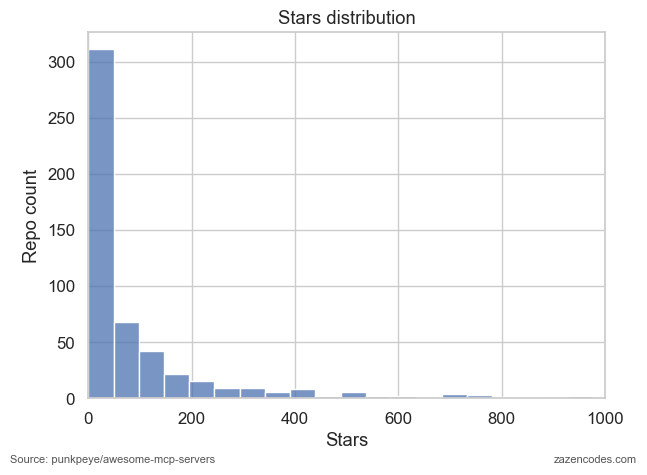

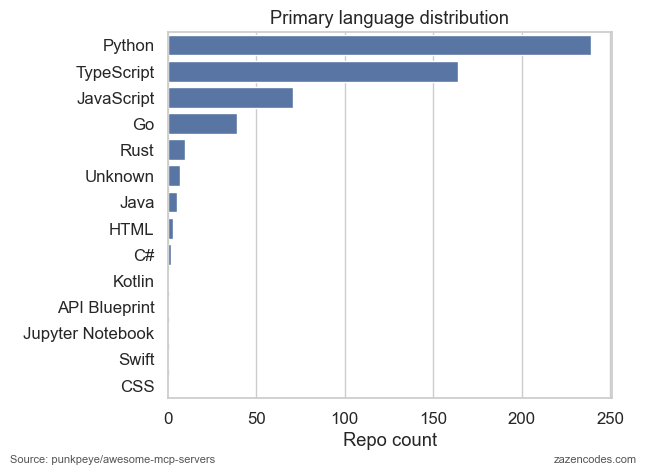

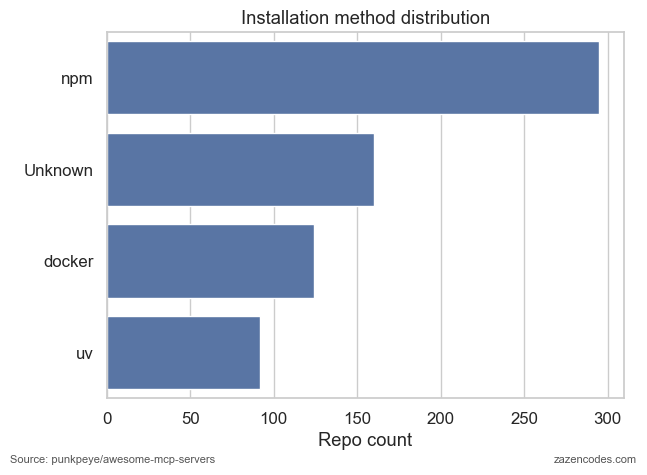

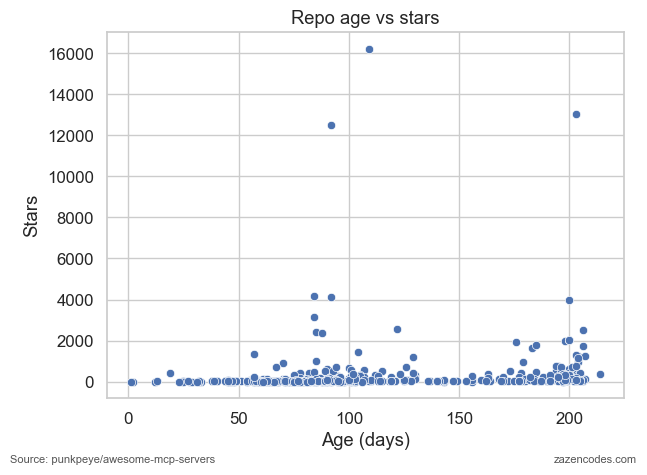

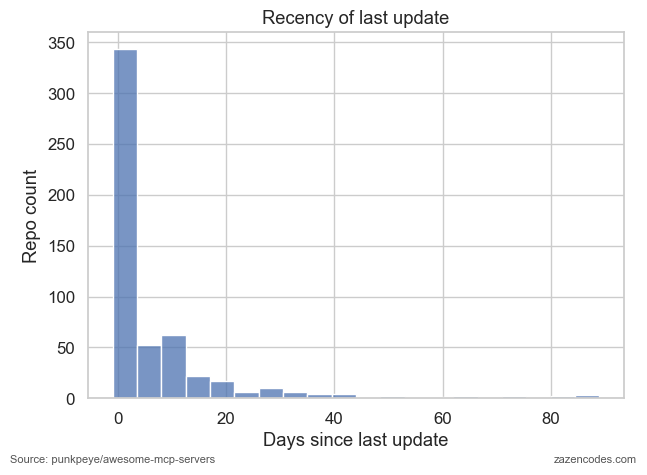

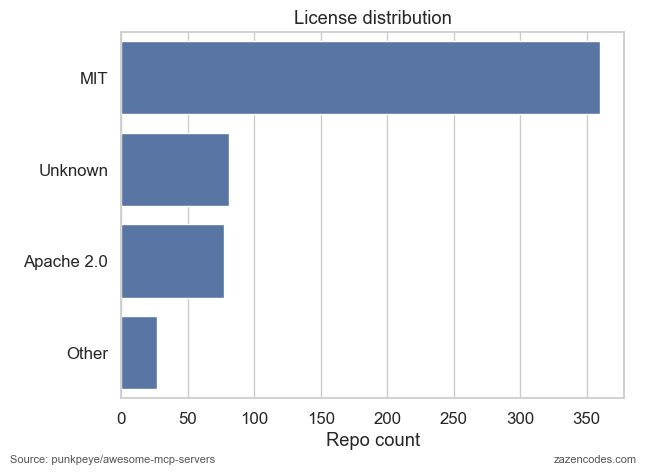

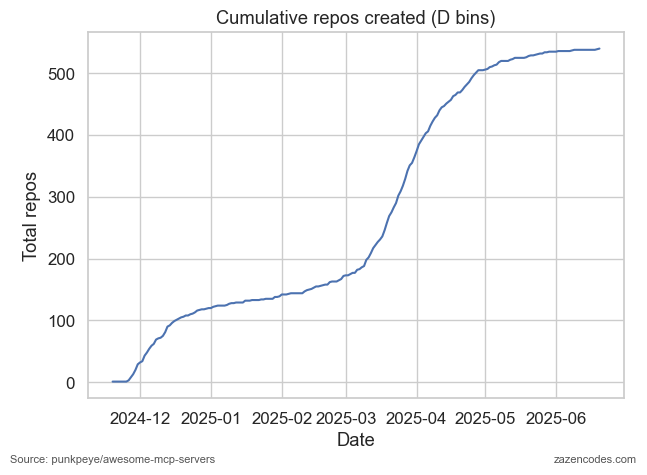

In [80]:
basic_overview(df)
plot_stars_hist(df)
plot_language_distribution(df)
plot_install_methods(inst)
plot_repo_age_vs_stars(df)
plot_activity_recency(df)
plot_license_distribution(df)
timeline_repos_created(df, freq="D")

In [158]:
df

,url,name,status_code,description,stars,created_at,updated_at,license,language,readme_status,...,installation_methods,official_implementation,programming_language,scope,operating_system,name_contains_mcp,name_contains_server,name_contains_mcp_server,repo_age_days,days_since_update
0,https://github.com/glenngillen/mcpmcp-server,mcpmcp-server,200,"Discover, setup, and integrate MCP servers wit...",4.0,2025-04-24 04:49:10+00:00,2025-06-03 04:29:47+00:00,Apache License 2.0,None,200,...,[npm],False,[TypeScript/JavaScript],[Cloud Service],"[macOS, Windows, Linux]",starts_with,True,ends_with,58.0,18.0
1,https://github.com/wegotdocs/open-mcp,open-mcp,200,None,179.0,2025-03-27 14:40:31+00:00,2025-06-22 13:24:24+00:00,None,TypeScript,200,...,[npm],False,[TypeScript/JavaScript],[Local Service],"[macOS, Windows, Linux]",ends_with,False,does_not_contain,86.0,-1.0
2,https://github.com/VeriTeknik/pluggedin-mcp-proxy,pluggedin-mcp-proxy,200,Plugged.in MCP Server manages all your other M...,45.0,2025-04-07 12:26:50+00:00,2025-06-21 12:47:53+00:00,Apache License 2.0,TypeScript,200,...,"[npm, docker]",False,[TypeScript/JavaScript],[Local Service],[],contains,False,does_not_contain,75.0,0.0
3,https://github.com/waystation-ai/mcp,mcp,200,The only MCP Server you need. Connect any MCP ...,17.0,2025-02-27 17:51:56+00:00,2025-06-21 03:52:16+00:00,None,JavaScript,200,...,[],False,[],[Cloud Service],"[macOS, Windows]",starts_with,False,does_not_contain,114.0,0.0
4,https://github.com/sxhxliang/mcp-access-point,mcp-access-point,200,Turn a web server into an MCP server in one cl...,49.0,2025-04-06 15:35:00+00:00,2025-06-22 01:06:47+00:00,MIT License,Rust,200,...,"[npm, docker]",False,[TypeScript/JavaScript],"[Cloud Service, Local Service]","[macOS, Windows, Linux]",starts_with,False,does_not_contain,76.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,https://github.com/olalonde/mcp-human,mcp-human,200,Human Assistance for AI Assistants,13.0,2025-05-07 18:41:05+00:00,2025-06-12 11:22:03+00:00,None,JavaScript,200,...,[npm],False,[TypeScript/JavaScript],[Cloud Service],[],starts_with,False,does_not_contain,45.0,9.0
541,https://github.com/gwbischof/free-will-mcp,free-will-mcp,200,This was a fun project to explore what an AI w...,6.0,2025-05-25 22:32:50+00:00,2025-06-06 03:00:38+00:00,MIT License,Python,200,...,[uv],False,[Python],[Local Service],[],ends_with,False,does_not_contain,27.0,15.0
542,https://github.com/caol64/wenyan-mcp,wenyan-mcp,200,文颜 MCP Server 可以让 AI 自动将 Markdown 文章排版后发布至微信公众号。,403.0,2025-06-02 23:54:09+00:00,2025-06-22 14:01:44+00:00,Apache License 2.0,CSS,200,...,"[npm, docker]",False,[TypeScript/JavaScript],[Local Service],"[macOS, Windows, Linux]",ends_with,False,does_not_contain,19.0,-1.0
543,https://github.com/jlowin/fastmcp,fastmcp,200,"🚀 The fast, Pythonic way to build MCP servers ...",13027.0,2024-11-30 01:47:40+00:00,2025-06-22 14:39:11+00:00,Apache License 2.0,Python,200,...,[],False,[Python],[],[],ends_with,False,does_not_contain,203.0,-1.0


In [159]:
df[df.installation_methods.astype(str) == "[]"]

,url,name,status_code,description,stars,created_at,updated_at,license,language,readme_status,...,installation_methods,official_implementation,programming_language,scope,operating_system,name_contains_mcp,name_contains_server,name_contains_mcp_server,repo_age_days,days_since_update
3,https://github.com/waystation-ai/mcp,mcp,200,The only MCP Server you need. Connect any MCP ...,17.0,2025-02-27 17:51:56+00:00,2025-06-21 03:52:16+00:00,None,JavaScript,200,...,[],False,[],[Cloud Service],"[macOS, Windows]",starts_with,False,does_not_contain,114.0,0.0
5,https://github.com/hamflx/imagen3-mcp,imagen3-mcp,200,None,28.0,2025-04-26 06:41:39+00:00,2025-06-19 13:30:58+00:00,None,Rust,200,...,[],False,[TypeScript/JavaScript],[Local Service],"[macOS, Windows, Linux]",ends_with,False,does_not_contain,56.0,2.0
6,https://github.com/SureScaleAI/openai-gpt-imag...,openai-gpt-image-mcp,200,A Model Context Protocol (MCP) tool server for...,37.0,2025-04-27 07:54:28+00:00,2025-06-19 01:54:20+00:00,MIT License,TypeScript,200,...,[],False,[TypeScript/JavaScript],[Cloud Service],[],ends_with,False,does_not_contain,55.0,2.0
7,https://github.com/abhiemj/manim-mcp-server,manim-mcp-server,200,None,404.0,2025-03-31 05:17:21+00:00,2025-06-22 14:54:04+00:00,MIT License,Python,200,...,[],False,[Python],[Local Service],"[Windows, Linux]",contains,True,ends_with,82.0,-1.0
14,https://github.com/samuelgursky/davinci-resolv...,davinci-resolve-mcp,200,MCP server integration for DaVinci Resolve,222.0,2025-03-18 03:11:04+00:00,2025-06-22 14:57:21+00:00,MIT License,Python,200,...,[],False,[Python],[],[],ends_with,False,does_not_contain,95.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,https://github.com/Seym0n/tiktok-mcp,tiktok-mcp,200,Model Context Protocol (MCP) with TikTok integ...,62.0,2025-03-13 12:23:46+00:00,2025-06-19 17:48:53+00:00,MIT License,JavaScript,200,...,[],False,[TypeScript/JavaScript],[Cloud Service],[],ends_with,False,does_not_contain,100.0,2.0
529,https://github.com/UnitVectorY-Labs/mcp-graphq...,mcp-graphql-forge,200,"A lightweight, configuration-driven MCP server...",1.0,2025-04-22 22:00:12+00:00,2025-06-19 01:11:32+00:00,MIT License,Go,200,...,[],False,[Go],[Cloud Service],"[macOS, Windows, Linux]",starts_with,False,does_not_contain,60.0,2.0
535,https://github.com/zueai/mcp-manager,mcp-manager,200,simple web ui to manage mcp (model context pro...,230.0,2024-12-08 10:14:09+00:00,2025-06-22 14:40:22+00:00,MIT License,TypeScript,200,...,[],False,[TypeScript/JavaScript],[Cloud Service],[],starts_with,False,does_not_contain,195.0,-1.0
538,https://github.com/dotemacs/domain-lookup-mcp,domain-lookup-mcp,200,Domain Lookup MCP,1.0,2025-04-21 07:36:23+00:00,2025-06-03 15:31:59+00:00,None,Go,200,...,[],False,[Go],[],[],ends_with,False,does_not_contain,61.0,18.0


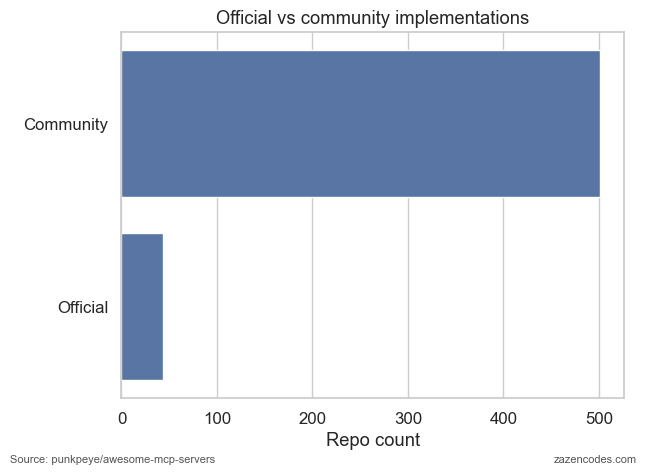

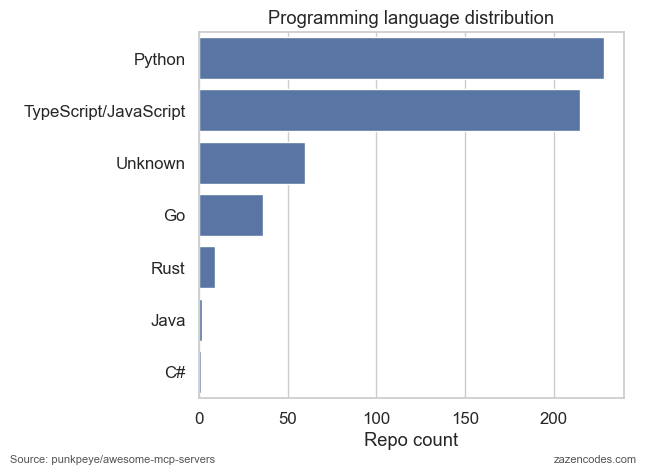

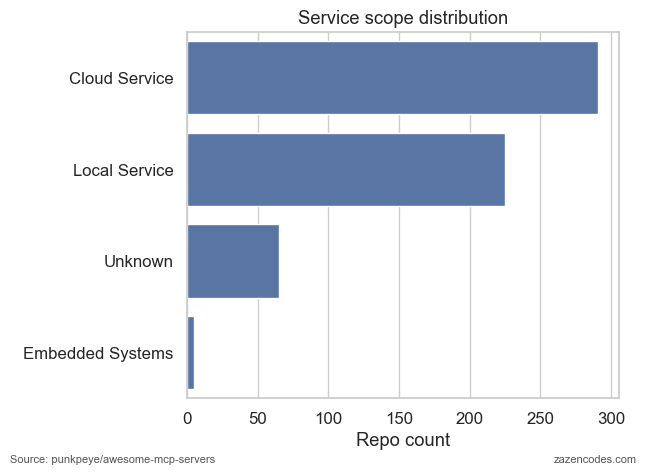

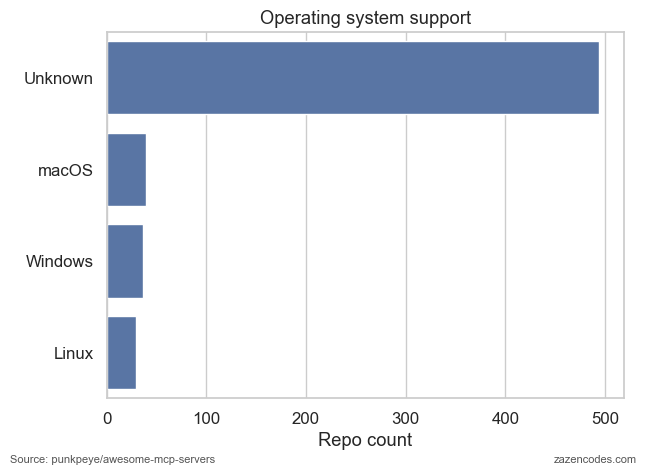

In [81]:
# ----------  UPDATED HELPER (handles list-type columns) ----------
def _flatten_to_series(series, unknown_label="Unknown"):
    """
    Convert a column that may hold scalars, lists, or NaNs into a flat
    one-dimensional pandas Series, mapping missing/empty values to `unknown_label`.
    """
    flat = []
    for v in series:
        if isinstance(v, list):
            if not v:                              # empty list
                flat.append(unknown_label)
            else:
                flat.extend([x if pd.notna(x) else unknown_label for x in v])
        else:
            flat.append(v if pd.notna(v) else unknown_label)
    return pd.Series(flat)


# ----------  REVISED PLOTS (now list-aware) ----------
def plot_official_implementation(df):
    """
    Bar chart: Official vs Community implementations.
    Accepts bool scalars or lists of bools in `official_implementation`.
    """
    if "official_implementation" not in df.columns:
        print("No official_implementation column.")
        return

    ser = _flatten_to_series(df["official_implementation"], unknown_label=False)
    counts = (
        ser.map(lambda x: bool(x))
        .map({True: "Official", False: "Community"})
        .value_counts()
    )

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Official vs community implementations")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_programming_language_distribution(df, min_repos=1):
    """
    Horizontal bar chart of the `programming_language` field.
    Handles both scalars and lists of languages.
    """
    if "programming_language" not in df.columns:
        print("No programming_language column.")
        return

    lang_ser = _flatten_to_series(df["programming_language"])
    counts   = lang_ser.value_counts()
    counts   = counts[counts >= min_repos]

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Programming language distribution")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_scope_distribution(df, min_repos=1):
    """
    Horizontal bar chart of service scope (Cloud, Local, Embedded, …).
    Handles scalar or list-type `scope` values.
    """
    if "scope" not in df.columns:
        print("No scope column.")
        return

    scope_ser = _flatten_to_series(df["scope"])
    counts    = scope_ser.value_counts()
    counts    = counts[counts >= min_repos]

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Service scope distribution")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_operating_system_distribution(df, min_repos=1):
    """
    Horizontal bar chart of operating systems supported.
    Works when `operating_system` holds scalars or lists.
    """
    if "operating_system" not in df.columns:
        print("No operating_system column.")
        return

    os_ser  = _flatten_to_series(df["operating_system"])
    counts  = os_ser.value_counts()
    counts  = counts[counts >= min_repos]

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Operating system support")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


plot_official_implementation(df)
plot_programming_language_distribution(df)
plot_scope_distribution(df)
plot_operating_system_distribution(df)

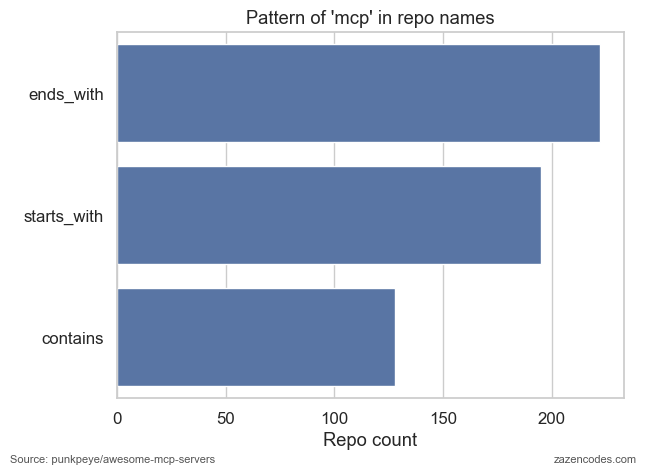

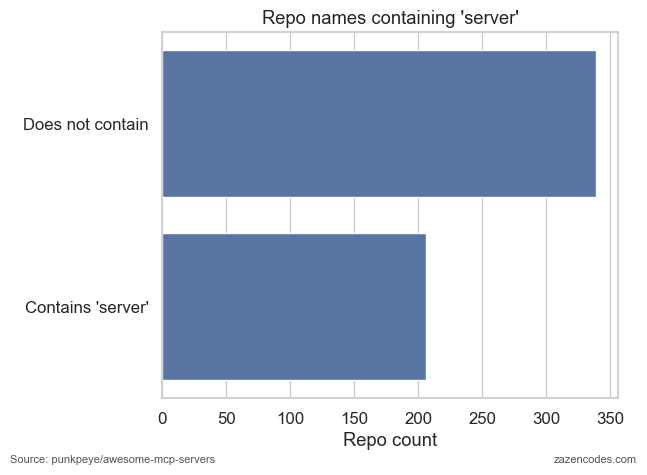

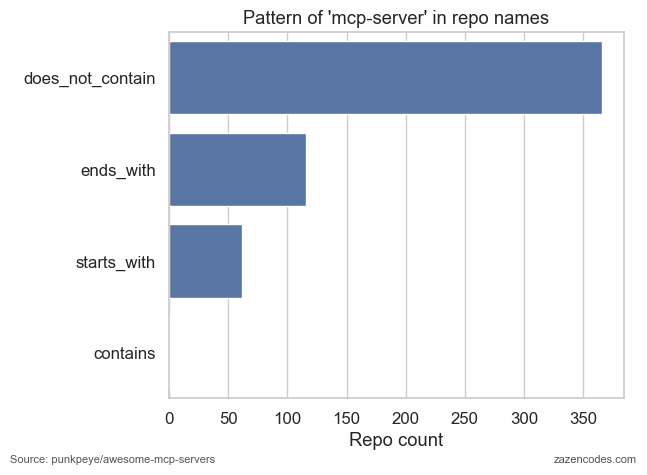

In [86]:
# ----------  NEW PLOTS for name-pattern columns ----------
def plot_name_contains_mcp(df, min_repos=1):
    """
    Bar chart for the categorical column `name_contains_mcp`, whose values are
    one of: starts_with, ends_with, contains, does_not_contain (case-insensitive).

    Works whether the column cells are scalars or lists.
    """
    if "name_contains_mcp" not in df.columns:
        print("No name_contains_mcp column.")
        return

    cat_ser = _flatten_to_series(df["name_contains_mcp"], unknown_label="Unknown")
    counts  = cat_ser.value_counts()
    counts  = counts[counts >= min_repos]

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Pattern of 'mcp' in repo names")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_name_contains_server(df):
    """
    Bar chart indicating whether repo names contain the substring 'server'
    (case-insensitive). Accepts bool scalars or lists in `name_contains_server`.
    """
    if "name_contains_server" not in df.columns:
        print("No name_contains_server column.")
        return

    ser = _flatten_to_series(df["name_contains_server"], unknown_label=False)
    counts = (
        ser.map(lambda x: bool(x))
        .map({True: "Contains 'server'", False: "Does not contain"})
        .value_counts()
    )

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Repo names containing 'server'")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()


def plot_name_contains_mcp_server(df, min_repos=1):
    """
    Bar chart indicating whether repo names contain the substring 'mcp-server'
    (case-insensitive). Accepts bool scalars or lists in `name_contains_mcp_server`.
    """
    if "name_contains_mcp_server" not in df.columns:
        print("No name_contains_mcp_server column.")
        return

    cat_ser = _flatten_to_series(df["name_contains_mcp_server"], unknown_label="Unknown")
    counts  = cat_ser.value_counts()
    counts  = counts[counts >= min_repos]

    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Pattern of 'mcp-server' in repo names")
    plt.xlabel("Repo count")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()

plot_name_contains_mcp(df)
plot_name_contains_server(df)
plot_name_contains_mcp_server(df)

In [83]:
names = [repo.get('name') for repo in mcp_repo_data if repo.get('name')]
for name in sorted(names):
    print(name)

HarmonyOS-mcp-server
VictoriaMetrics-mcp-server
acp-mcp
actors-mcp-server
adls-mcp-server
adx-mcp-server
agentql-mcp
airtable-mcp
airtable-mcp-server
aiwen-mcp-server-geoip
alchemy-mcp-server
alibaba-cloud-ops-mcp-server
alibabacloud-tablestore-mcp-server
alpaca-mcp
alpha-vantage-mcp
amazon-ads-mcp-server
ancestry-mcp
anilist-mcp
any-chat-completions-mcp
apisix-mcp
apktool-mcp-server
app-store-connect-mcp-server
apple-notes-mcp
armor-crypto-mcp
arxiv-latex-mcp
arxiv-mcp-server
aseprite-mcp
ashra-mcp
assistant-mcp
atomgit-mcp-server
attestable-mcp-server
attio-mcp-server
authenticator_mcp
aws-mcp-server
aws-pricing-mcp
azure-cli-mcp
azure-resource-graph-mcp-server
balldontlie-mcp
base-mcp
baseline-mcp-server
bazi-mcp
bear-mcp-server
beeper-mcp
bicscan-mcp
biel-mcp
bilibili-mcp
bilibili-mcp-js
binary_ninja_mcp
bing-search-mcp
biomcp
biothings-mcp
bitcoin-mcp
blockbeats-mcp
bluesky-social-mcp
books-mcp-server
box-mcp-server
brave-search-mcp
bridge-rates-mcp
brightdata-mcp
browser-control-

In [93]:
print(df.name_contains_mcp.value_counts())
print()
print(df.name_contains_mcp_server.value_counts())
print()
print(df.name_contains_server.value_counts())

name_contains_mcp
ends_with      222
starts_with    195
contains       128
Name: count, dtype: int64

name_contains_mcp_server
does_not_contain    366
ends_with           116
starts_with          62
contains              1
Name: count, dtype: int64

name_contains_server
False    339
True     206
Name: count, dtype: int64


In [154]:
df[df.name_contains_mcp_server == "contains"]

,url,name,status_code,description,stars,created_at,updated_at,license,language,readme_status,...,installation_methods,official_implementation,programming_language,scope,operating_system,name_contains_mcp,name_contains_server,name_contains_mcp_server,repo_age_days,days_since_update
350,https://github.com/ipfred/aiwen-mcp-server-geoip,aiwen-mcp-server-geoip,200,埃文IP定位MCP,2.0,2025-05-06 07:59:28+00:00,2025-05-28 02:50:30+00:00,None,JavaScript,200,...,[npm],False,"[Python, TypeScript/JavaScript]",[Cloud Service],[],contains,True,contains,46.0,24.0


## Extracted function analysis

Naming conventions for tools, resource, prompts

Fed into LLM (Gemini pro, in chunks of 50) with the following prompt:

```
I need you to extract a list of MCP tools, resources and prompts from a set of README files for various popular MCP servers. These are the three main components of MCP servers

Tools: Functions for the AI model to execute
Resources: Context and data, for the user or the AI model to use
Prompts: Templated messages and workflows for users

I need you to extract the name and type in JSON data:
[{"name": "get_stuff", "type": "tool"}, {"name": "user_docs", "type": "resource"}, ...]

You should be able to identify the names of some tools for each MCP server, most of the time. You will only sometimes be able to identify resources and prompts. If you can't identify anything or you aren't sure, then you can just ignore that README file.

I will paste a bunch of README files below. I don't care what file the functions come from, just output them all in a big list for me.

---

```

In [116]:
# for repo in list(sorted(mcp_repo_data, key=lambda x: x['stars'] or 0, reverse=True))[:50]:
#     print(repo['readme_text'])


In [117]:
# for repo in list(sorted(mcp_repo_data, key=lambda x: x['stars'] or 0, reverse=True))[50:100]:
#     print(repo['readme_text'])

In [109]:
with open("mcp_repo_extracted_functions_2025-06-22.json", "r") as f:
    mcp_repo_extracted_functions = json.load(f)



In [143]:
import re
from typing import List, Dict

def add_name_format(objs: List[Dict], format_key: str = "name_format") -> List[Dict]:
    """
    Detect the style of each object's ``name`` field and record it.

    Styles detected
    ---------------
    - single_word   → ``hello``
    - snake_case    → ``hello_world``
    - camel_case    → ``helloWorld``
    - kebab_case    → ``hello-world``

    Parameters
    ----------
    objs : list[dict]
        Each dict must contain a ``"name"`` key.
    format_key : str, optional
        Key to store the result under (default ``"name_format"``).

    Returns
    -------
    list[dict]
        The same list, updated in-place (also returned for convenience).
    """
    # pre-compile the regexes once
    camel_re = re.compile(r'^[a-z0-9]+(?:[A-Z][a-z0-9]*)+$')
    snake_re = re.compile(r'^[a-z0-9]+(?:_[a-z0-9]+)+$')
    kebab_re = re.compile(r'^[a-z0-9]+(?:-[a-z0-9]+)+$')
    word_re  = re.compile(r'^[A-Za-z0-9]+$')

    def classify(name: str) -> str:
        if camel_re.fullmatch(name):
            return "Camel Case"
        if snake_re.fullmatch(name):
            return "Snake Case"
        if kebab_re.fullmatch(name):
            return "Kebab Case"
        if word_re.fullmatch(name):
            return "Single Word"
        return "Multi Word"   # fallback for anything that doesn’t match

    for obj in objs:
        name = obj.get("name", "").strip()
        obj[format_key] = classify(name)

    return objs

mcp_repo_extracted_functions = add_name_format(mcp_repo_extracted_functions)

In [144]:
df_e = pd.DataFrame(mcp_repo_extracted_functions)

In [145]:
df_e.groupby("type")["name_format"].value_counts()

type      name_format
prompt    Snake Case       8
          Kebab Case       5
          Multi Word       4
          Camel Case       1
resource  Snake Case      21
          Single Word     14
          Multi Word       5
          Kebab Case       1
tool      Snake Case     804
          Kebab Case      64
          Single Word     37
          Camel Case       6
Name: count, dtype: int64

In [146]:
df_e[(df_e["type"] == "tool")&(df_e["name_format"].isin(("Snake Case", "Kebab Case", "Single Word", "Camel Case")))]["name_format"].value_counts()

name_format
Snake Case     804
Kebab Case      64
Single Word     37
Camel Case       6
Name: count, dtype: int64

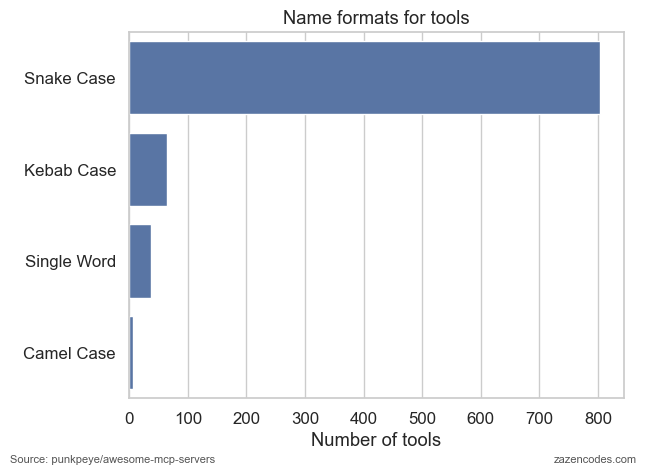

In [151]:
def plot_name_format_distribution(df, allowed_formats=None, min_repos=1):
    """
    Bar chart of preferred repo name formatting for *tool*-type entries.

    Parameters
    ----------
    df : pandas.DataFrame
        Source table with columns `type` and `name_format`.
    allowed_formats : tuple or list, default four common cases
        Name-format categories to include in the plot.
    min_repos : int, default 1
        Minimum count threshold; categories with fewer repos are omitted.
    """
    if allowed_formats is None:
        allowed_formats = ("Snake Case", "Kebab Case", "Single Word", "Camel Case")

    # 1) subset rows that are tools
    sub = df[df["type"].str.lower() == "tool"]

    if sub.empty:
        print("No rows with type == 'tool'.")
        return

    # 2) flatten name_format column (scalars or lists)
    fmt_series = _flatten_to_series(sub["name_format"])

    # 3) filter to allowed_formats and count
    counts = fmt_series[fmt_series.isin(allowed_formats)].value_counts()
    counts = counts[counts >= min_repos]

    if counts.empty:
        print("Nothing to plot after filtering.")
        return

    # 4) horizontal bar plot
    plt.figure()
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title("Name formats for tools")
    plt.xlabel("Number of tools")
    plt.ylabel("")
    plt.tight_layout()
    _add_credits()
    plt.show()

plot_name_format_distribution(df_e)


In [153]:
for name in df_e[df_e["type"] == "tool"]["name"].tolist():
    print(name)

get_me
search_users
get_issue
get_issue_comments
create_issue
add_issue_comment
list_issues
update_issue
search_issues
get_pull_request
list_pull_requests
merge_pull_request
get_pull_request_files
get_pull_request_status
update_pull_request_branch
get_pull_request_comments
get_pull_request_reviews
get_pull_request_diff
create_pending_pull_request_review
add_pull_request_review_comment_to_pending_review
submit_pending_pull_request_review
delete_pending_pull_request_review
create_and_submit_pull_request_review
create_pull_request
update_pull_request
create_or_update_file
delete_file
list_branches
push_files
search_repositories
create_repository
get_file_contents
fork_repository
create_branch
list_commits
get_commit
get_tag
list_tags
search_code
list_workflows
list_workflow_runs
run_workflow
get_workflow_run
get_workflow_run_logs
list_workflow_jobs
get_job_logs
rerun_workflow_run
rerun_failed_jobs
cancel_workflow_run
list_workflow_run_artifacts
download_workflow_run_artifact
delete_workfl